In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [15]:
L = 0.1                     # Length of rod
n = 20                      # number of points on the rod
T0 = 0                      # Initial temperature for internal points
T1s = 40                    # Temperature at left end
T2s = 20                    # Temperature at right end
dx = L/n                    # number of time steps
alpha = 0.0001              # Diffusion Coefficient
t_final = 60
dt = 0.1
if(alpha*dt/dx**2>0.5):     # Checks stability criteria
    print("Warning the solution will be unstable")   
x = np.linspace(dx/2,L-dx/2,n) # Spacial Domain
T = np.ones(n)*T0              # Temperature initiation at all pts
dTdt = np.empty(n)             # Temperature gradiant wrt time array
t = np.arange(0, t_final,dt)   # Temporal Domain

Total_T=[]
Total_T.append(T)
plt.figure()
plt.ion()

<Figure size 432x288 with 0 Axes>

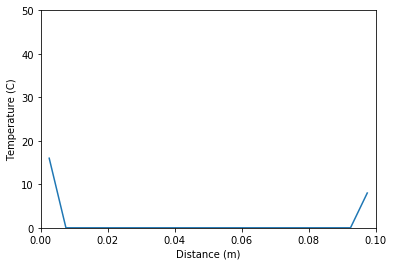

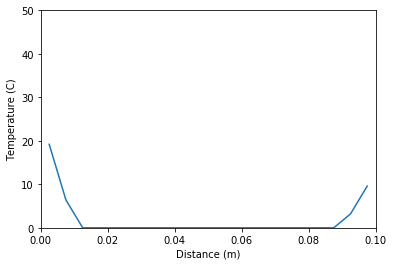

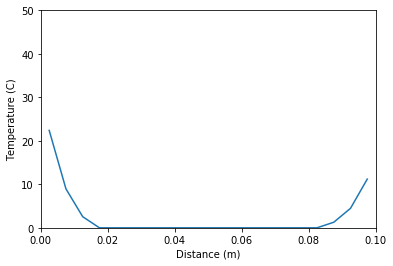

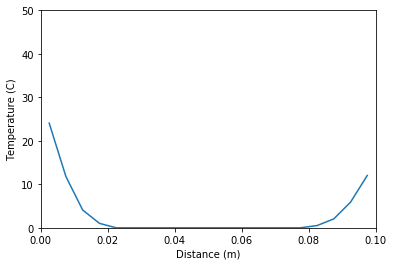

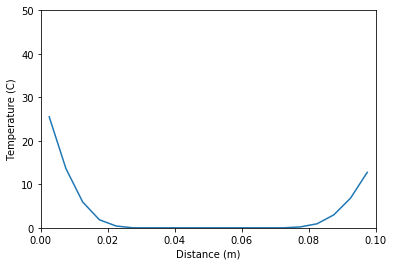

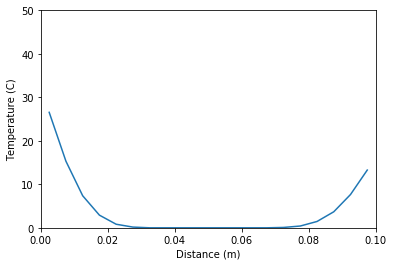

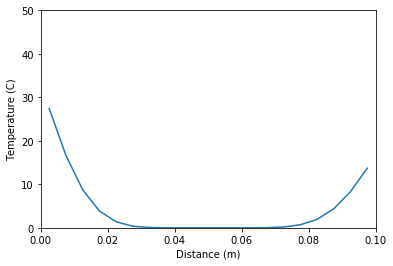

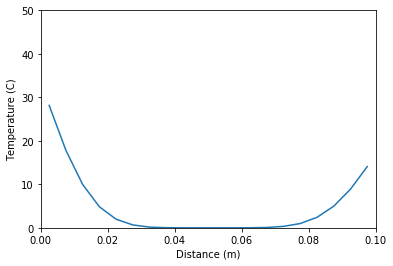

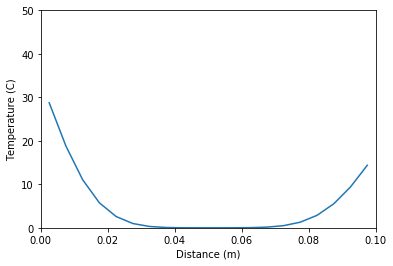

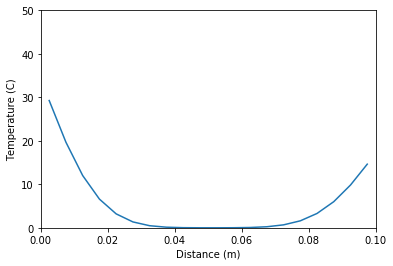

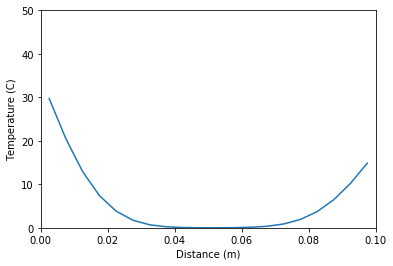

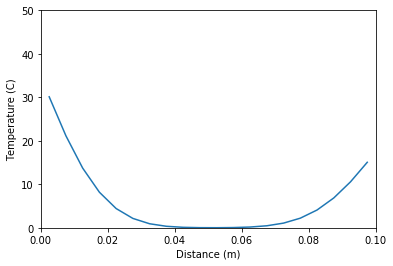

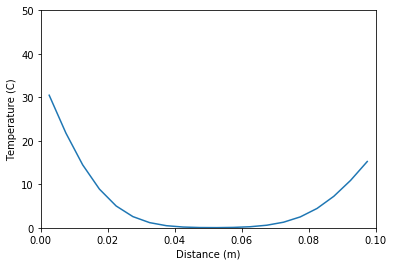

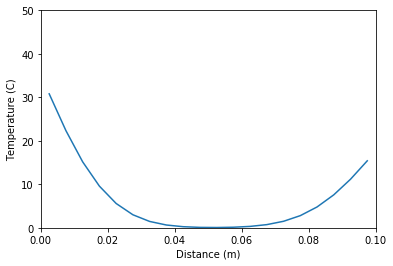

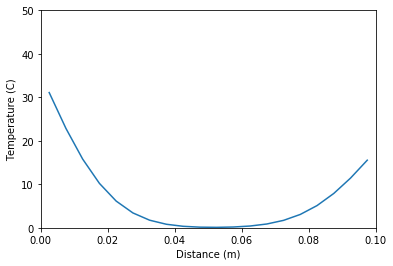

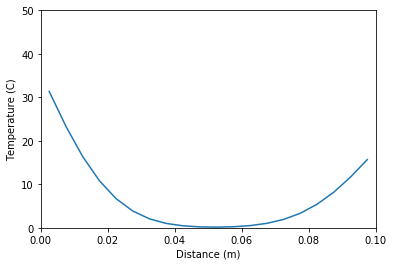

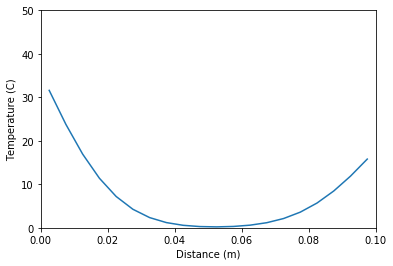

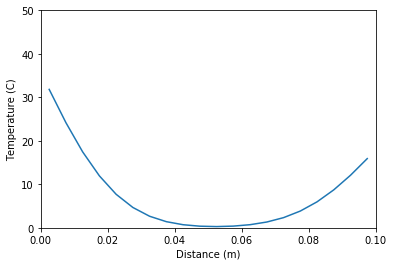

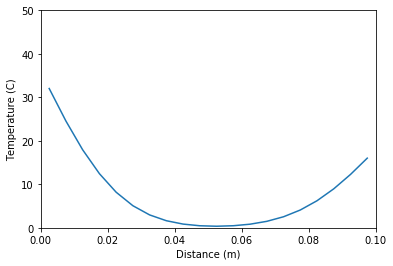

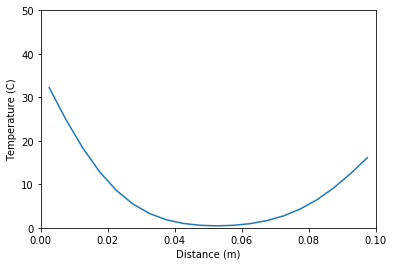

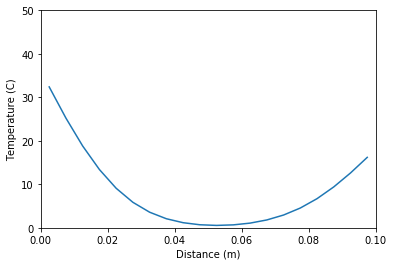

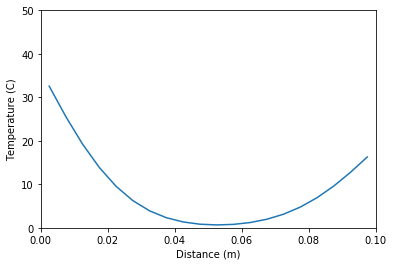

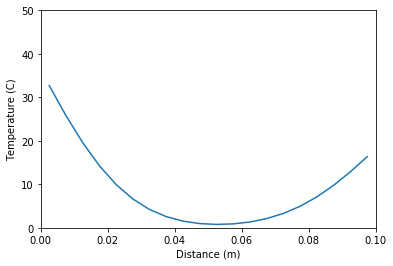

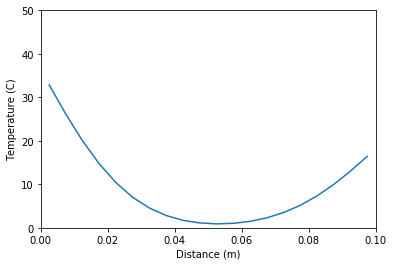

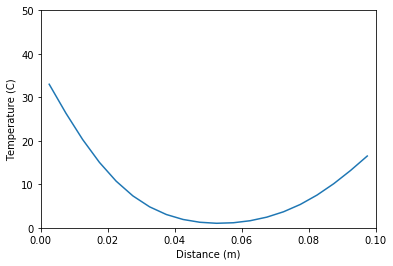

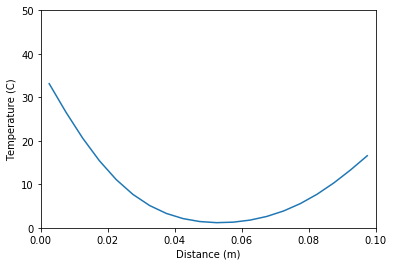

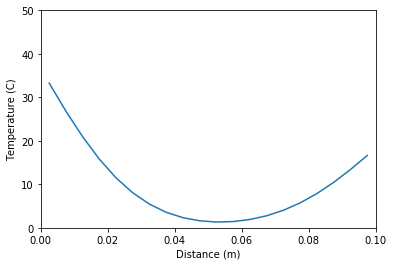

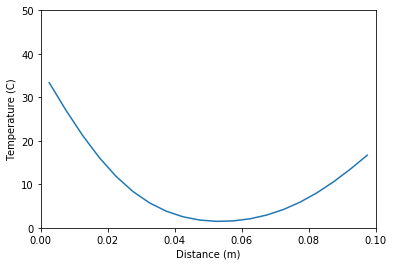

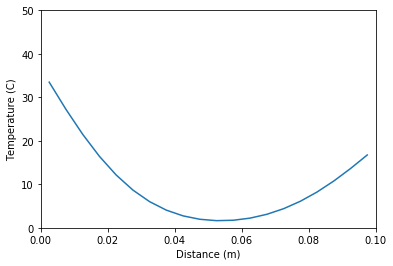

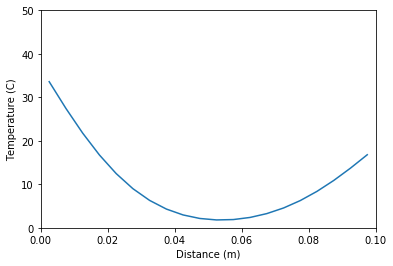

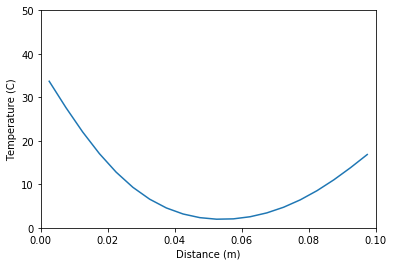

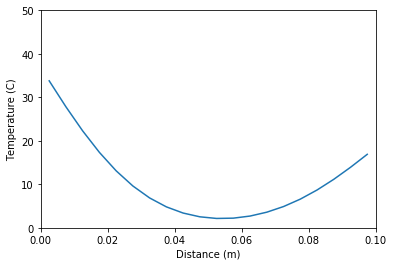

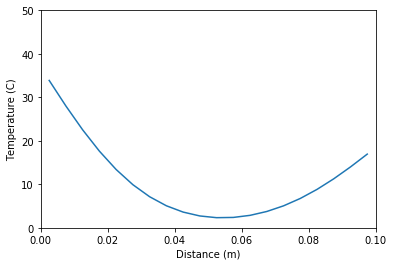

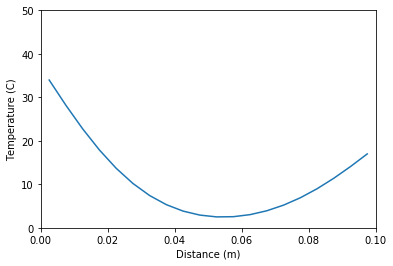

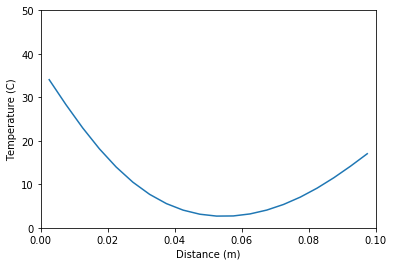

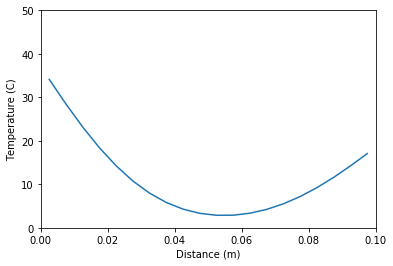

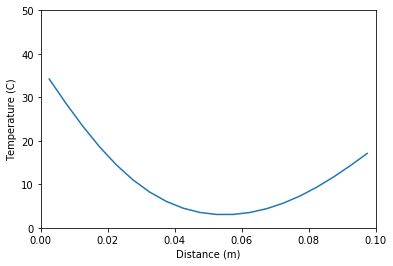

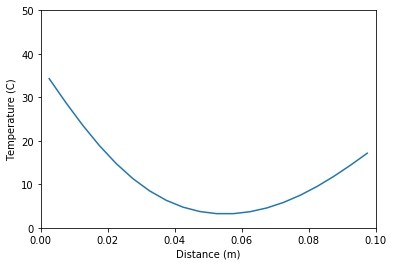

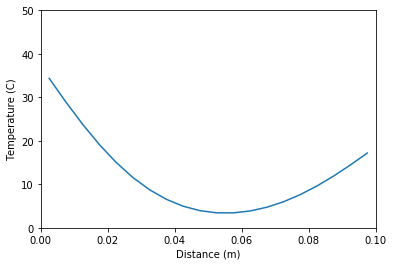

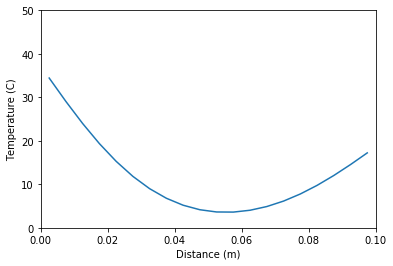

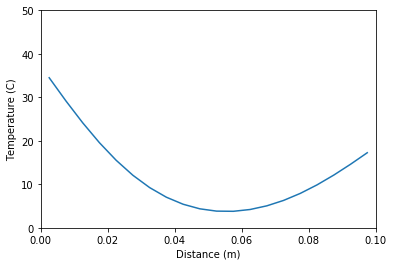

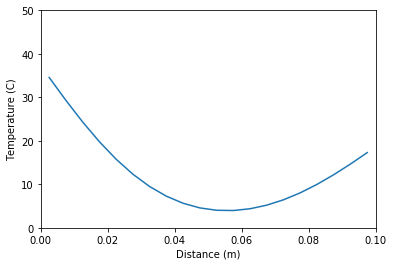

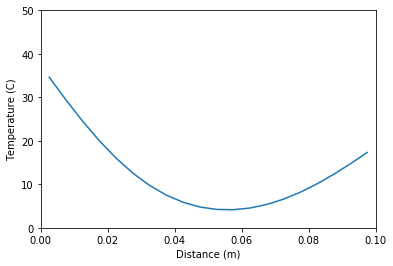

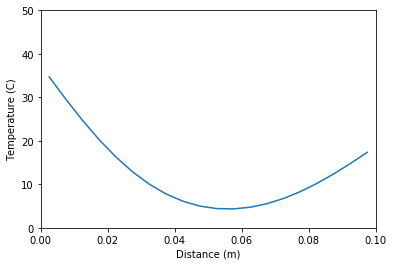

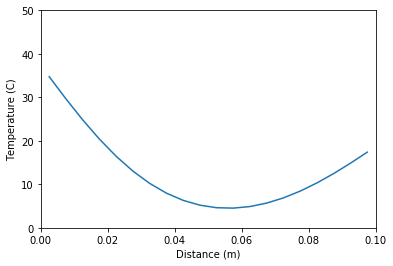

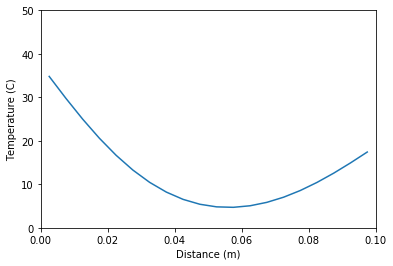

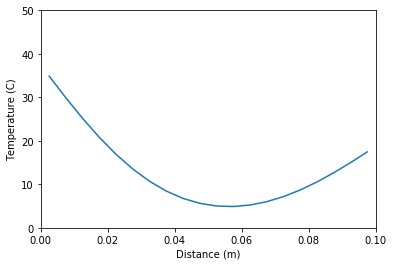

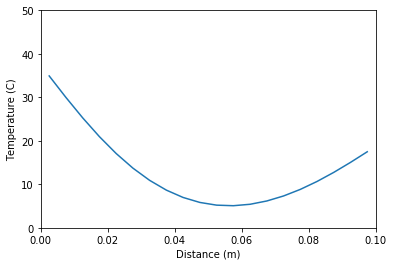

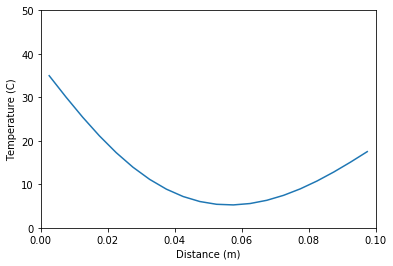

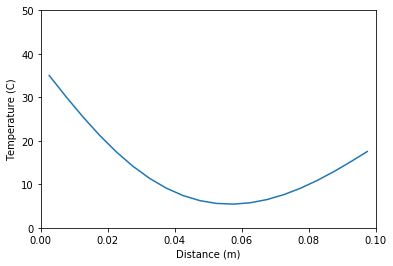

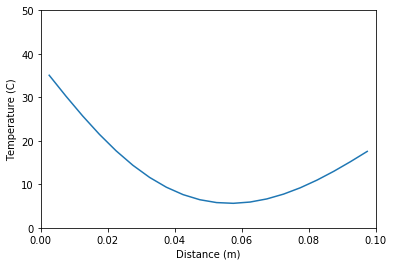

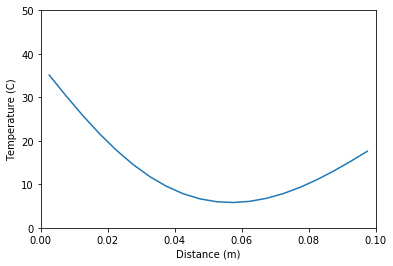

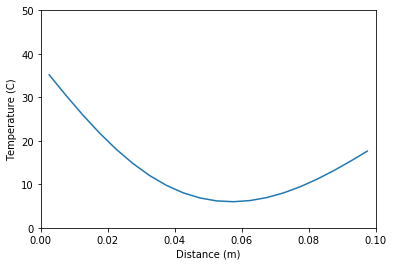

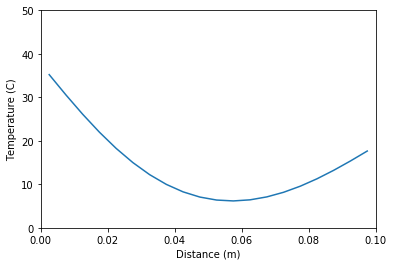

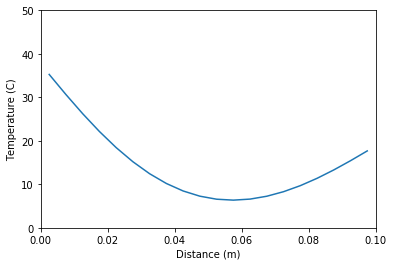

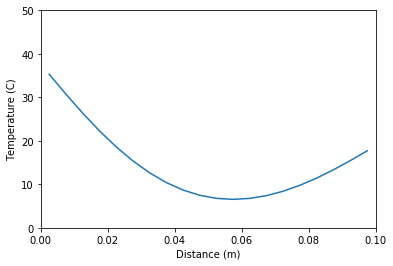

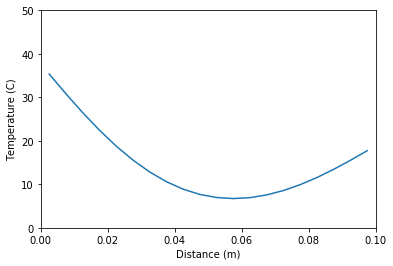

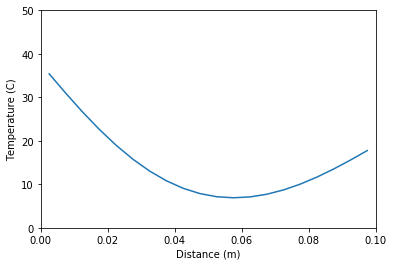

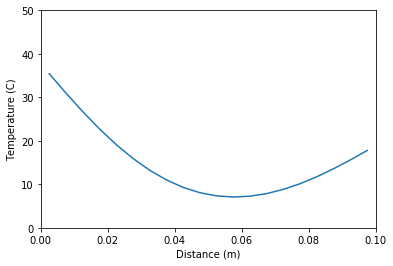

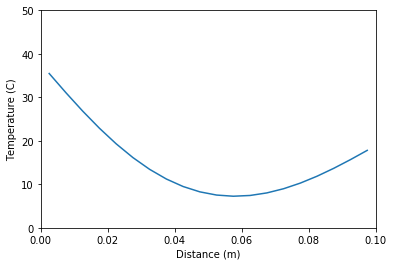

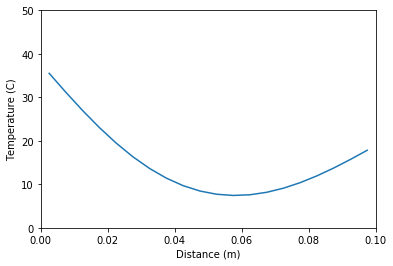

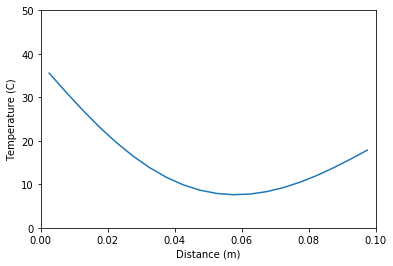

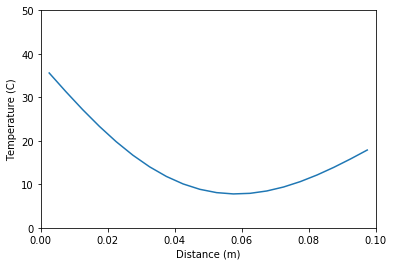

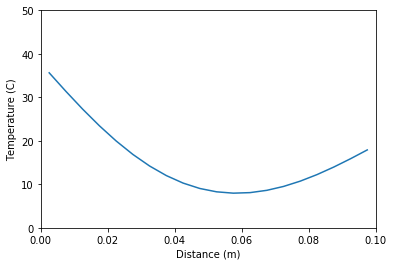

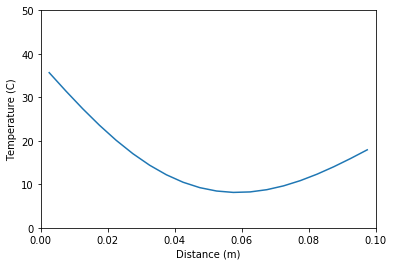

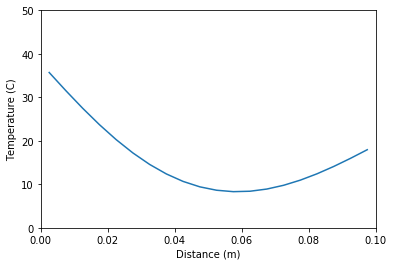

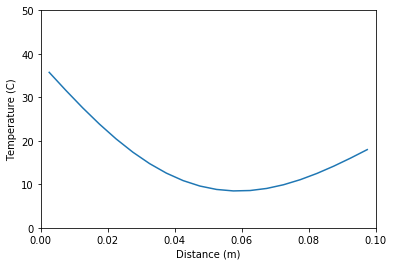

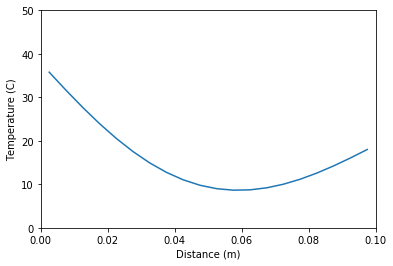

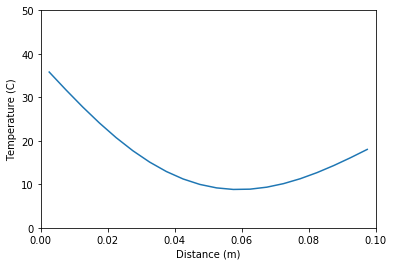

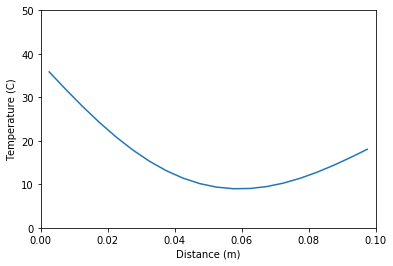

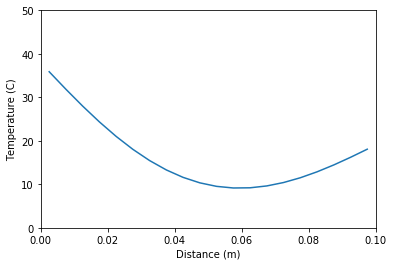

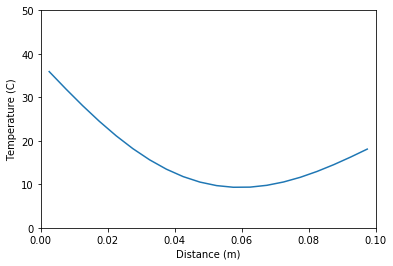

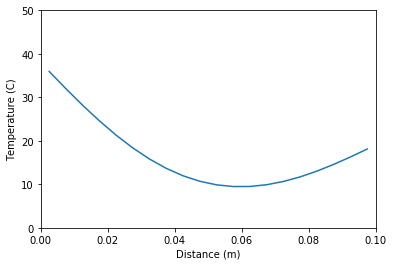

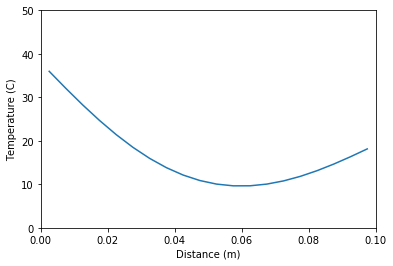

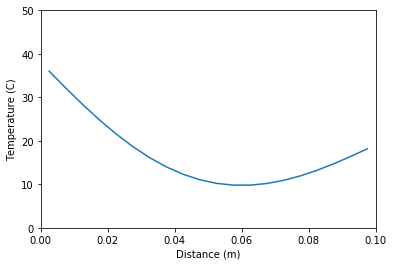

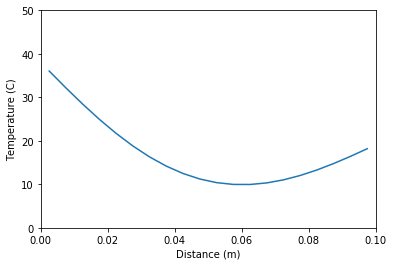

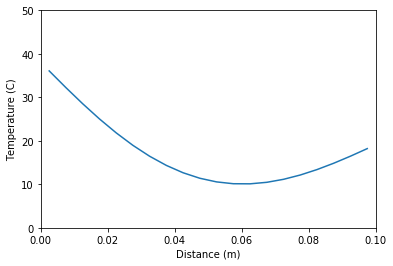

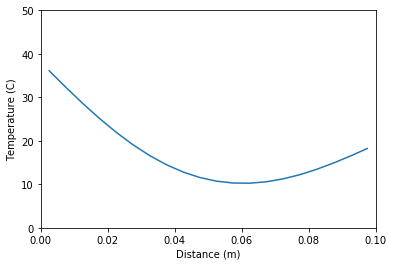

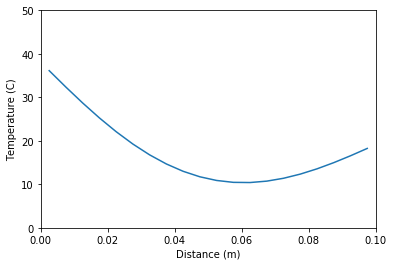

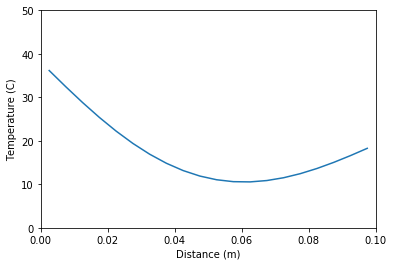

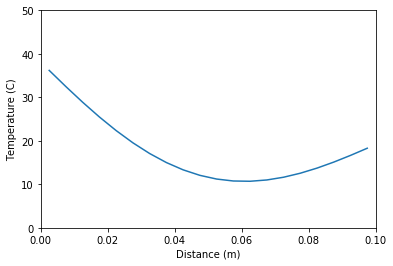

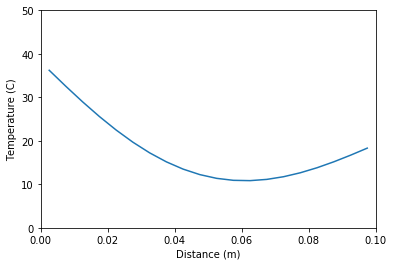

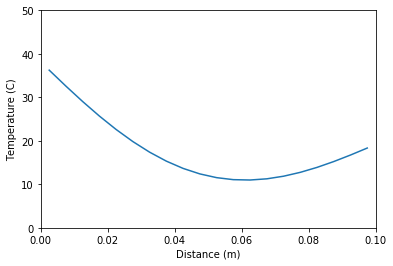

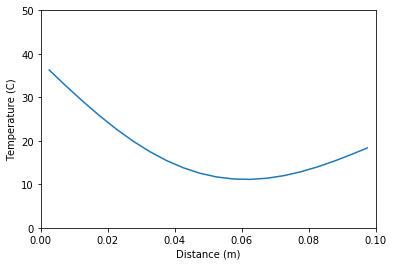

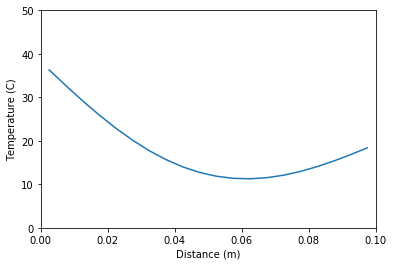

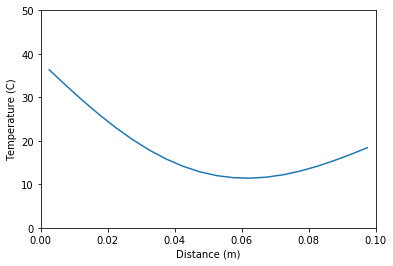

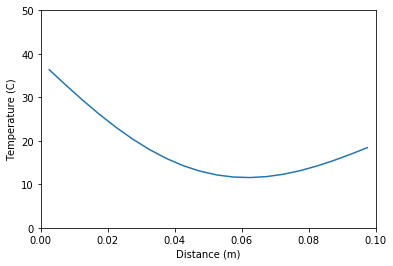

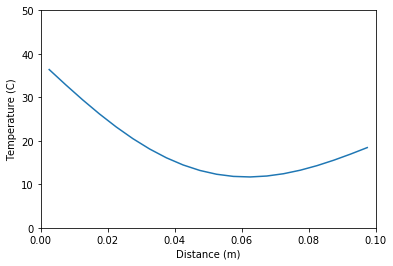

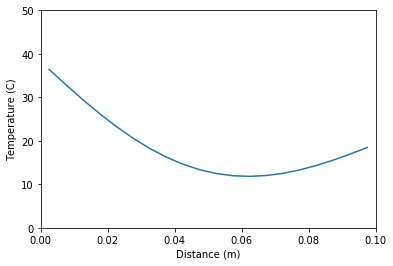

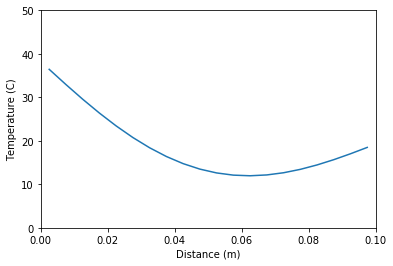

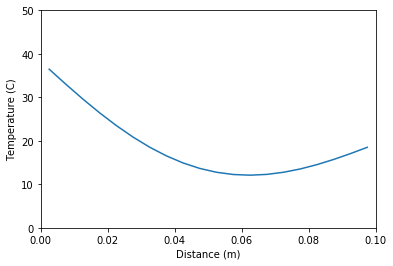

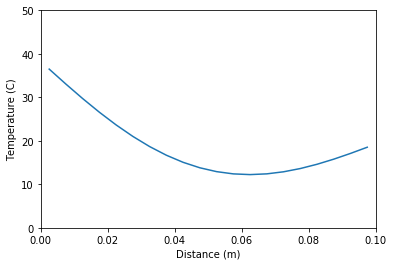

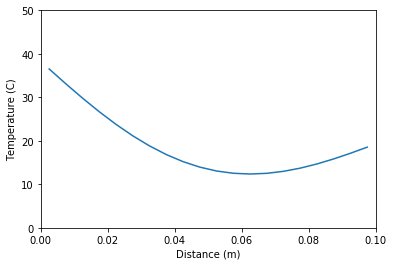

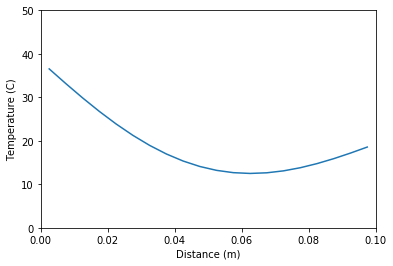

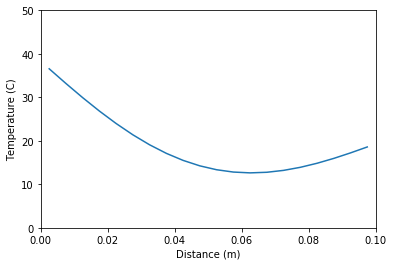

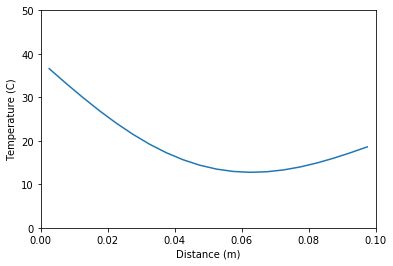

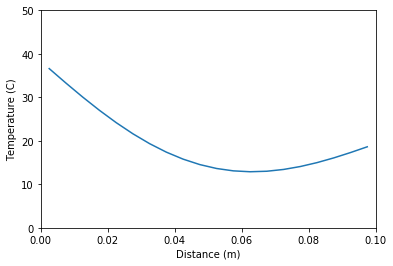

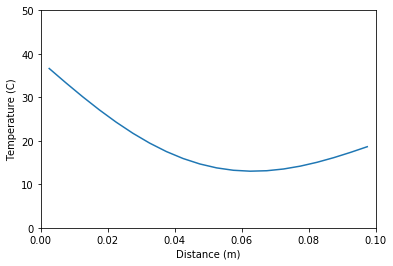

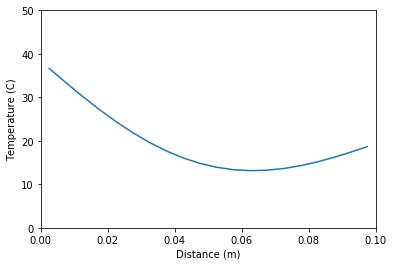

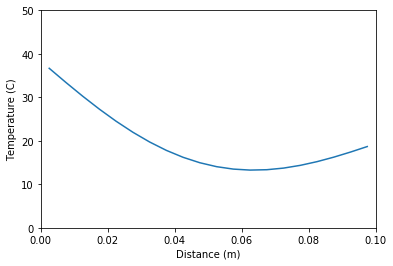

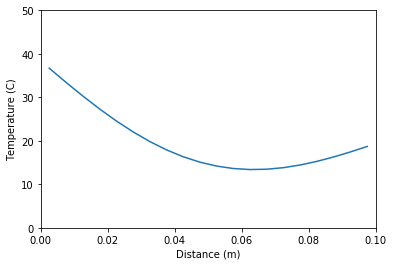

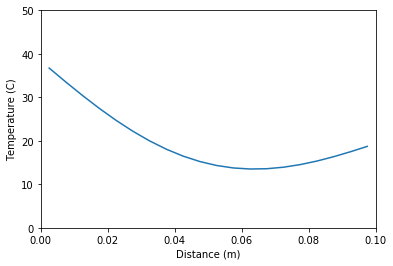

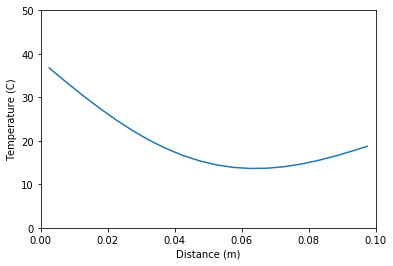

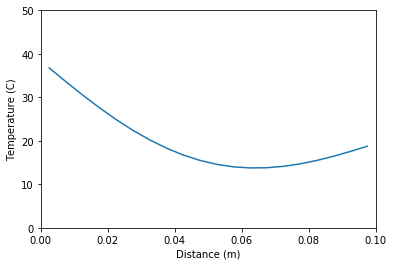

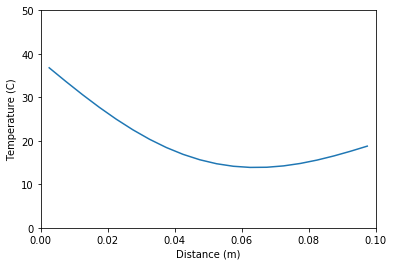

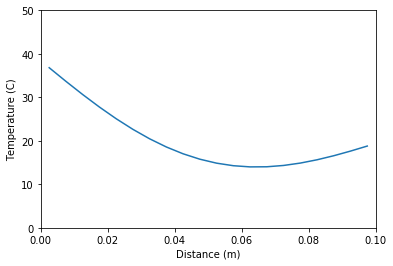

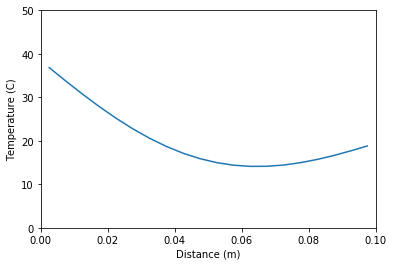

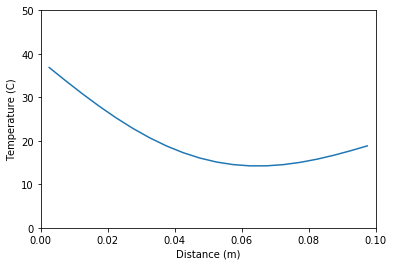

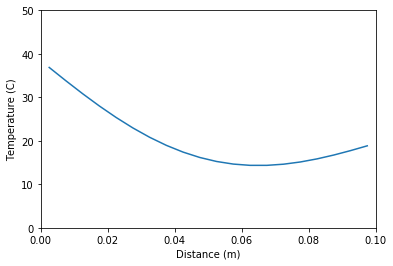

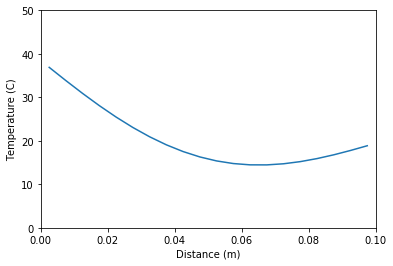

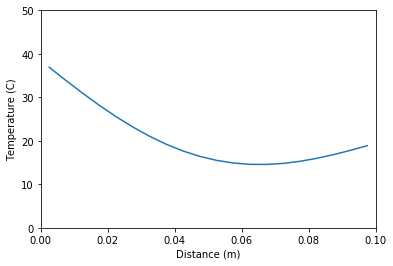

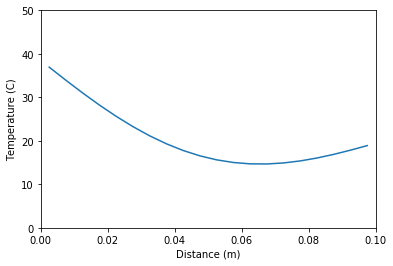

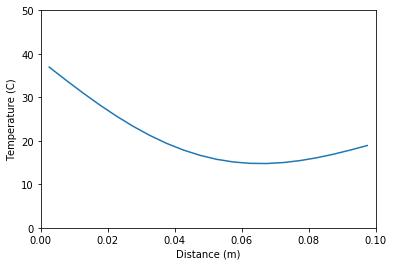

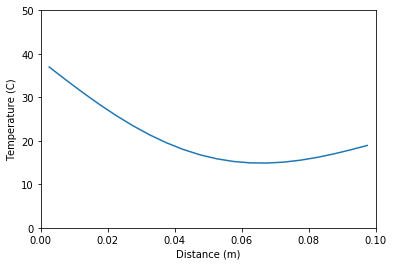

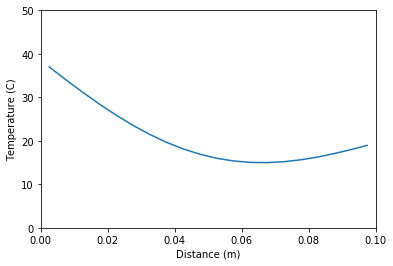

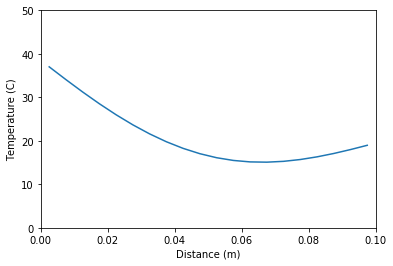

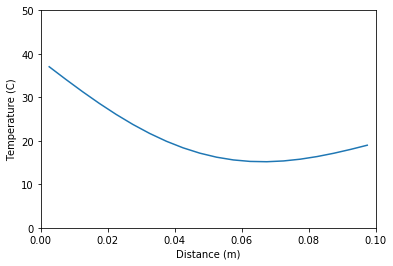

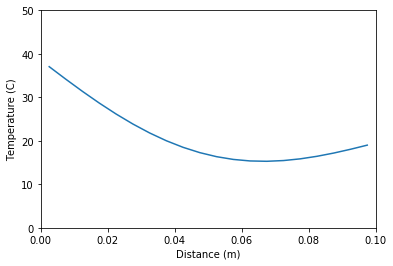

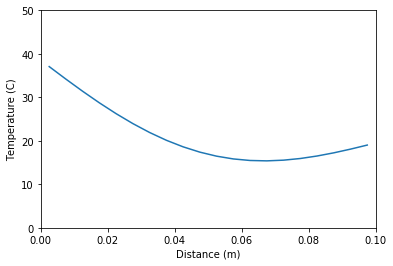

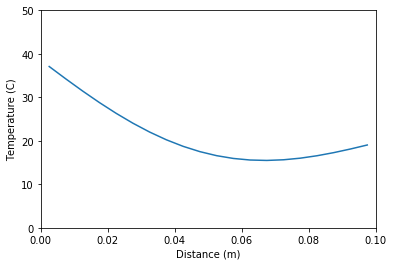

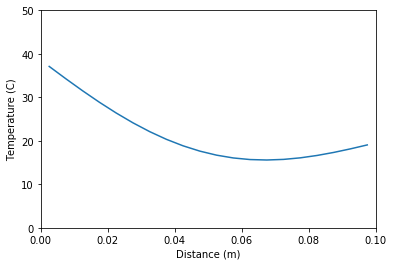

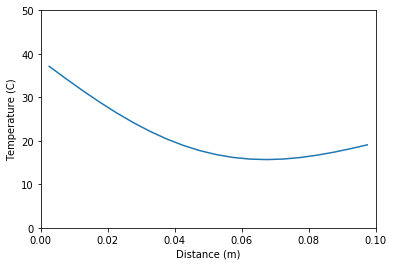

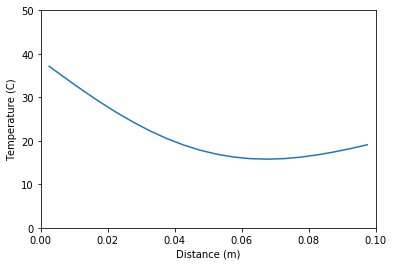

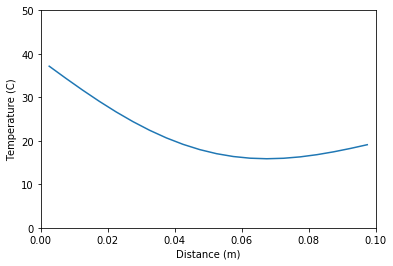

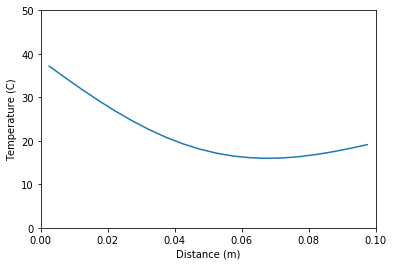

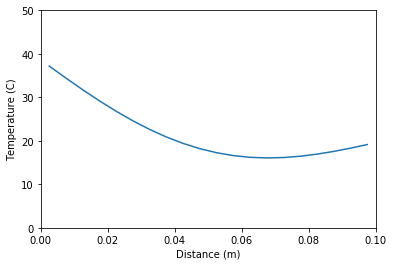

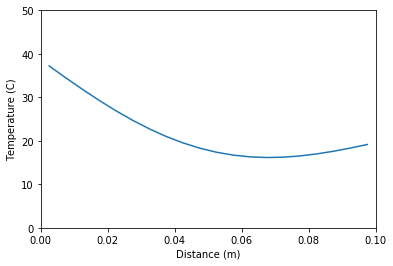

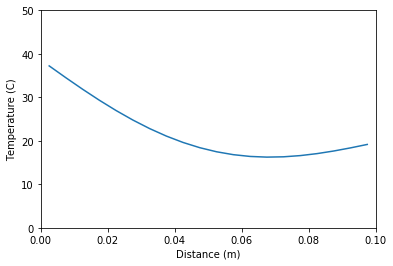

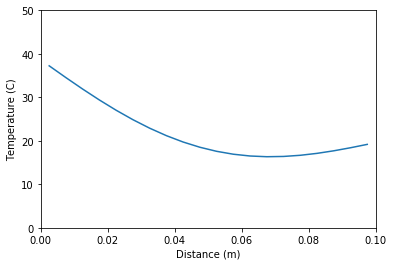

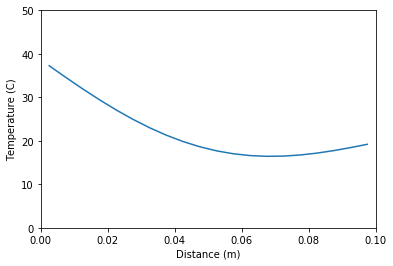

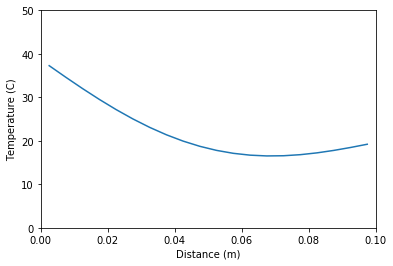

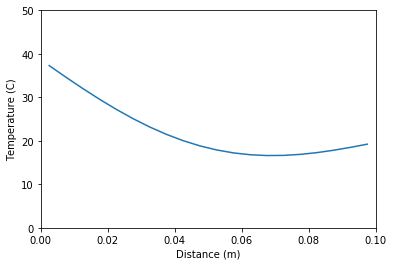

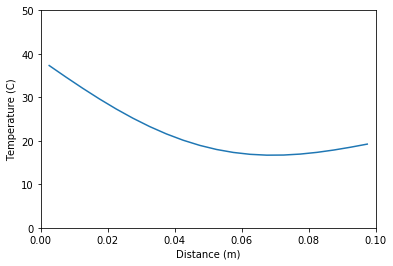

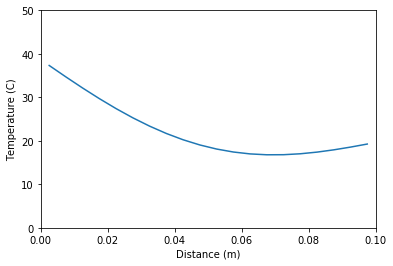

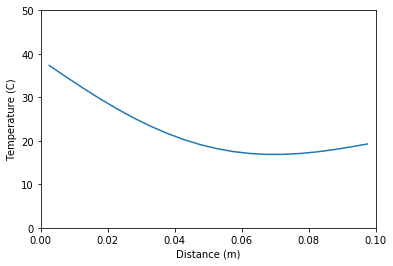

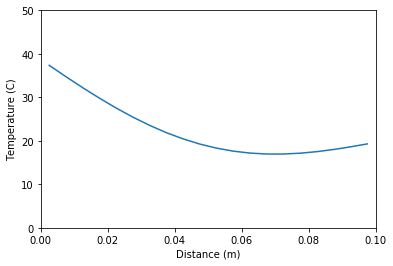

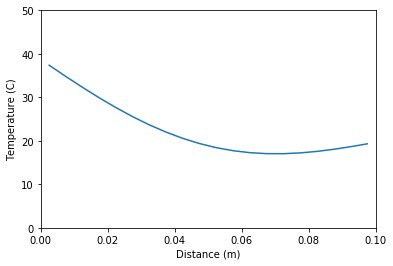

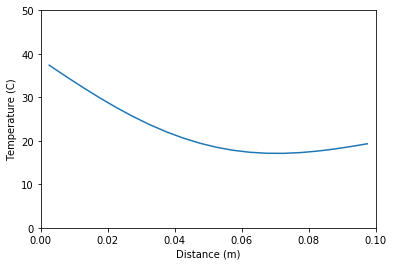

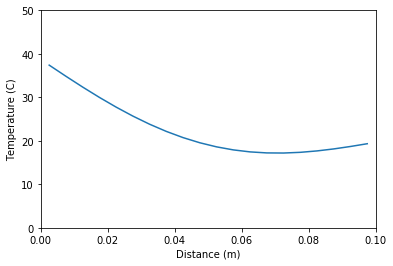

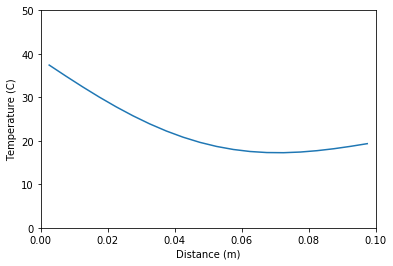

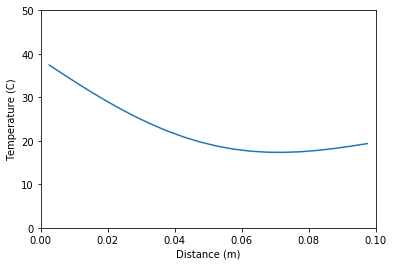

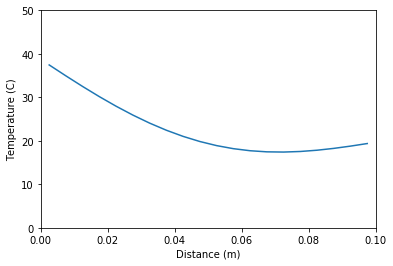

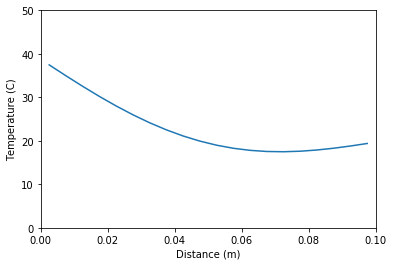

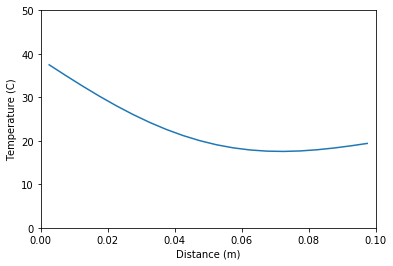

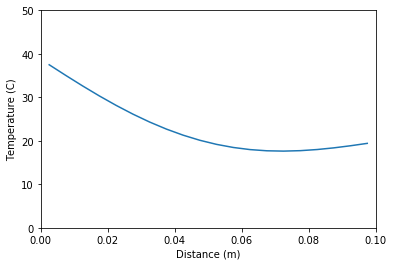

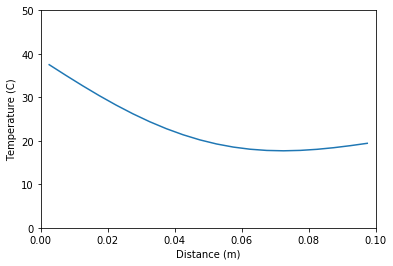

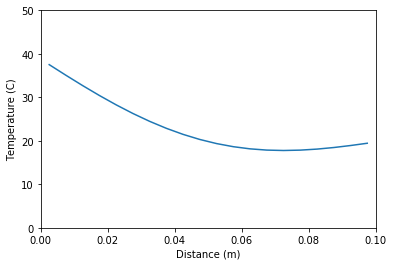

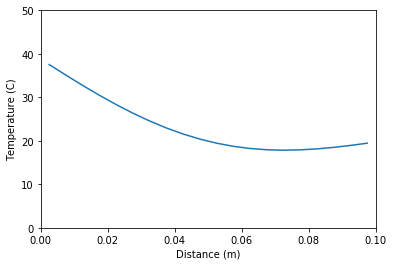

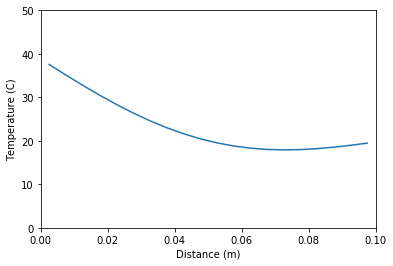

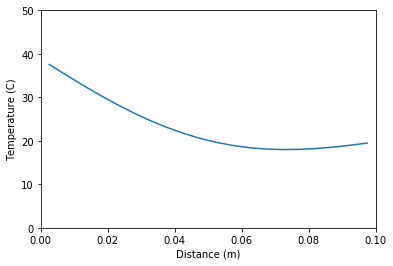

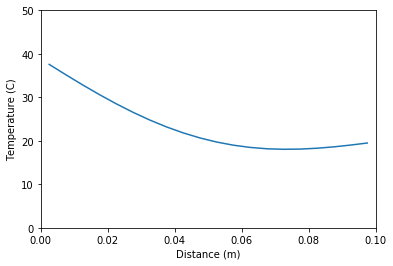

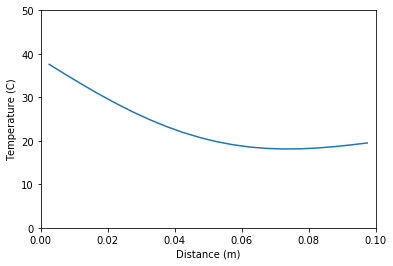

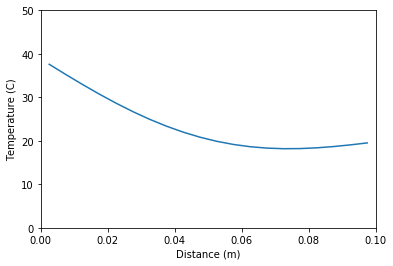

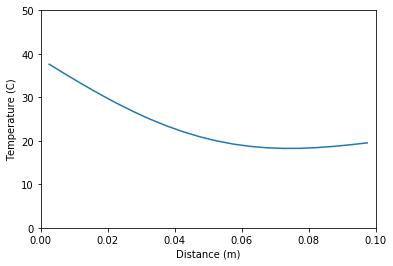

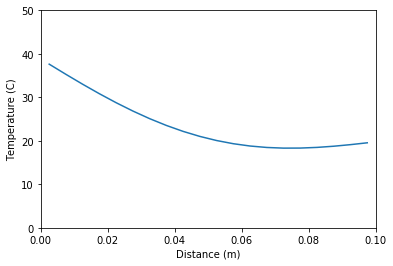

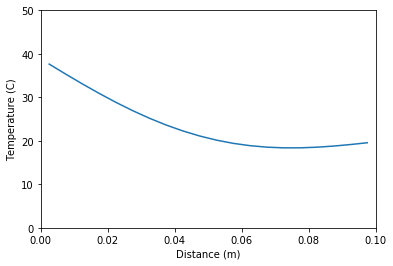

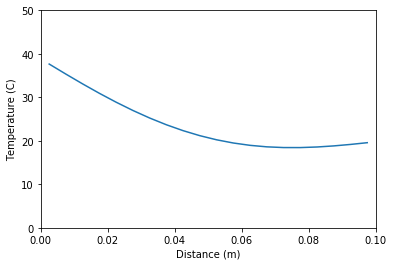

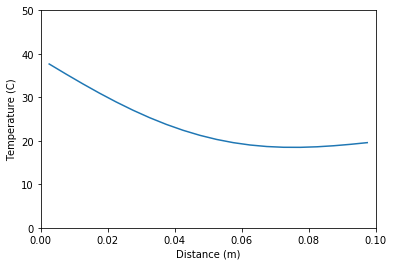

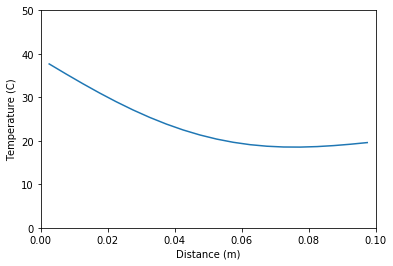

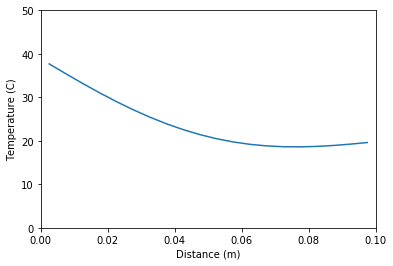

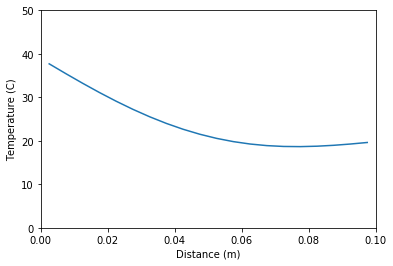

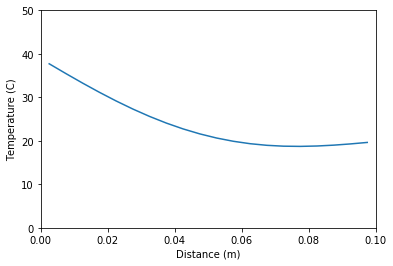

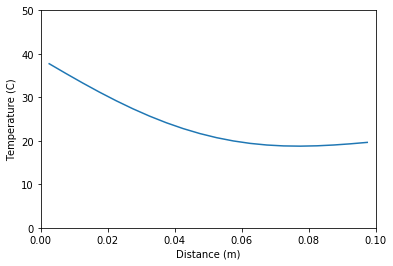

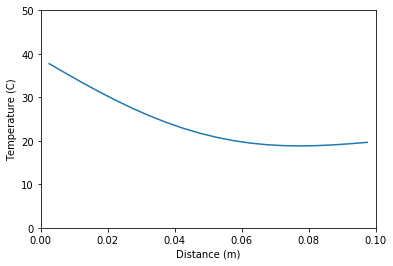

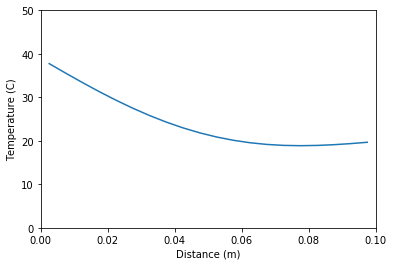

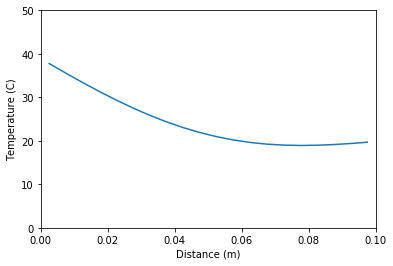

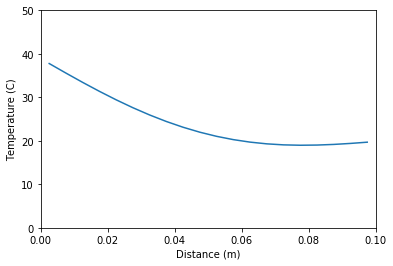

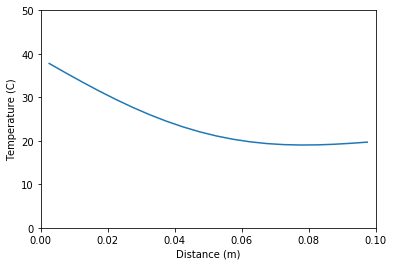

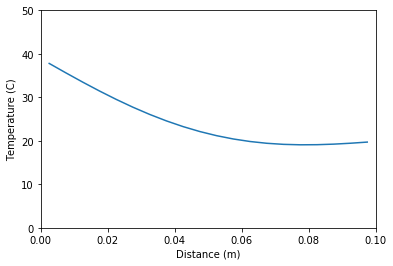

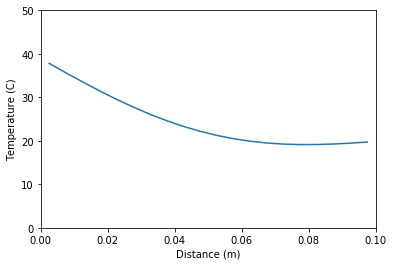

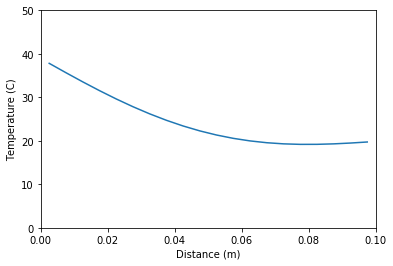

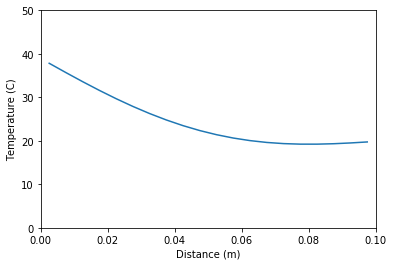

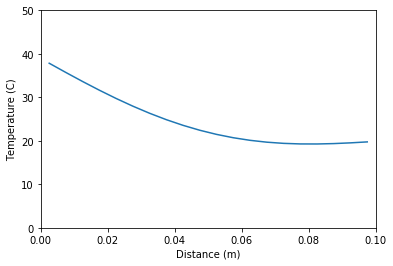

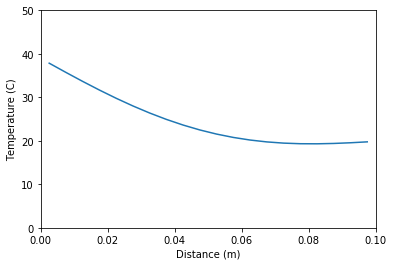

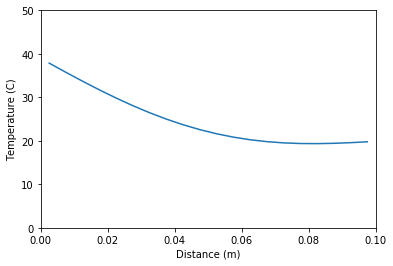

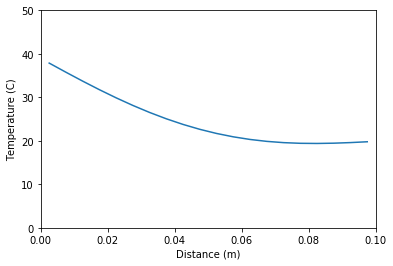

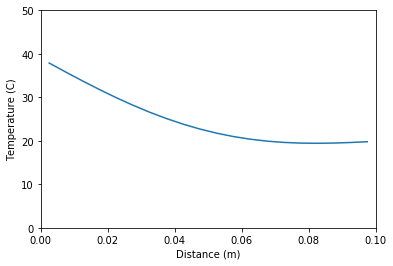

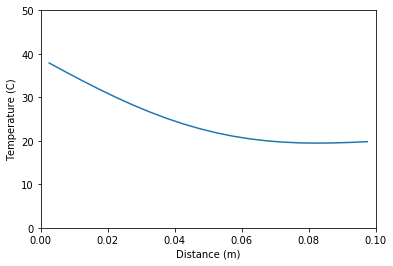

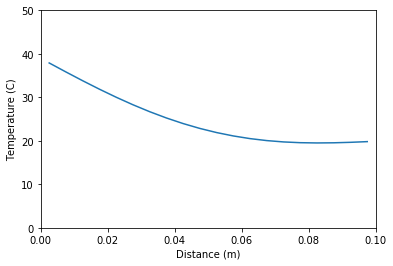

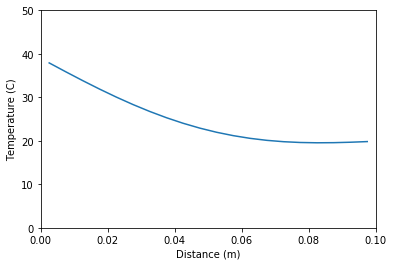

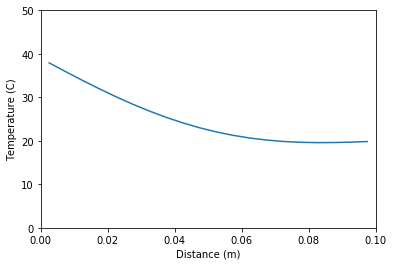

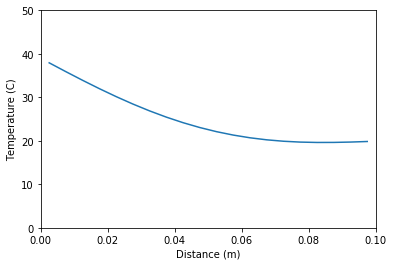

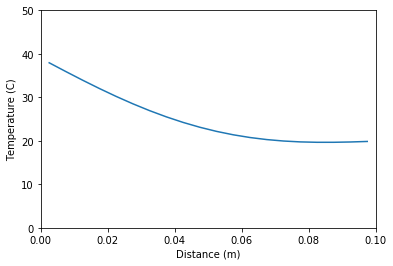

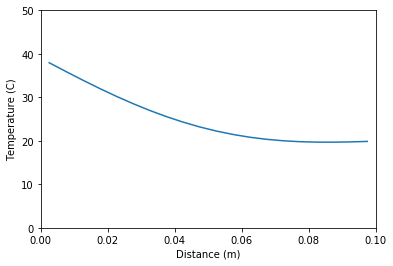

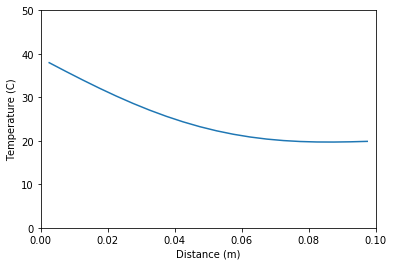

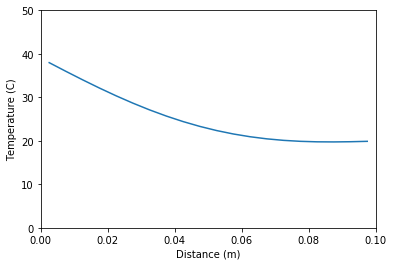

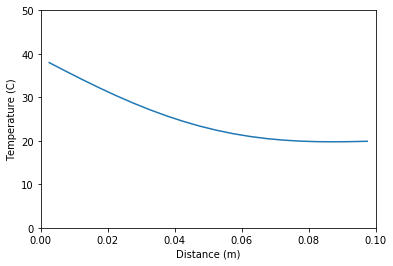

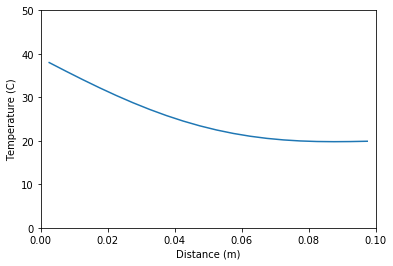

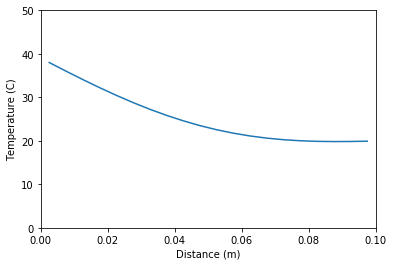

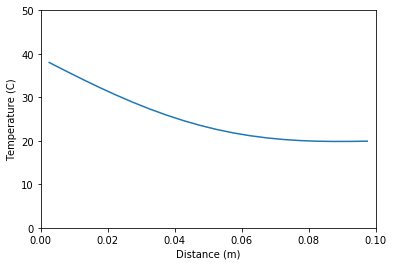

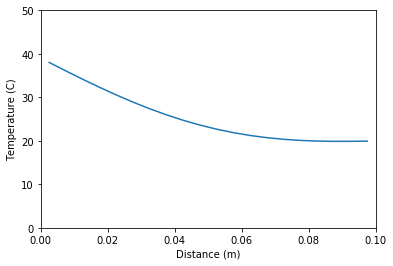

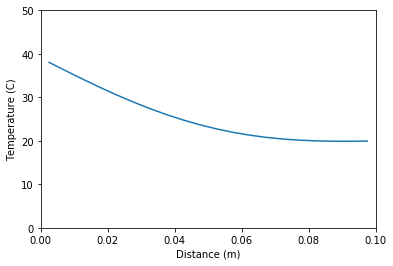

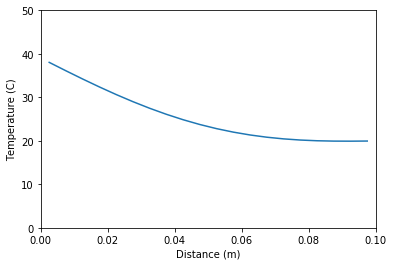

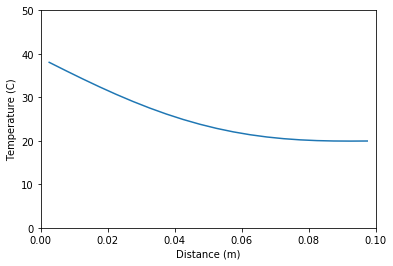

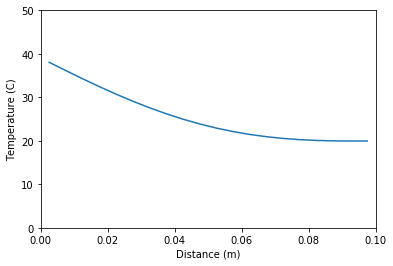

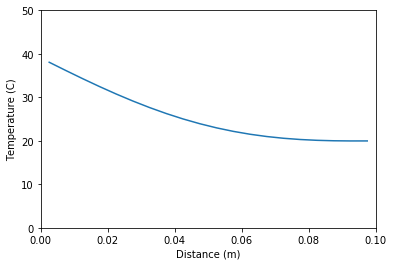

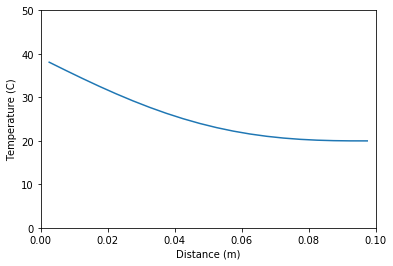

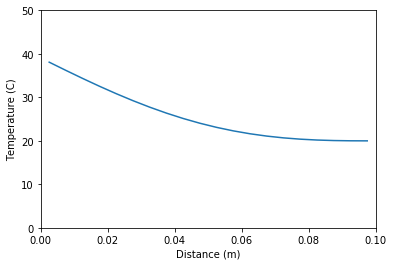

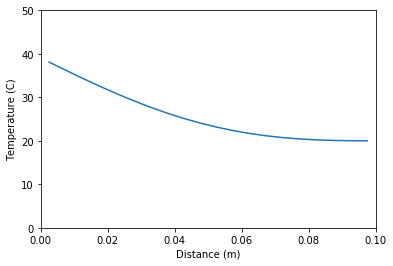

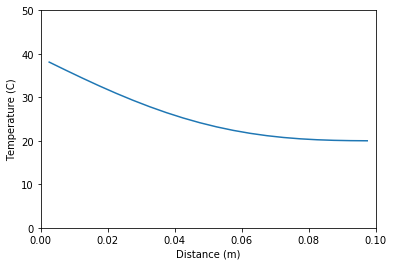

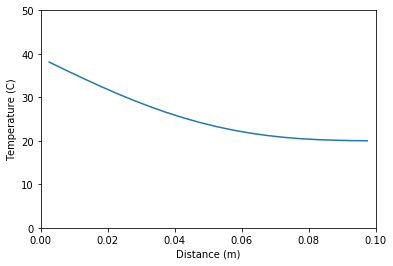

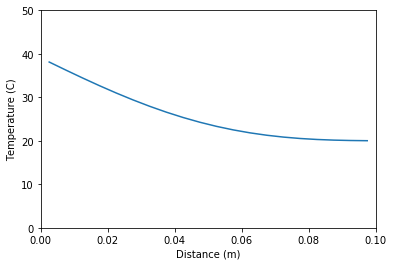

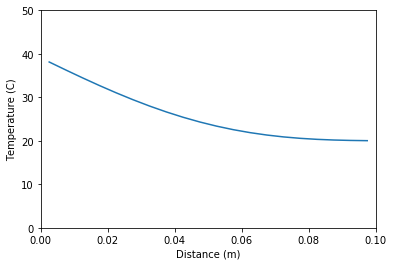

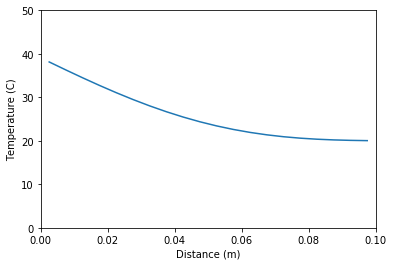

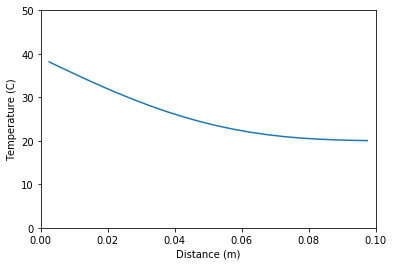

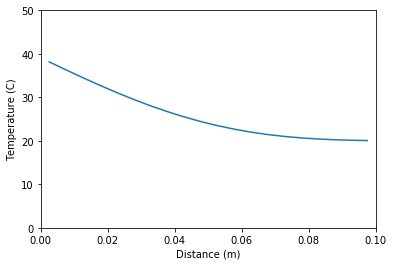

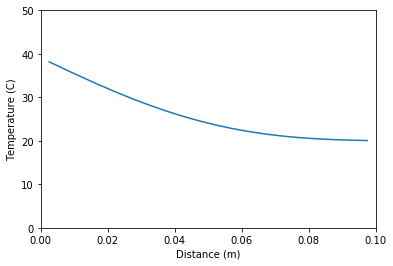

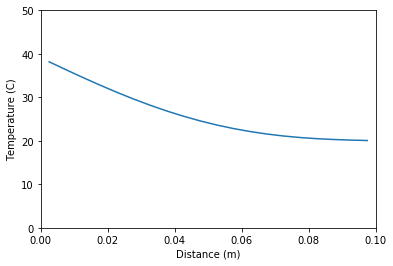

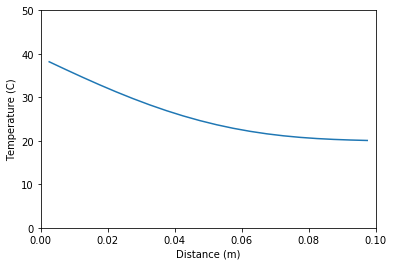

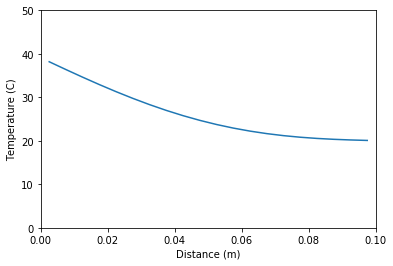

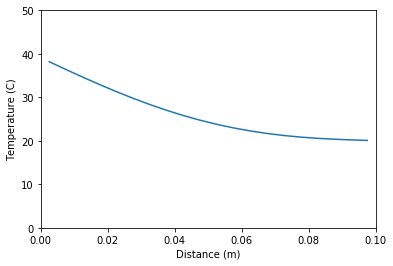

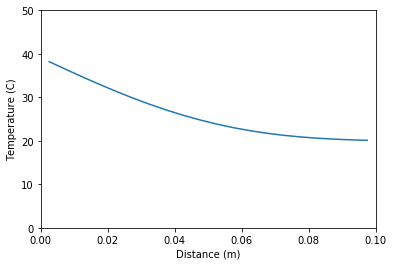

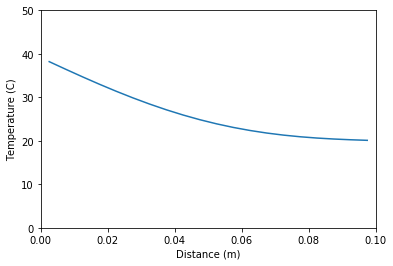

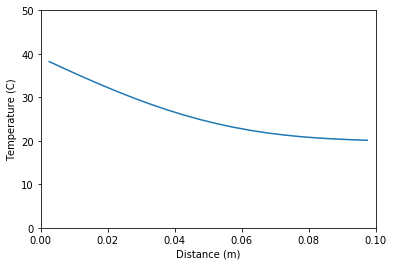

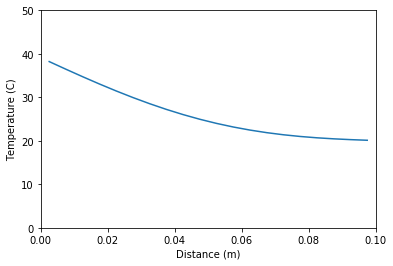

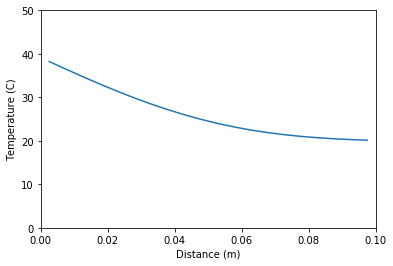

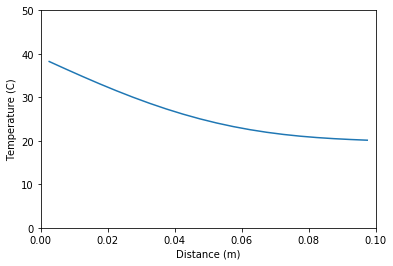

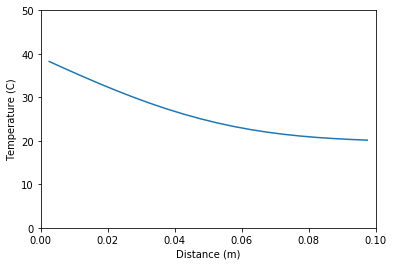

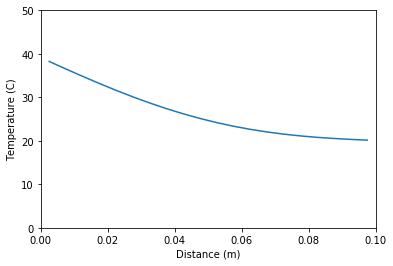

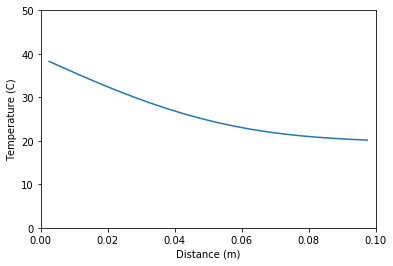

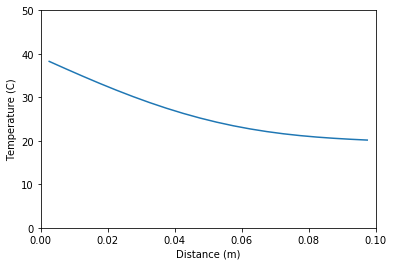

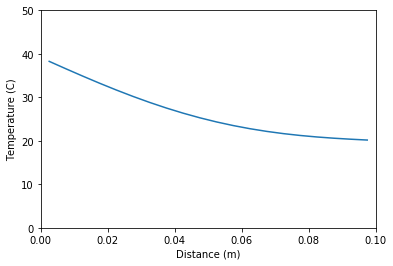

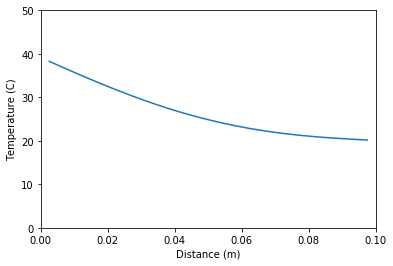

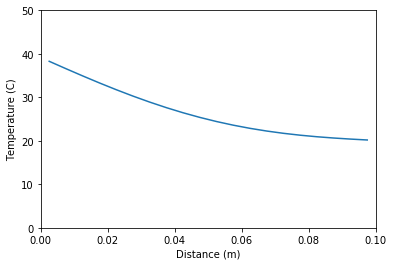

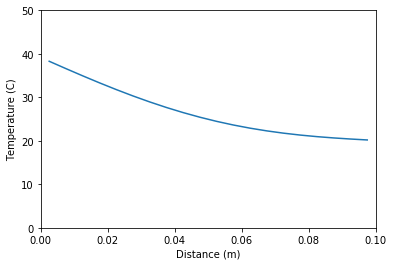

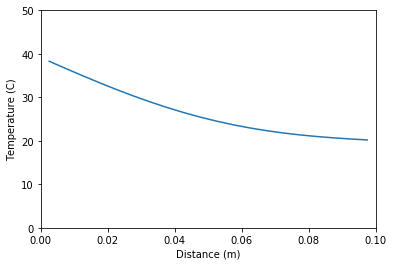

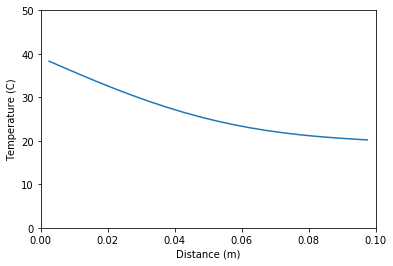

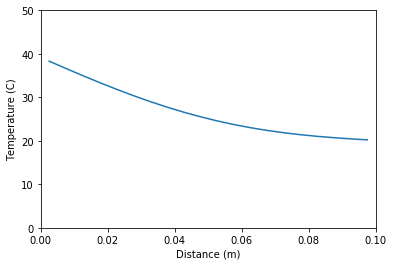

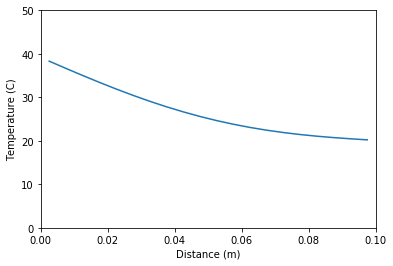

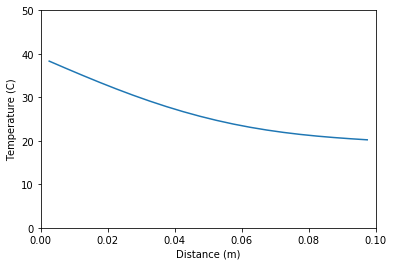

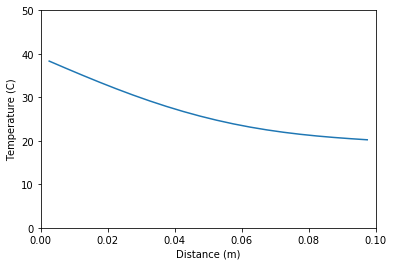

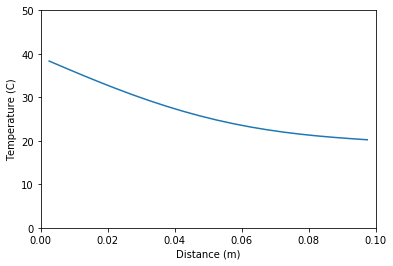

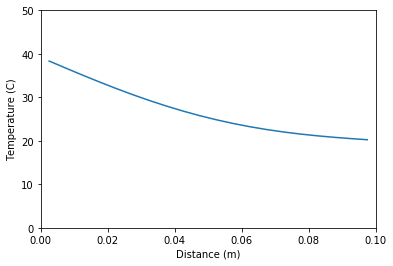

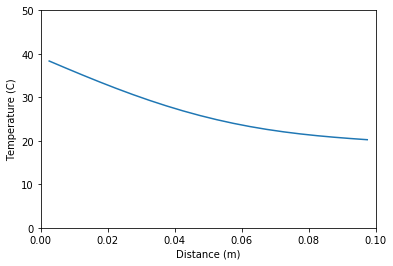

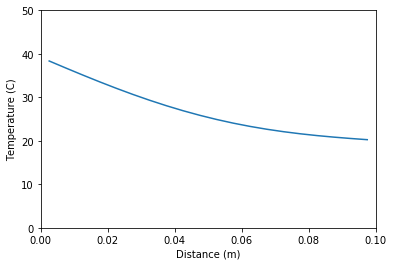

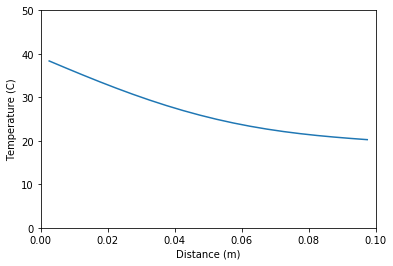

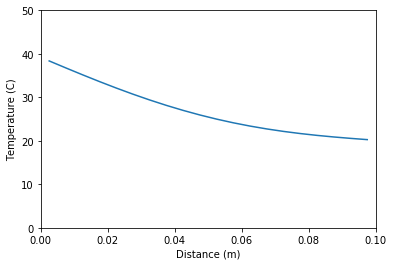

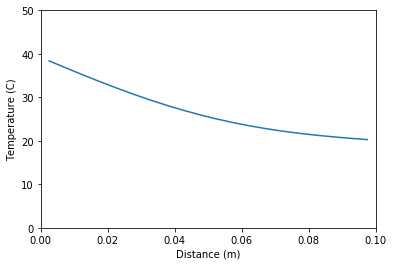

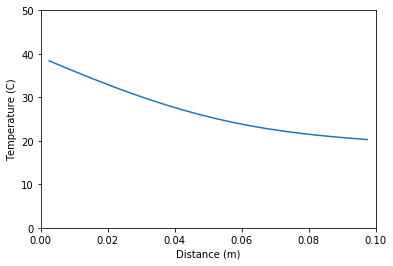

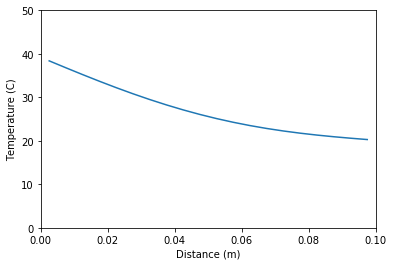

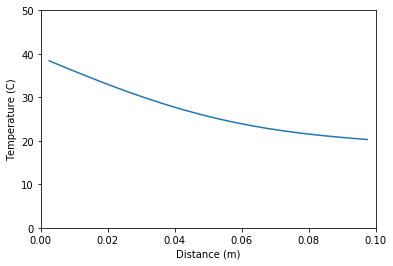

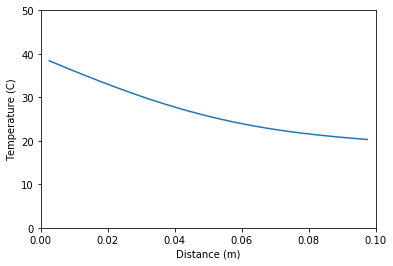

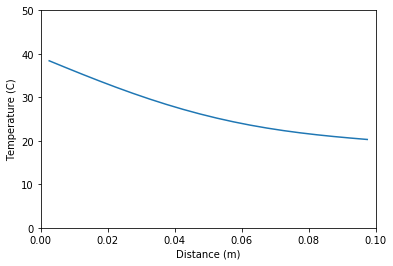

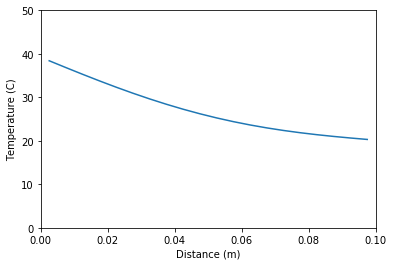

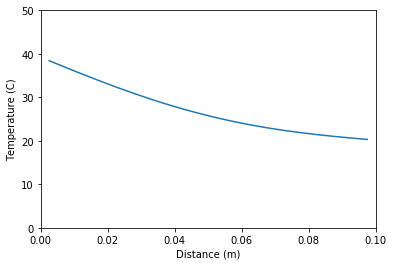

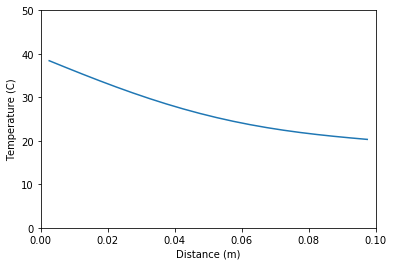

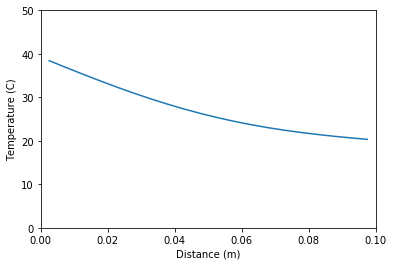

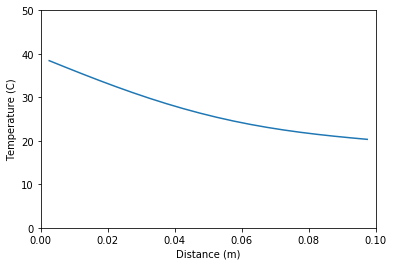

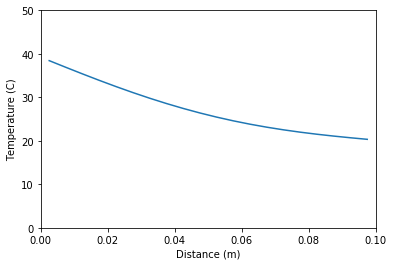

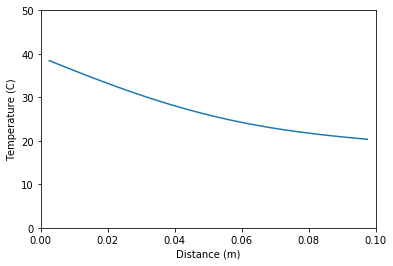

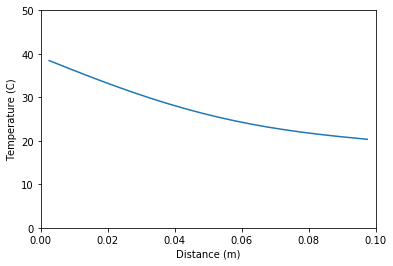

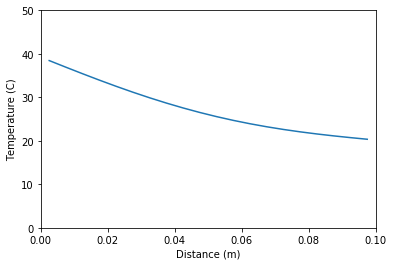

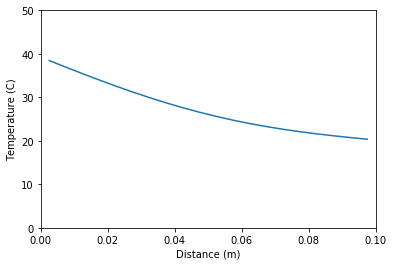

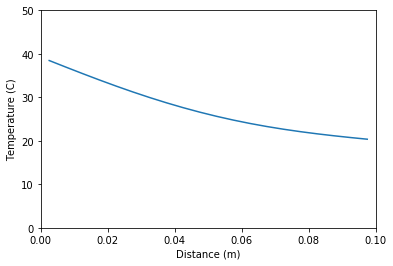

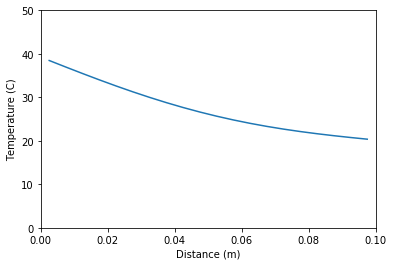

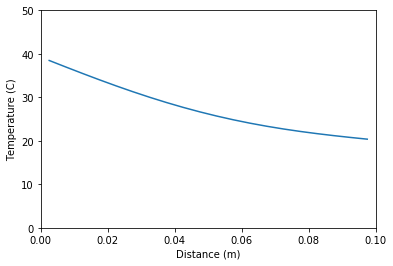

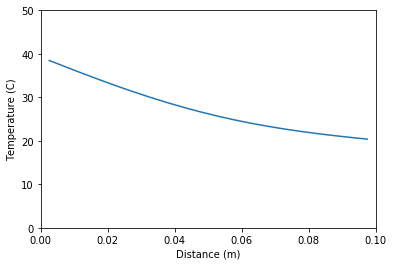

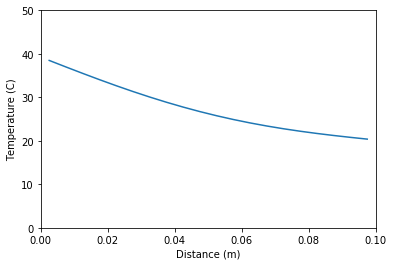

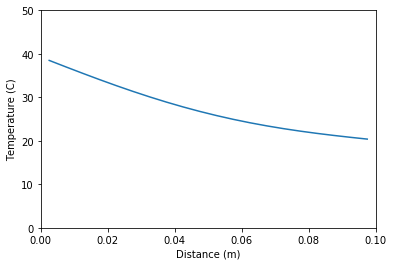

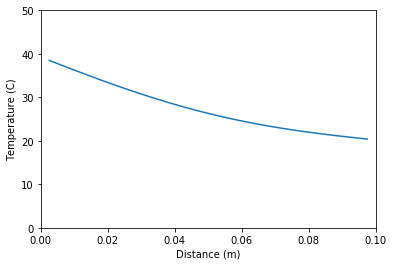

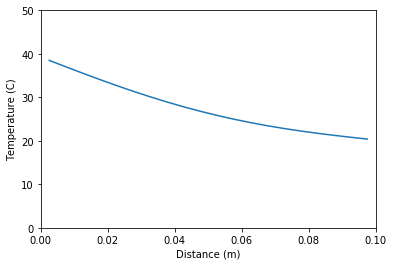

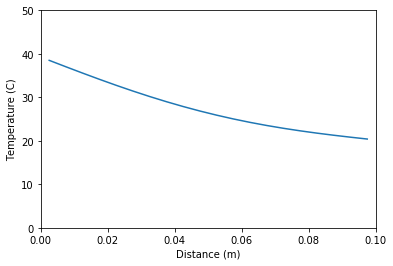

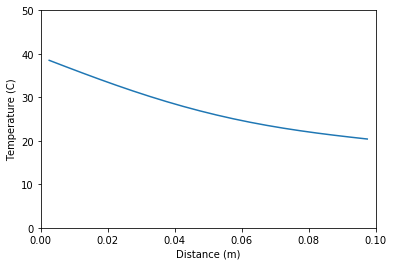

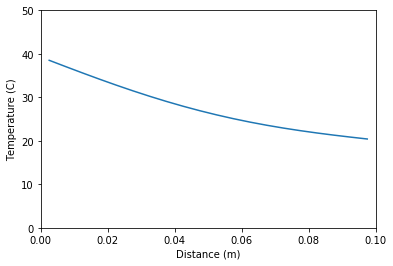

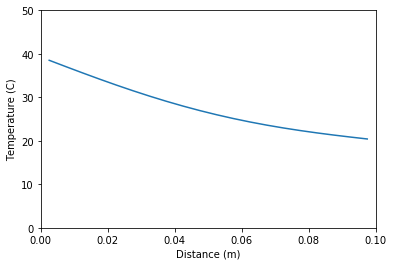

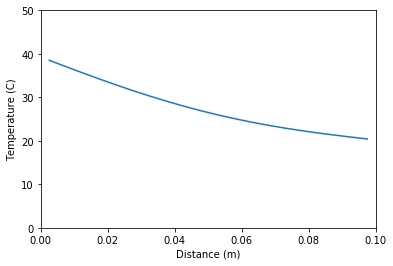

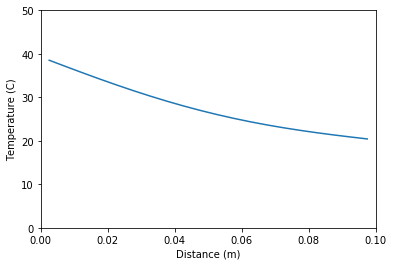

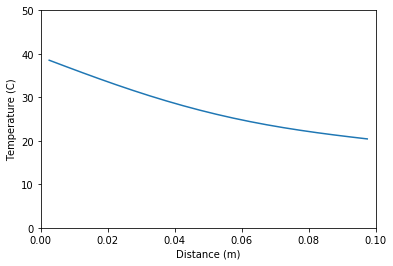

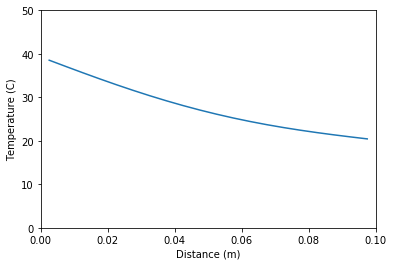

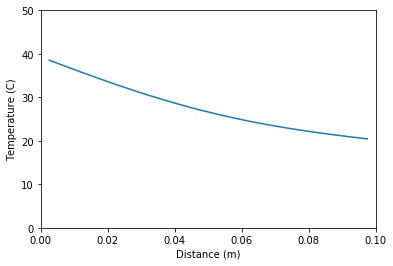

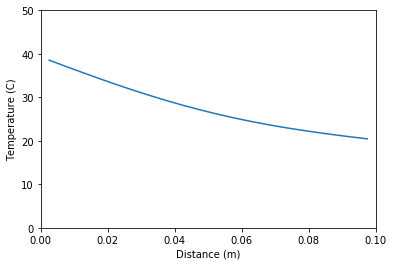

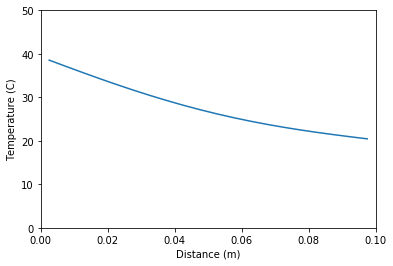

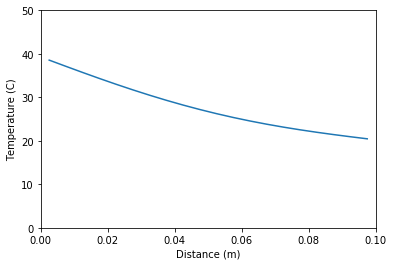

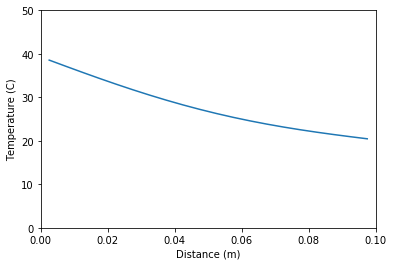

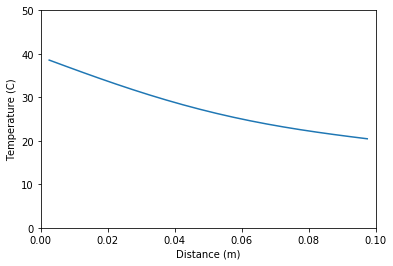

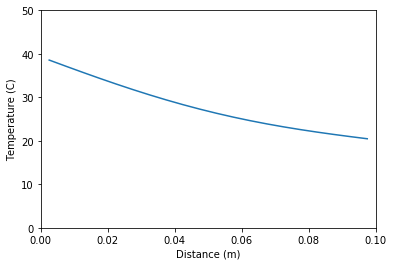

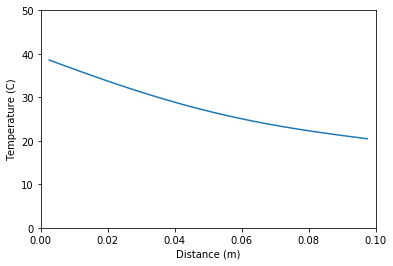

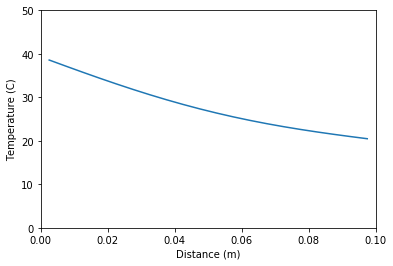

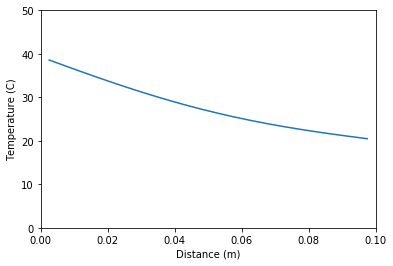

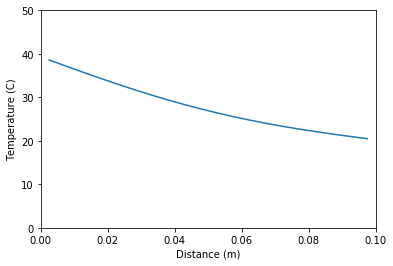

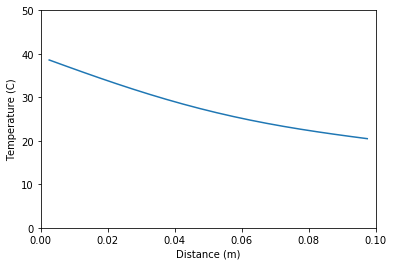

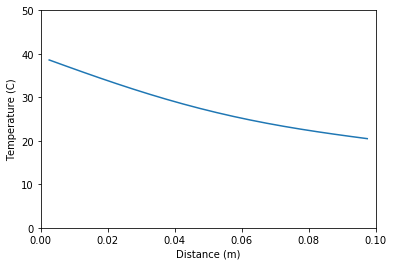

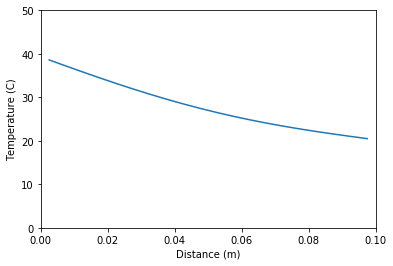

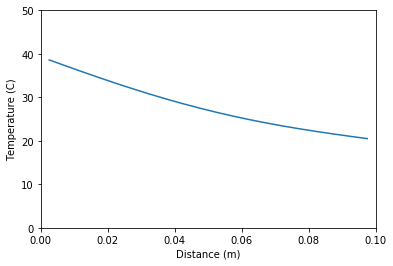

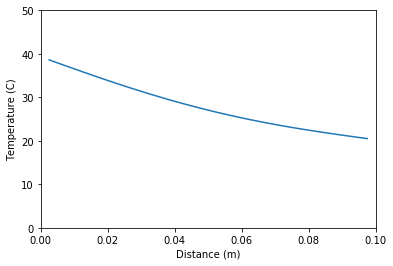

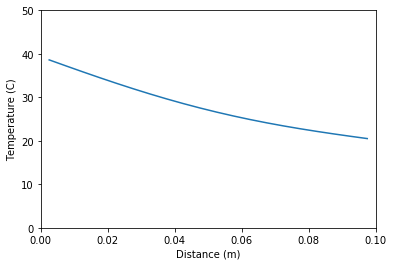

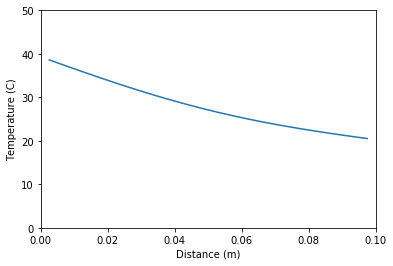

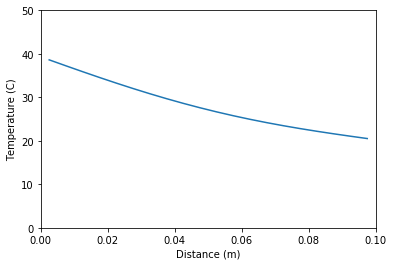

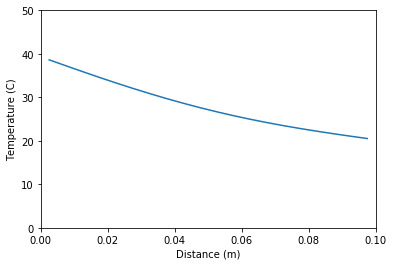

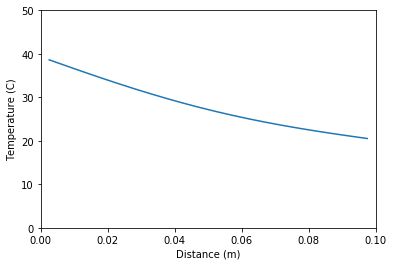

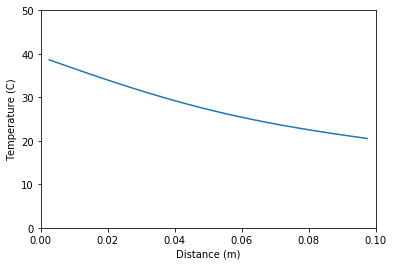

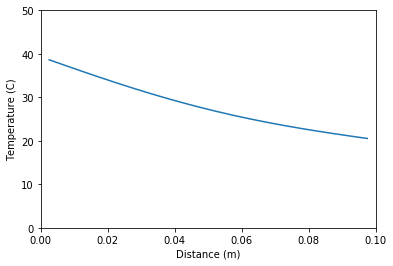

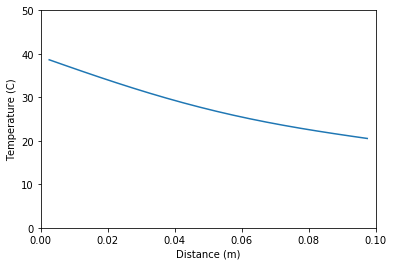

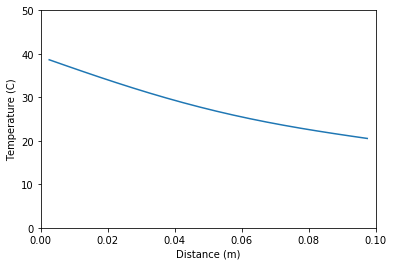

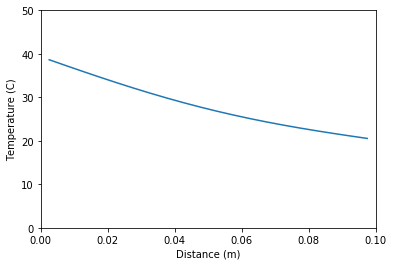

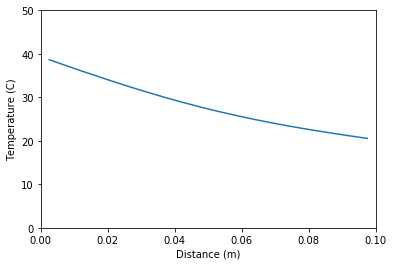

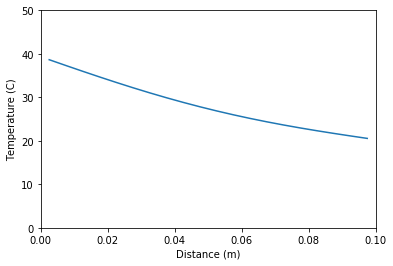

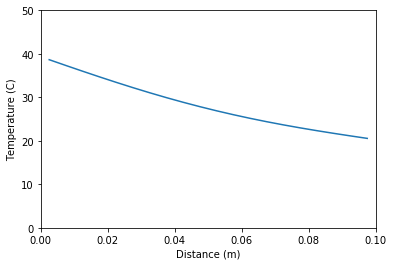

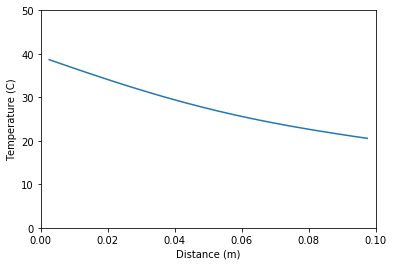

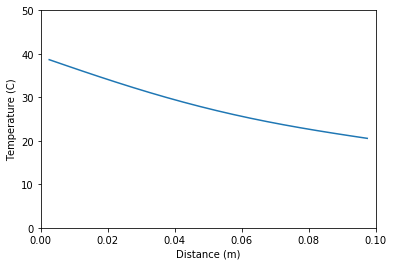

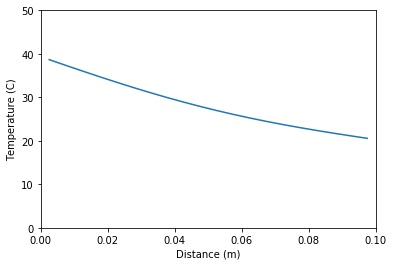

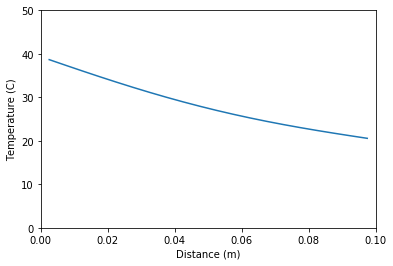

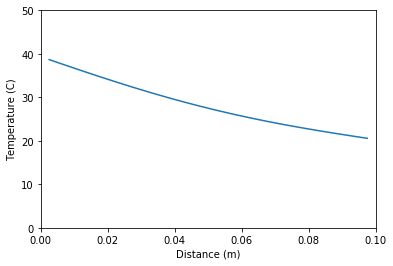

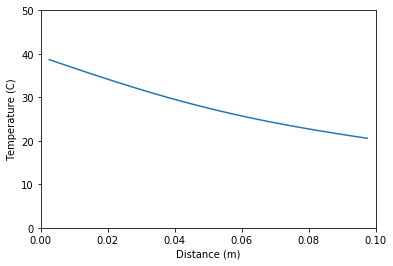

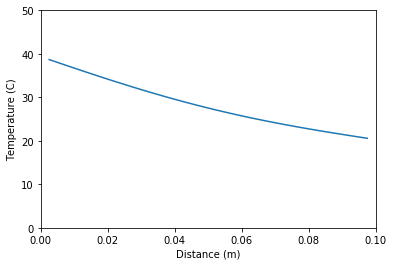

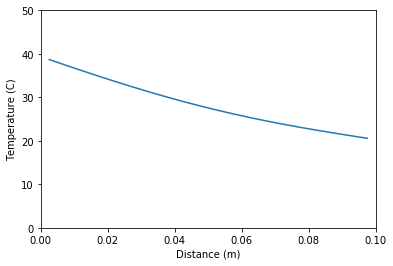

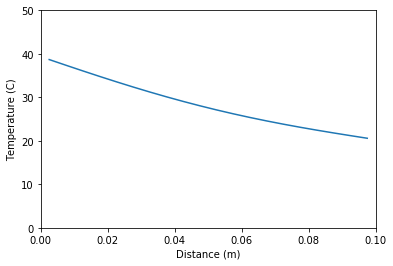

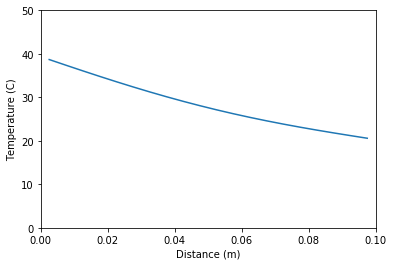

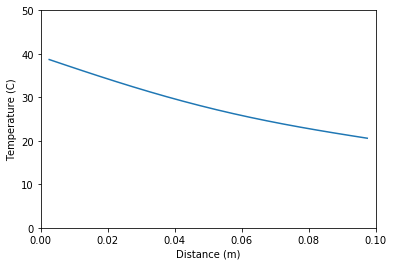

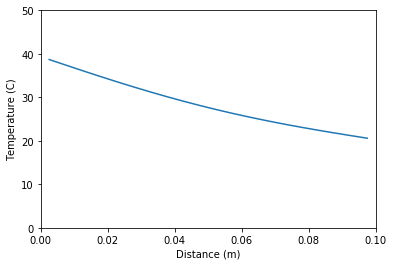

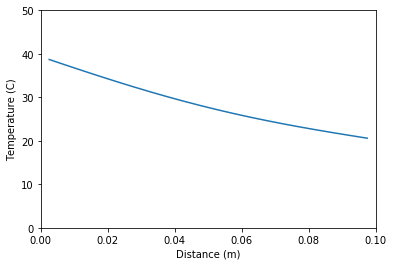

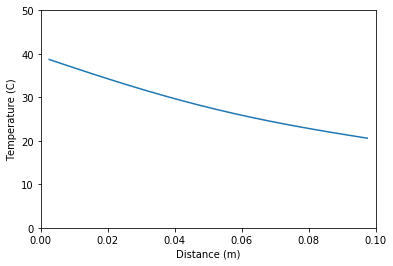

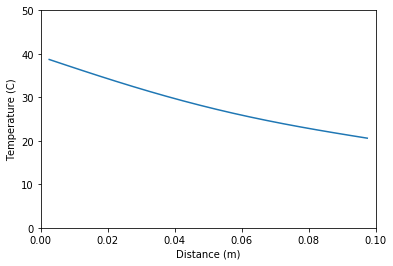

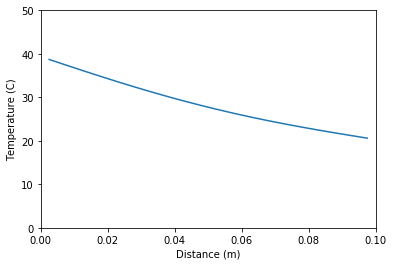

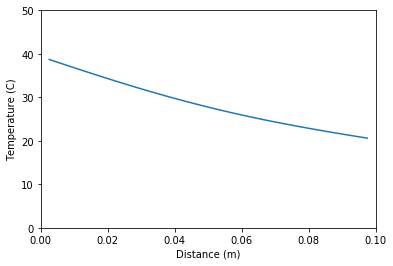

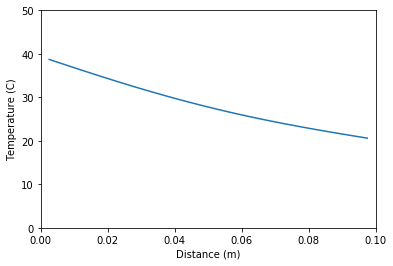

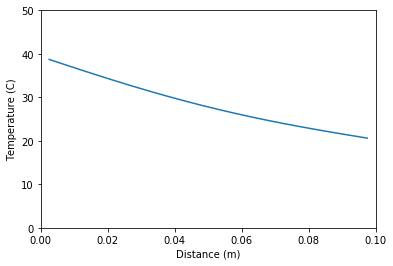

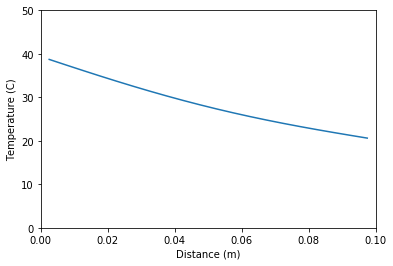

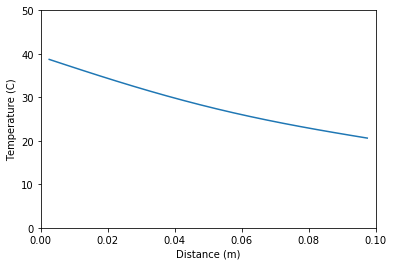

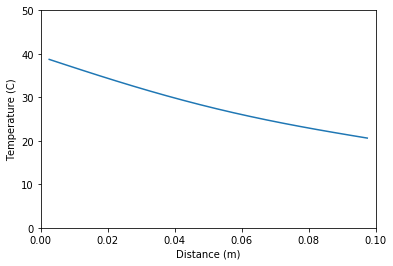

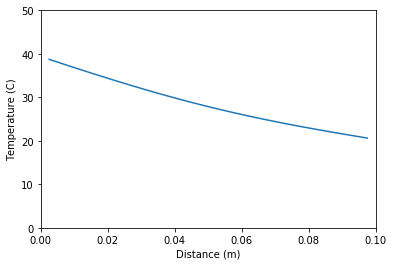

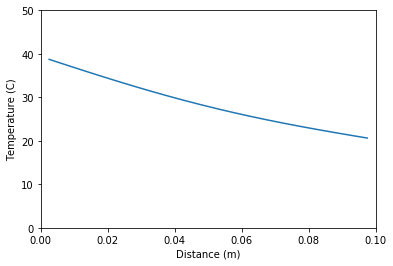

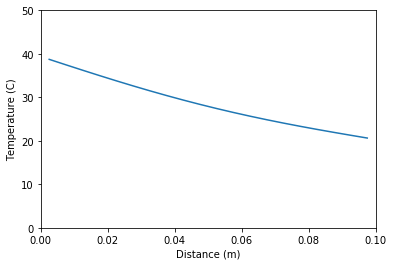

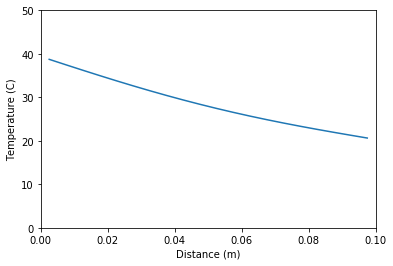

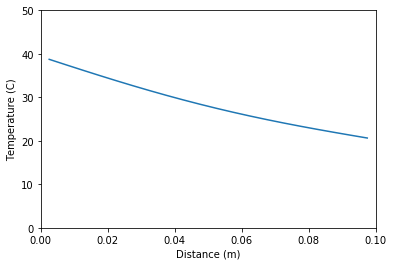

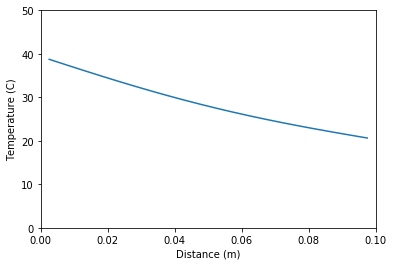

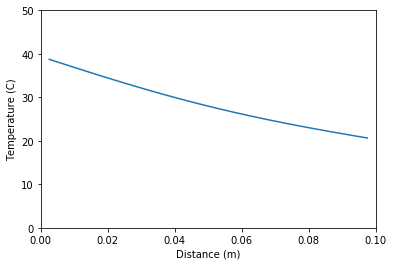

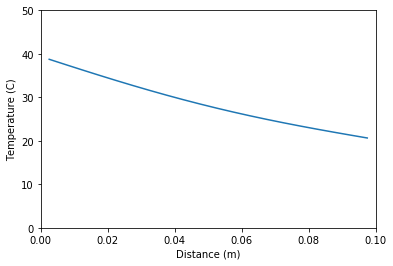

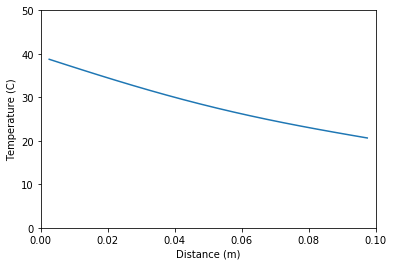

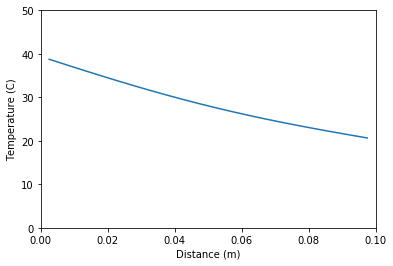

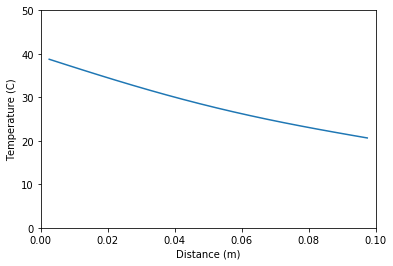

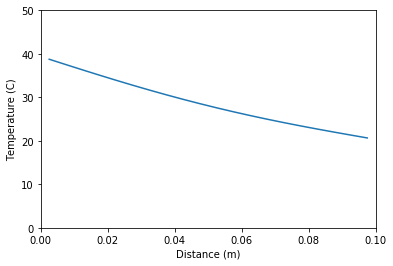

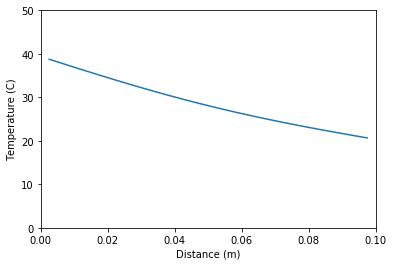

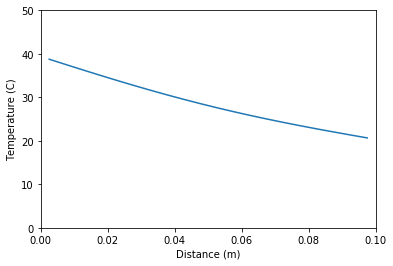

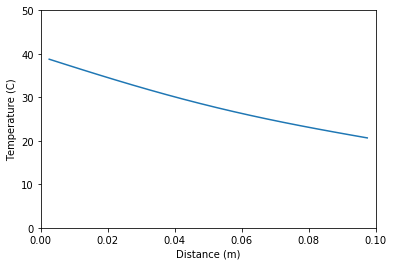

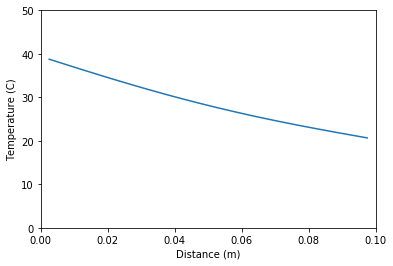

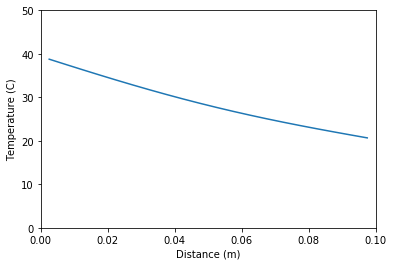

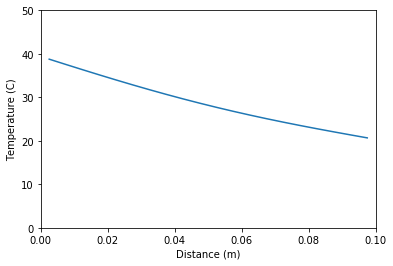

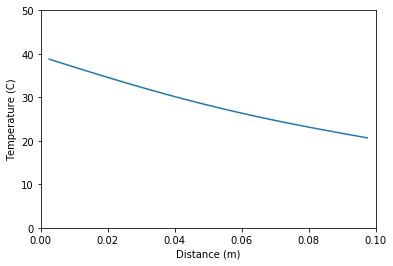

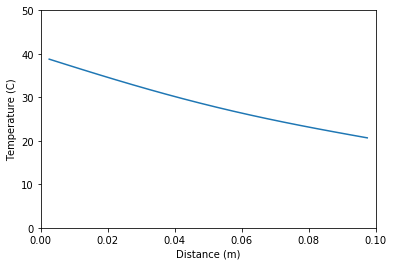

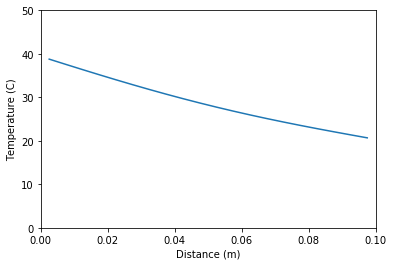

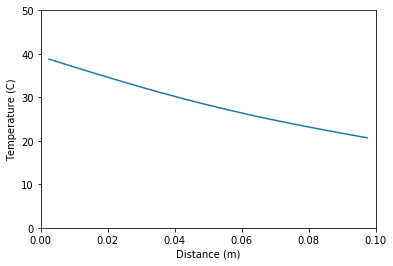

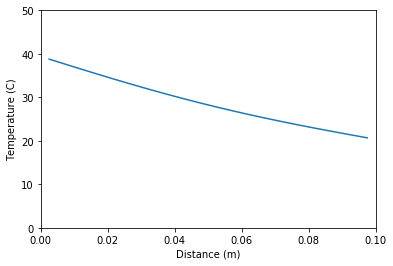

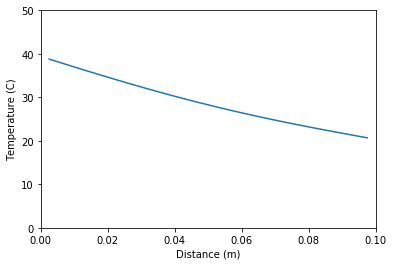

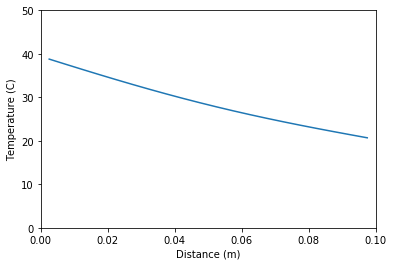

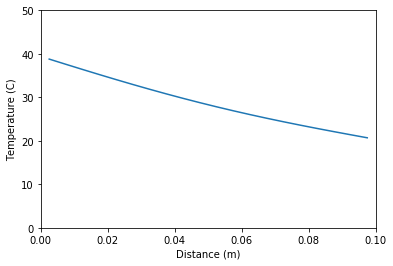

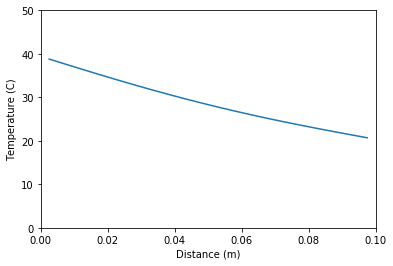

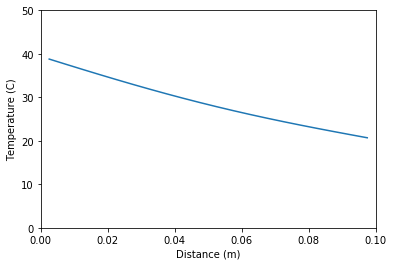

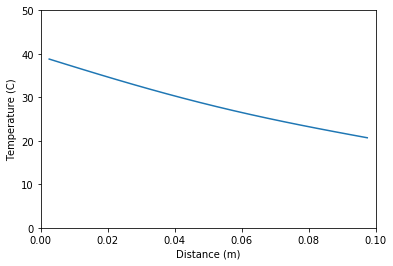

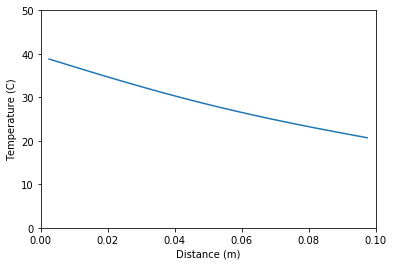

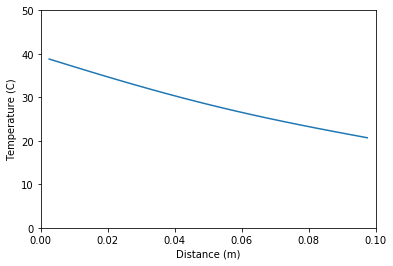

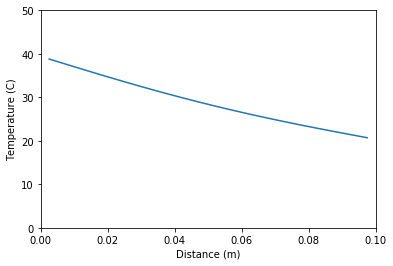

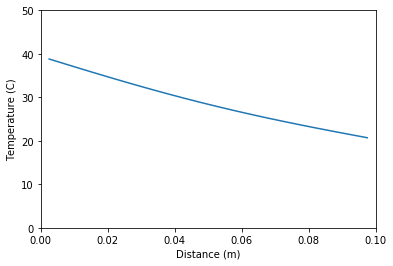

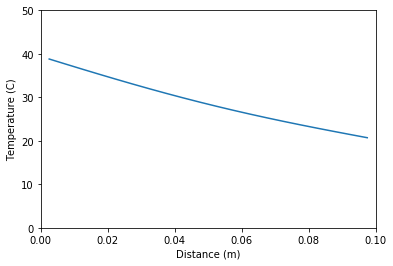

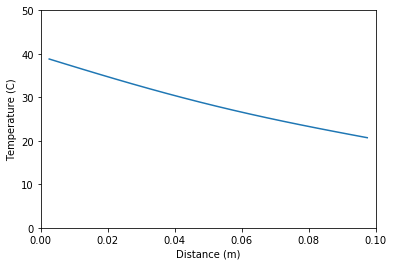

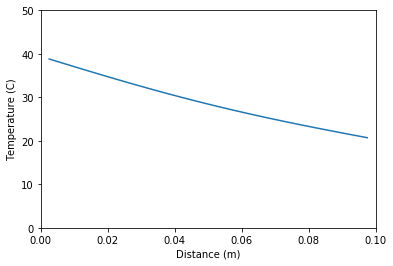

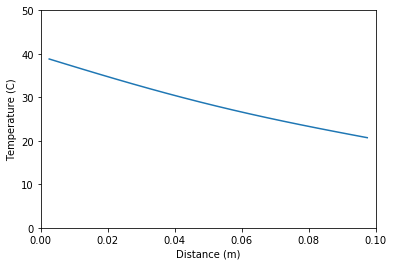

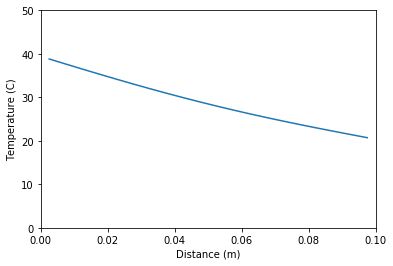

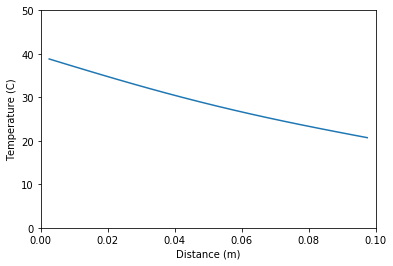

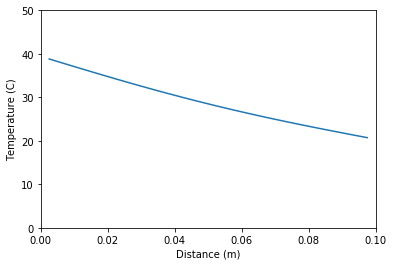

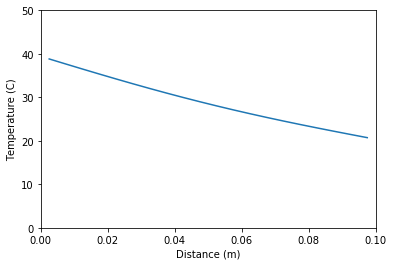

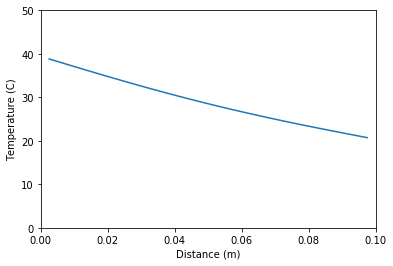

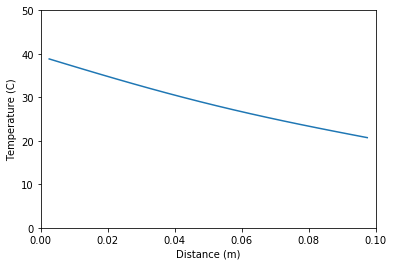

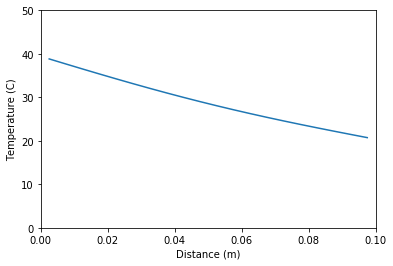

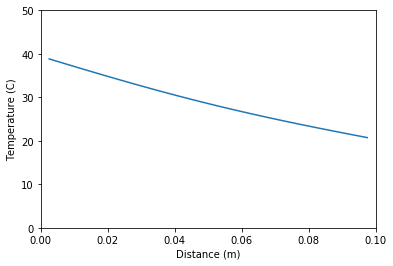

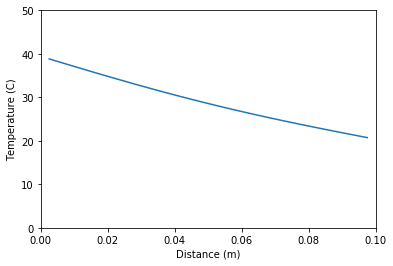

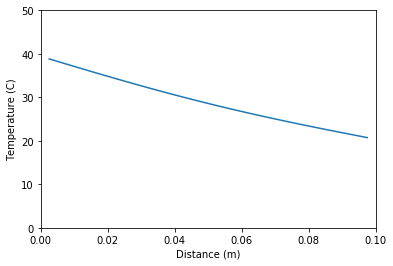

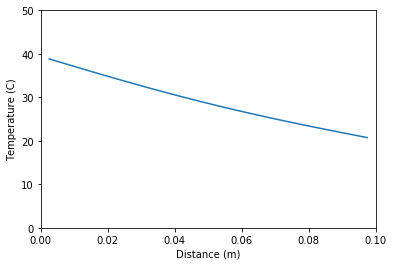

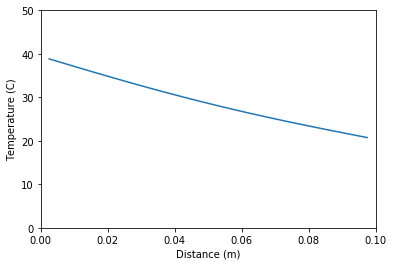

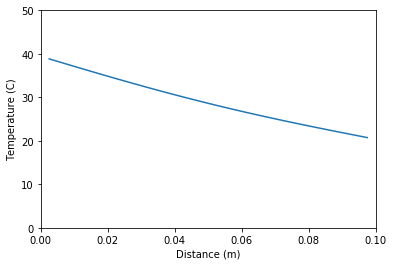

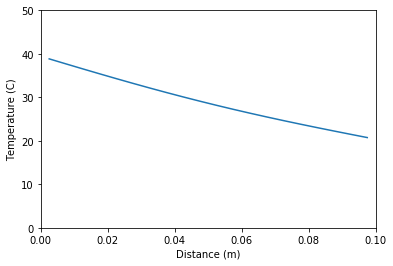

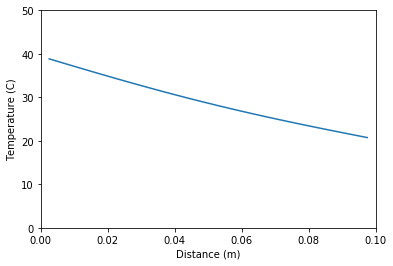

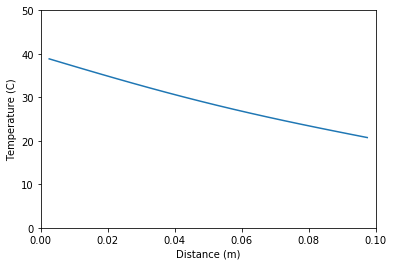

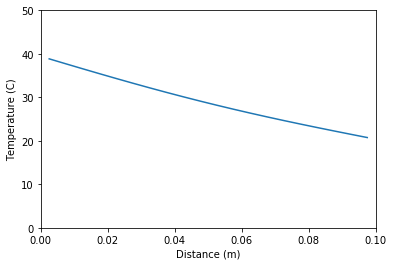

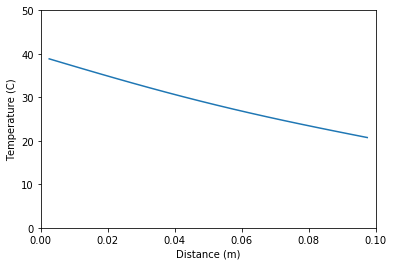

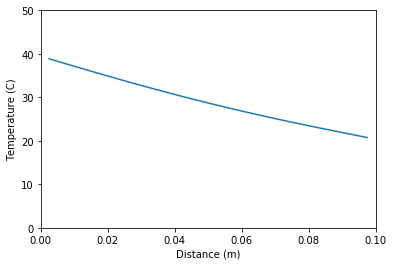

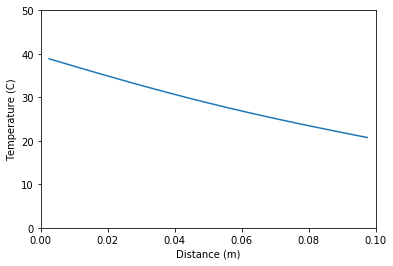

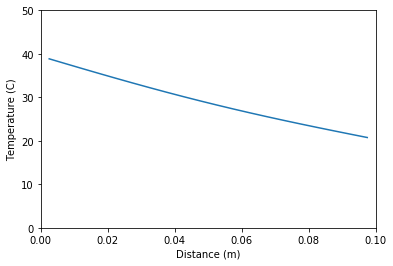

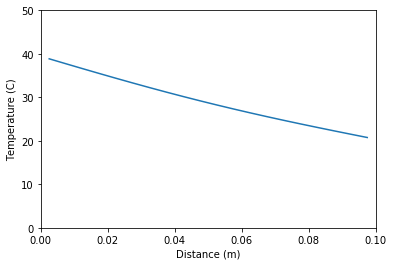

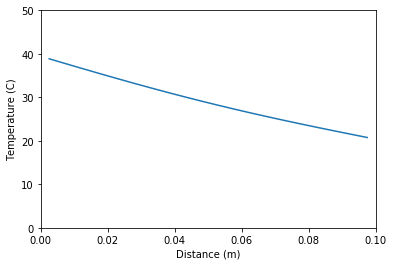

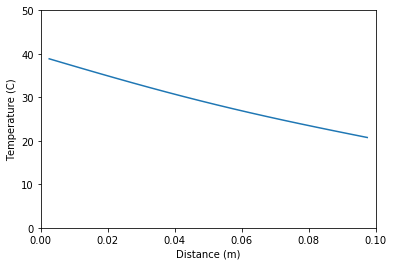

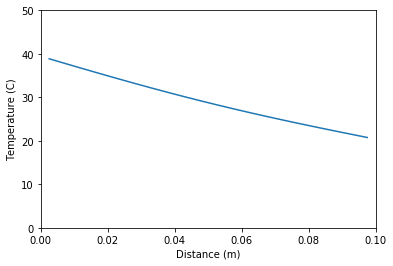

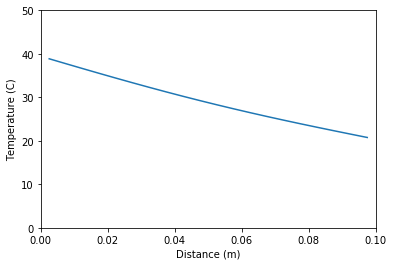

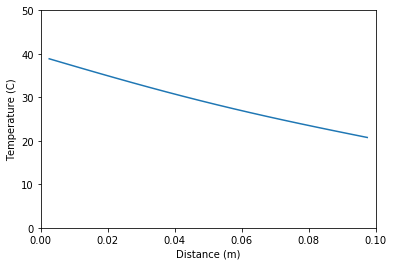

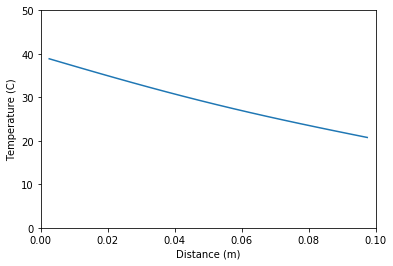

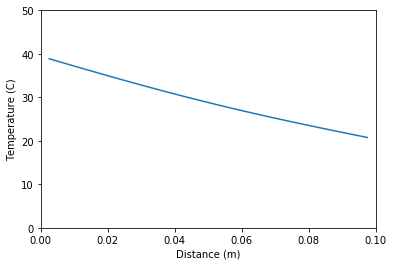

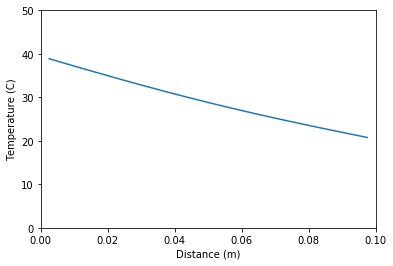

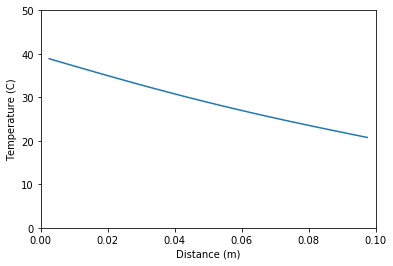

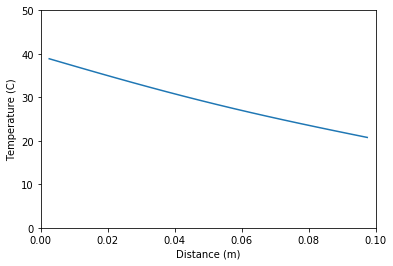

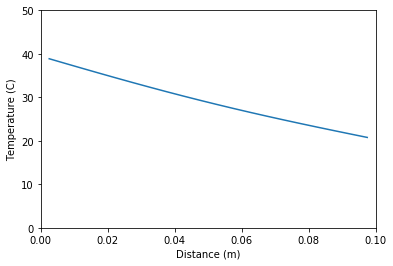

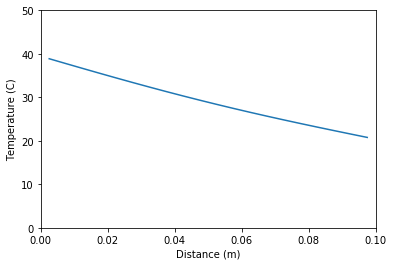

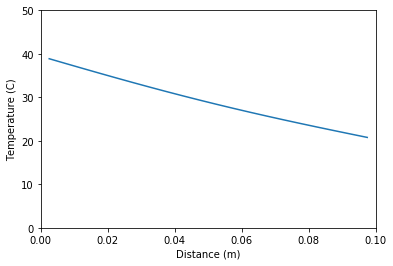

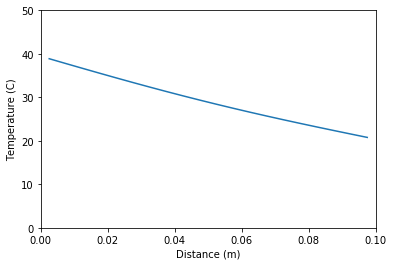

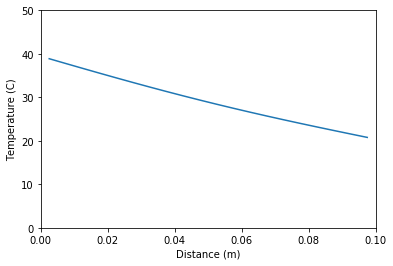

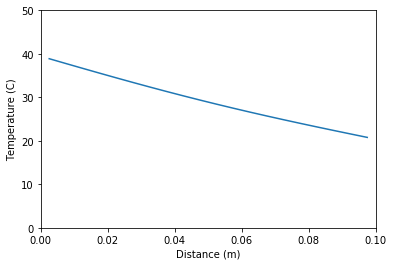

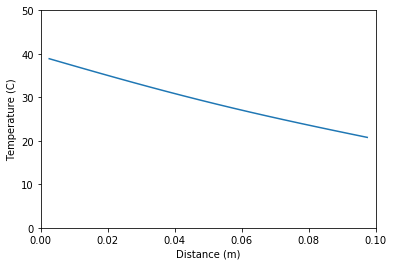

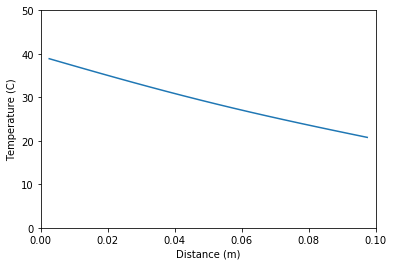

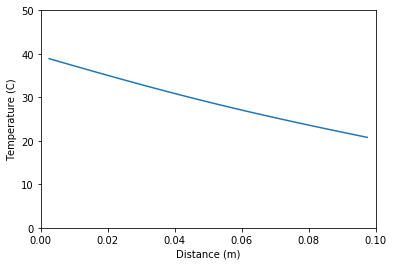

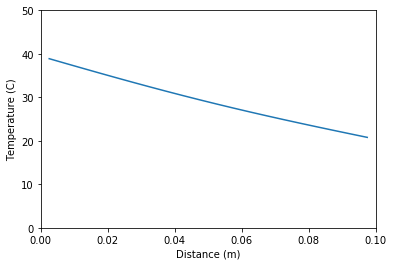

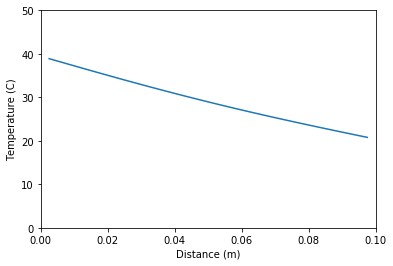

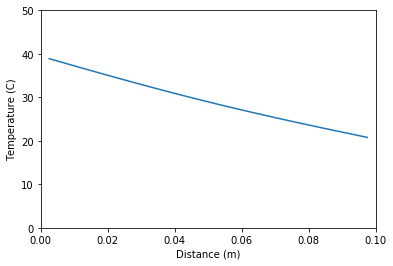

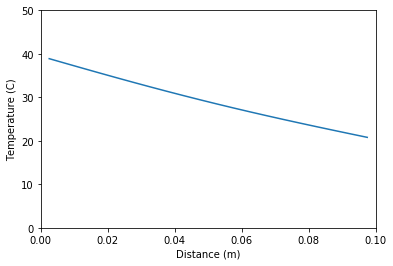

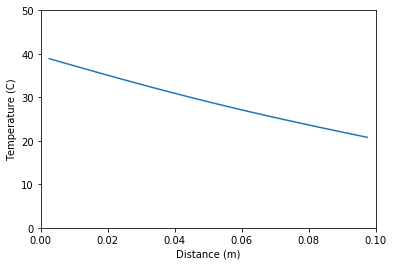

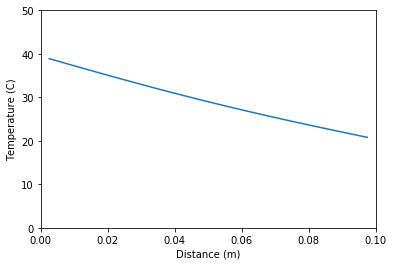

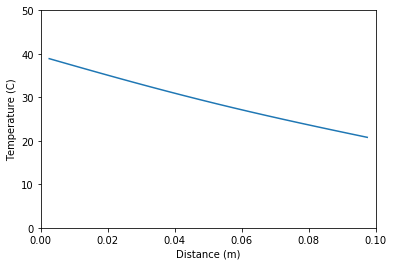

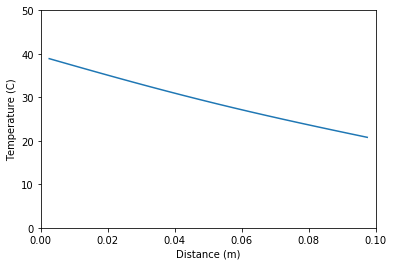

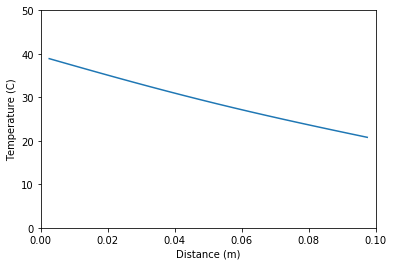

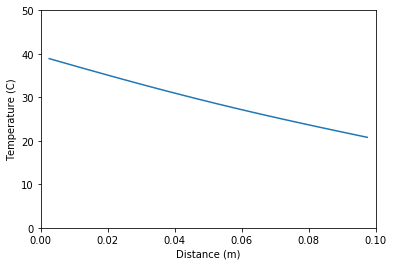

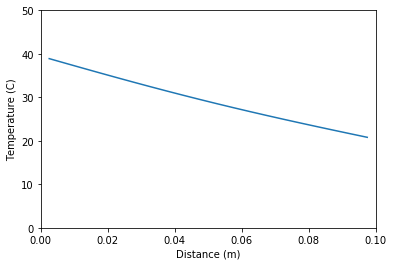

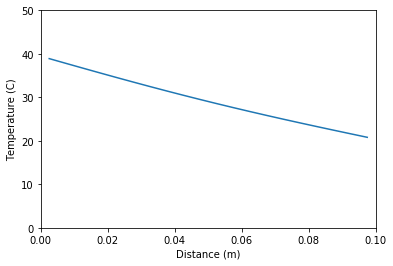

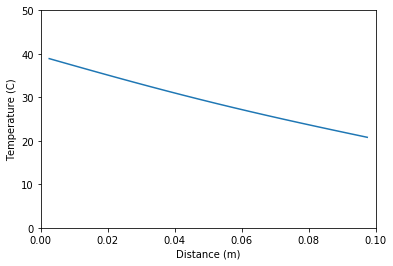

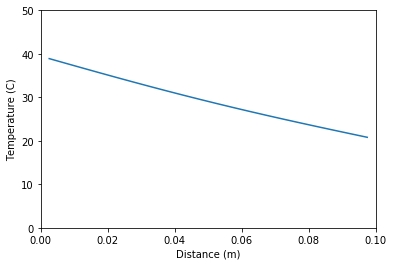

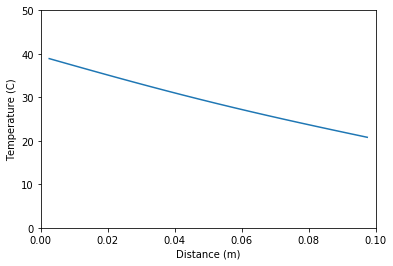

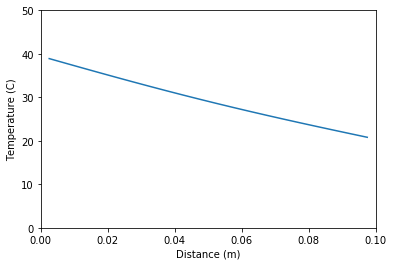

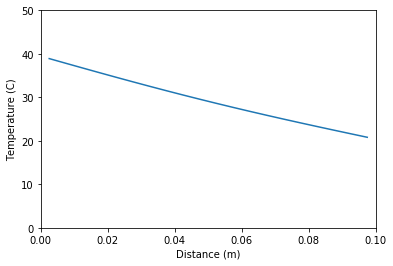

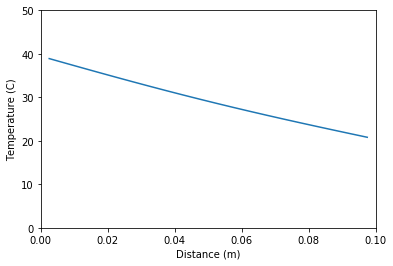

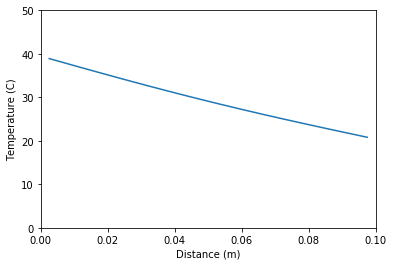

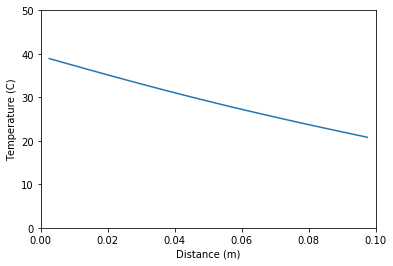

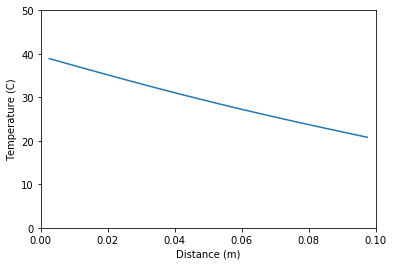

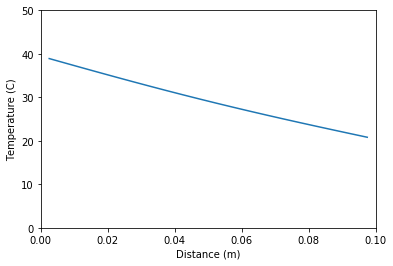

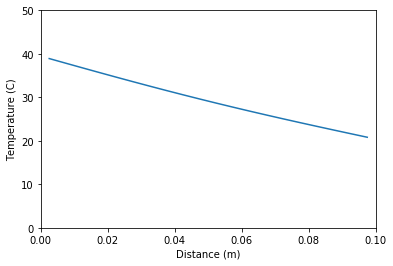

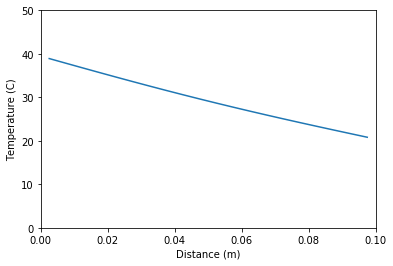

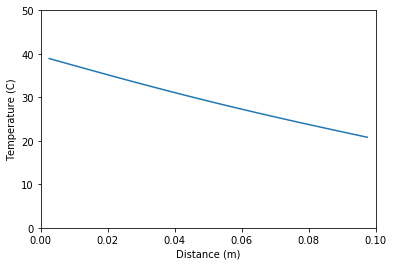

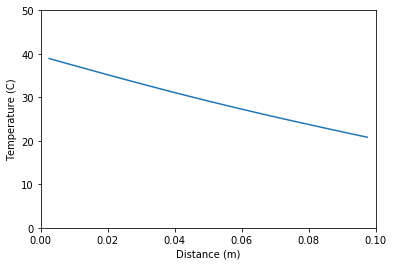

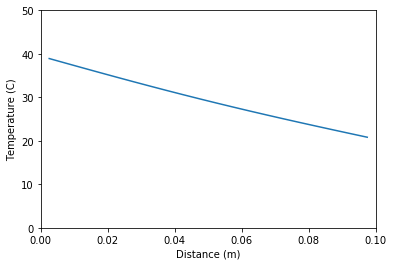

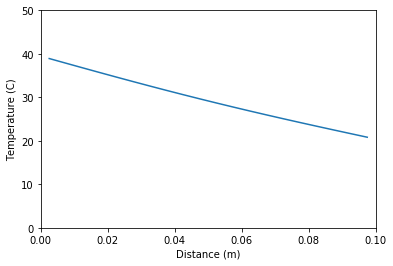

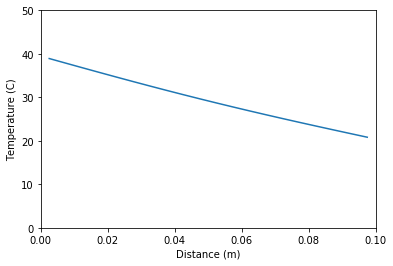

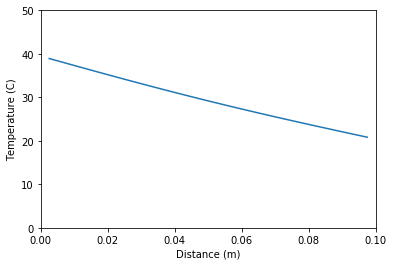

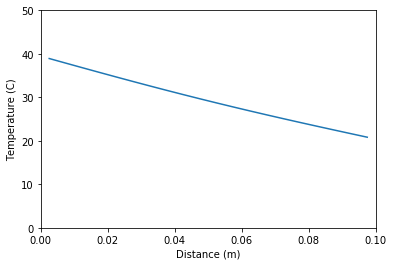

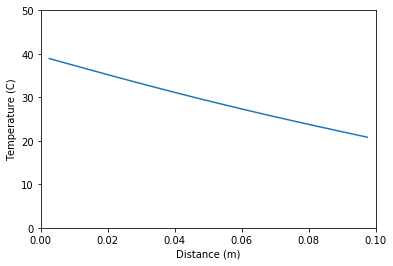

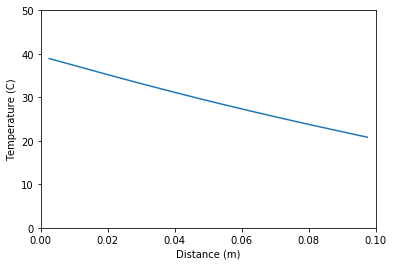

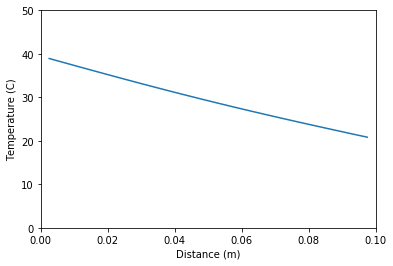

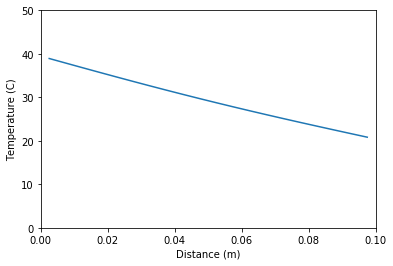

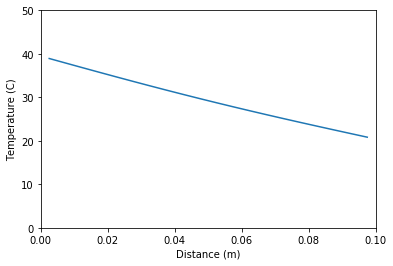

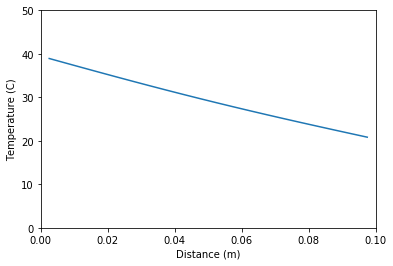

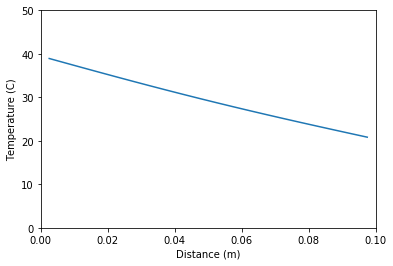

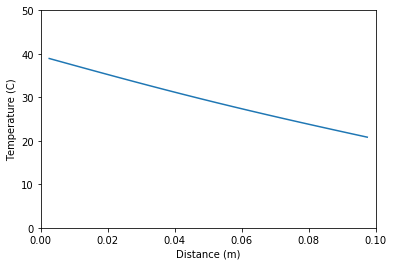

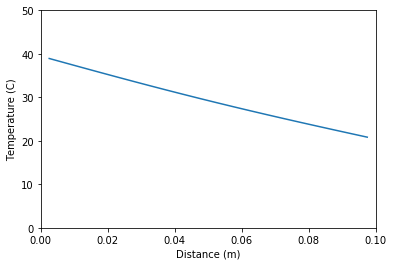

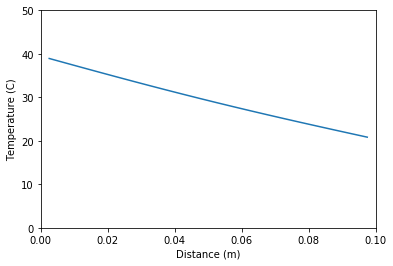

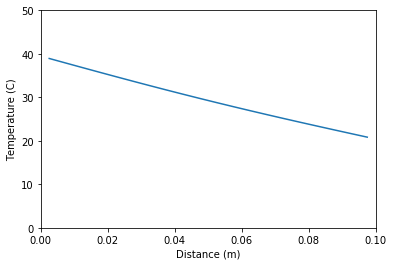

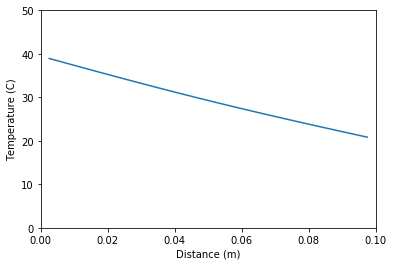

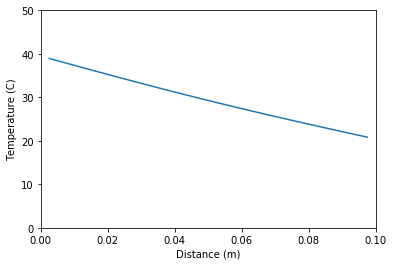

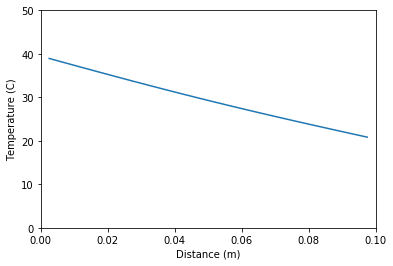

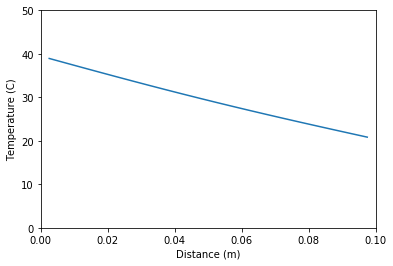

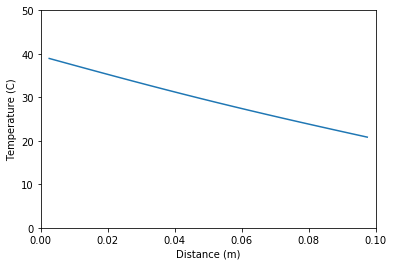

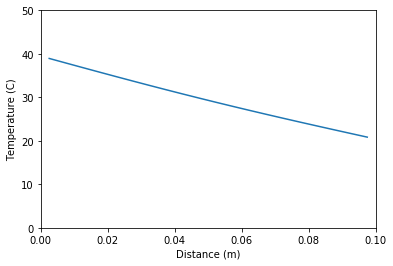

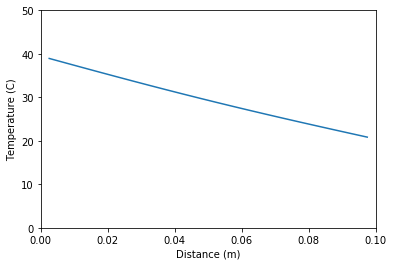

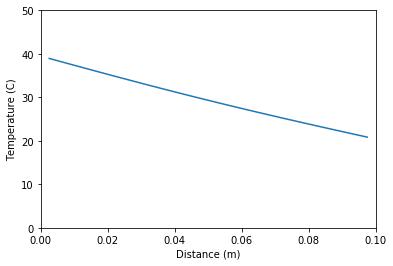

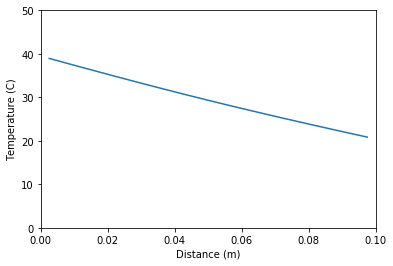

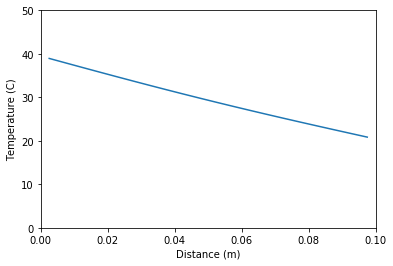

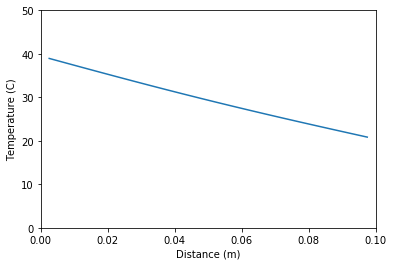

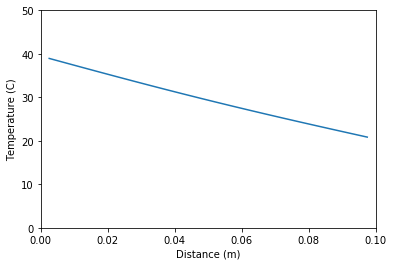

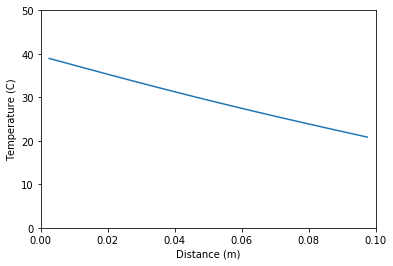

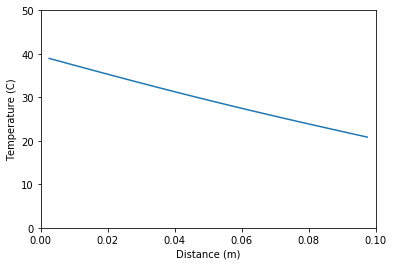

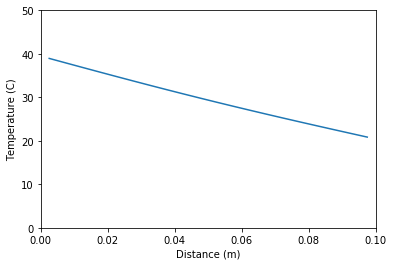

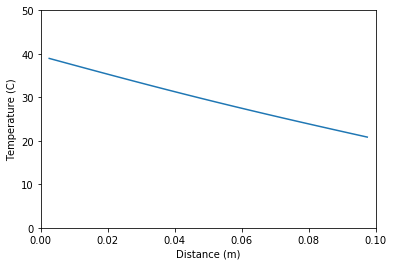

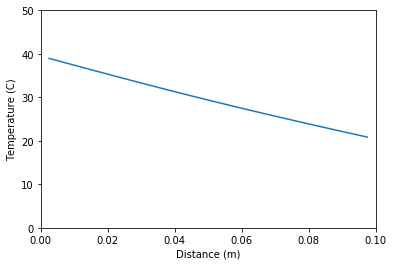

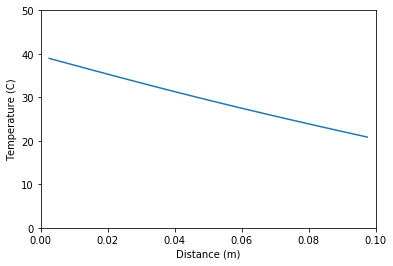

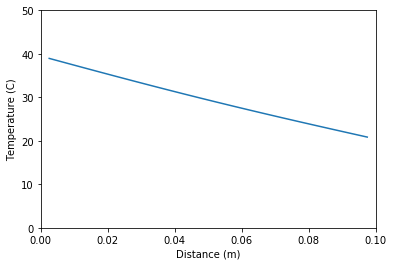

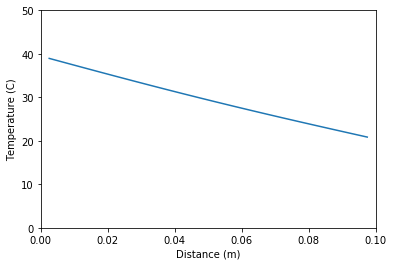

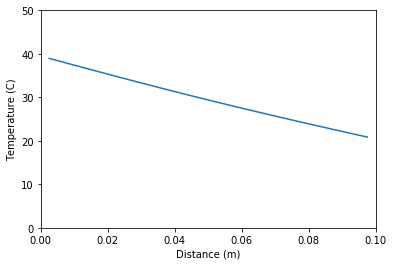

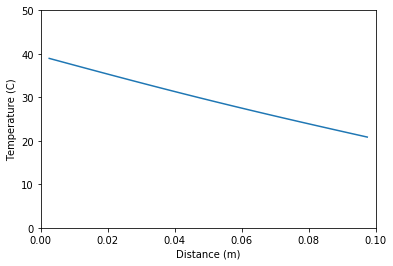

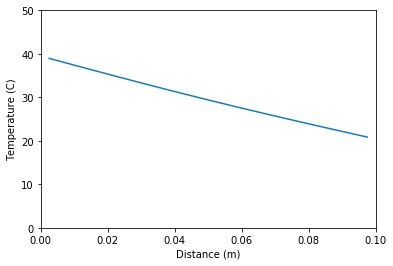

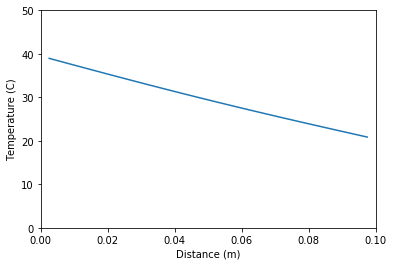

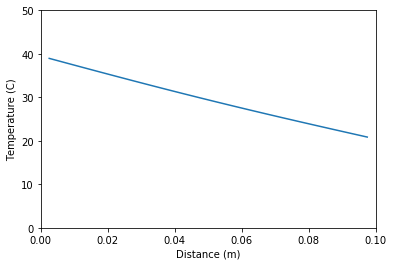

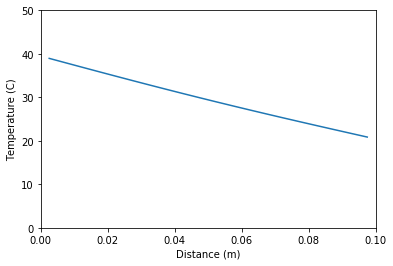

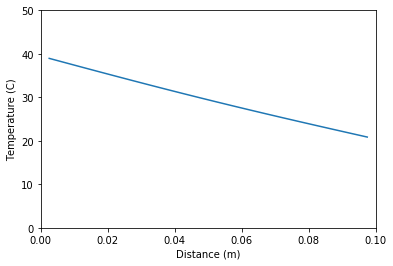

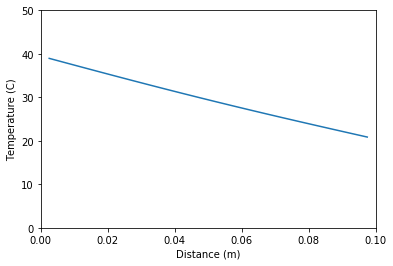

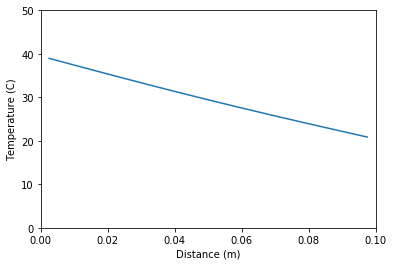

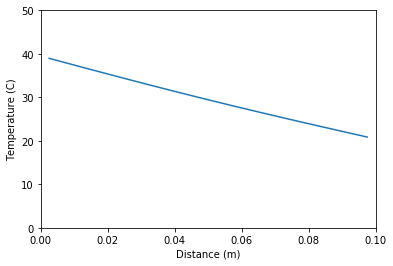

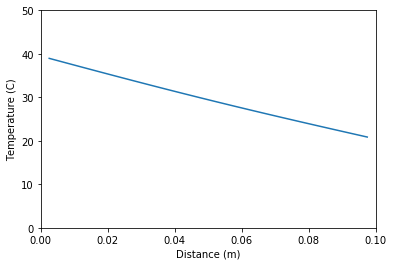

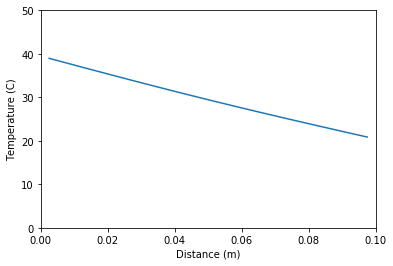

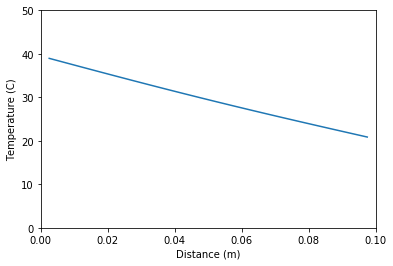

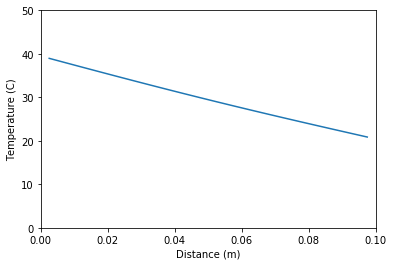

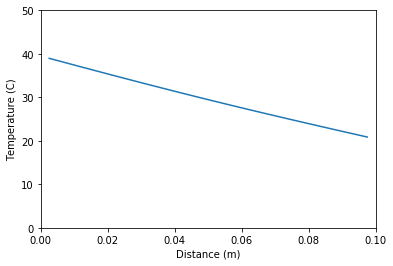

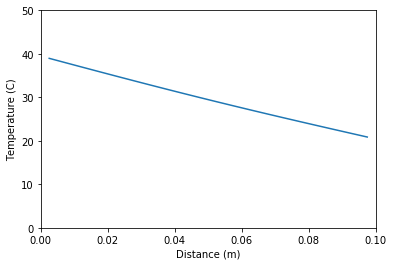

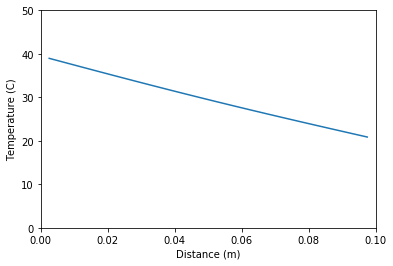

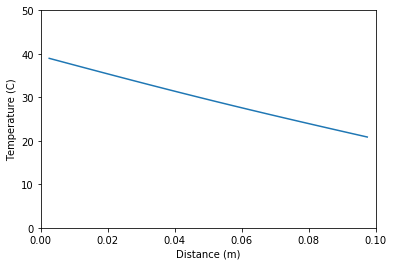

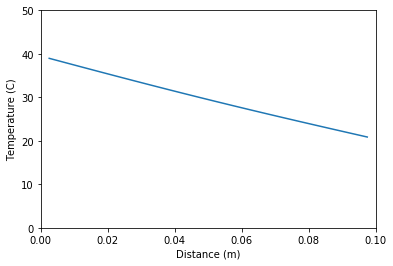

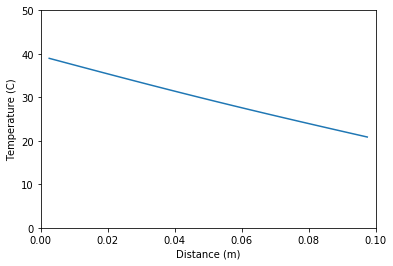

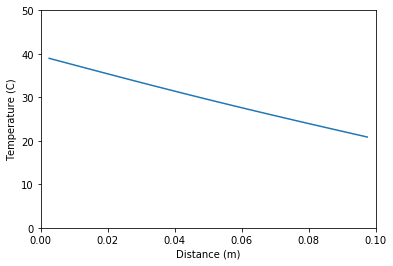

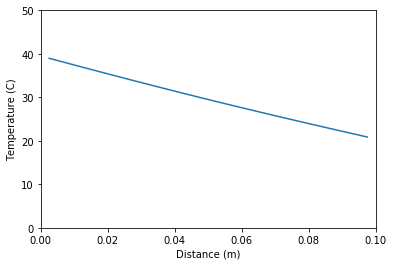

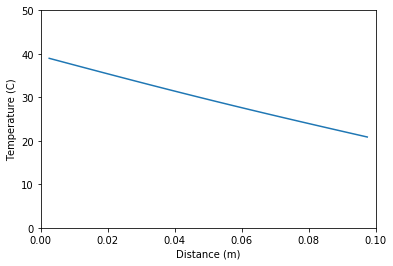

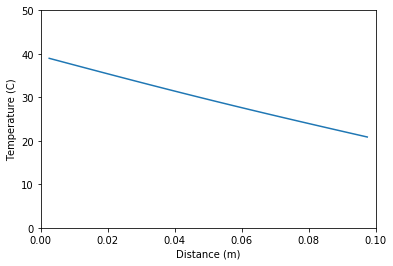

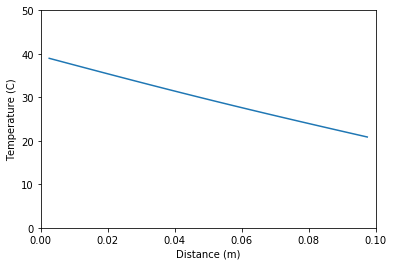

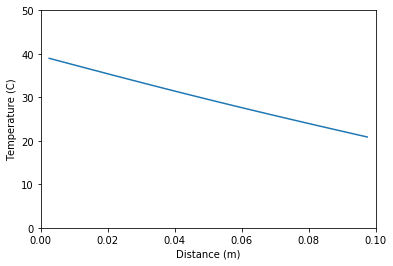

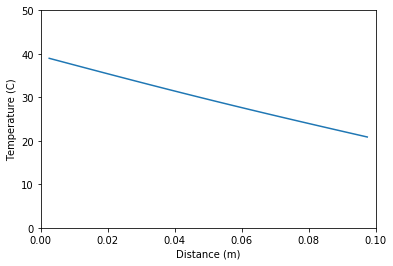

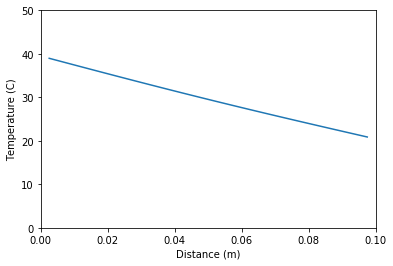

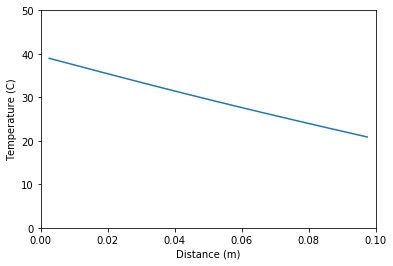

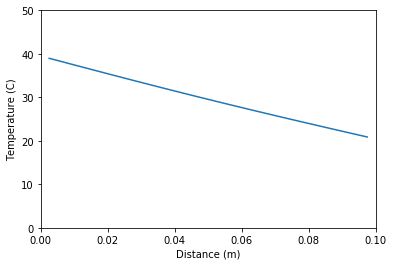

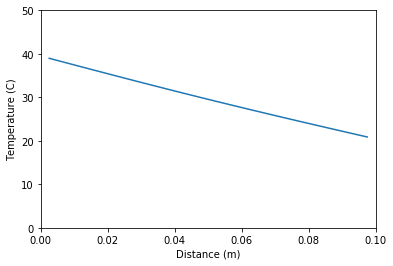

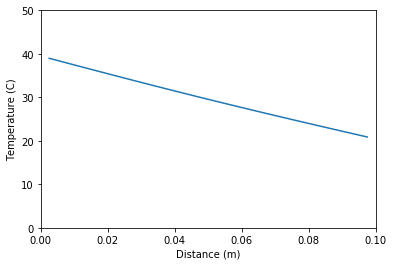

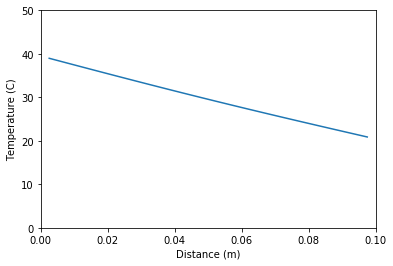

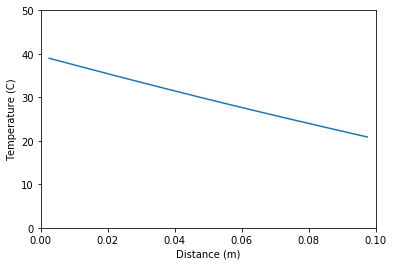

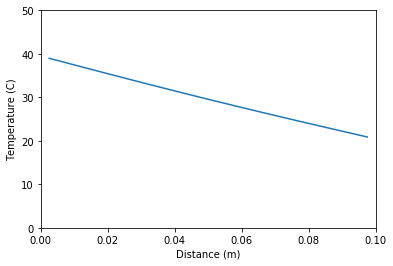

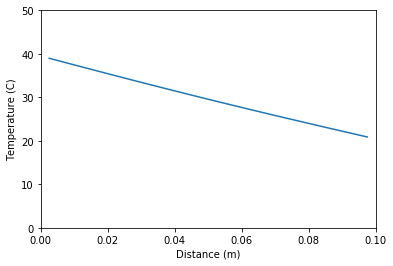

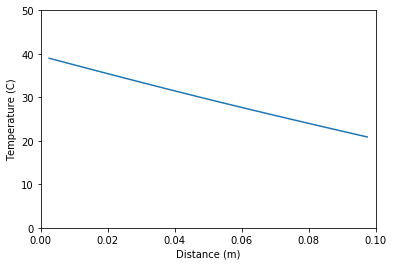

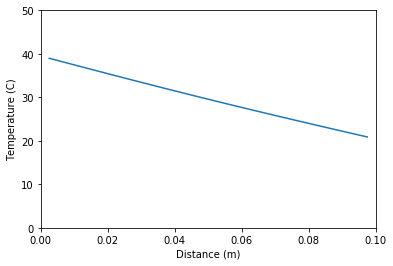

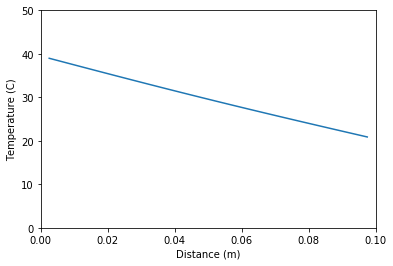

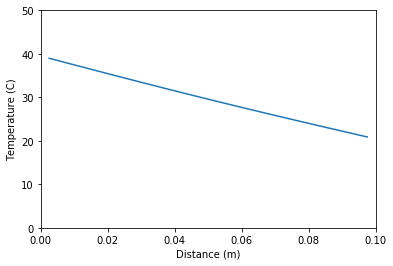

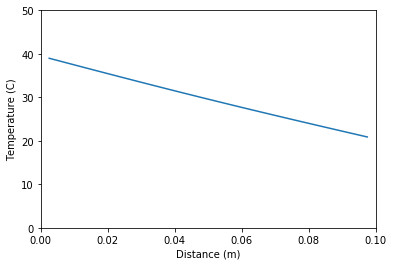

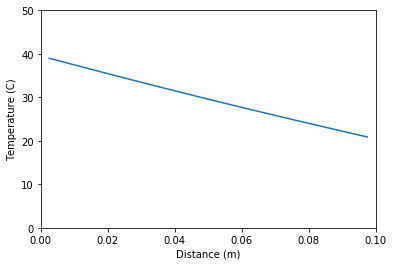

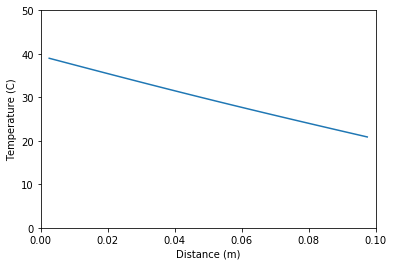

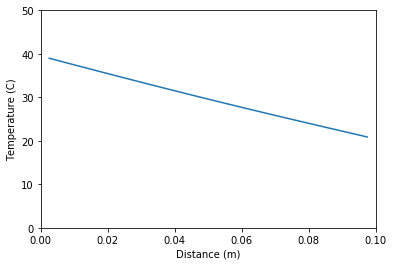

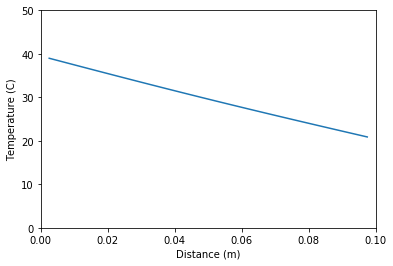

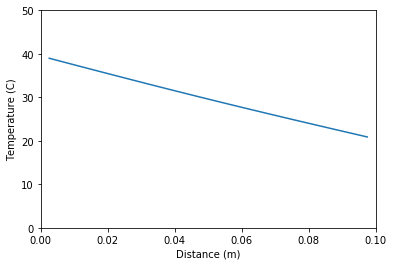

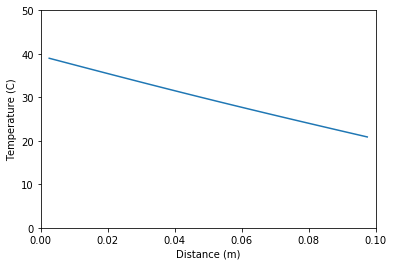

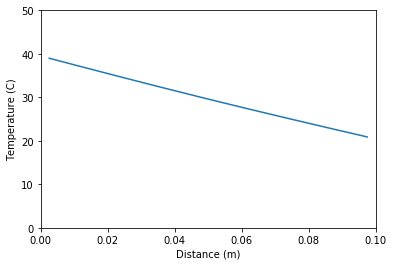

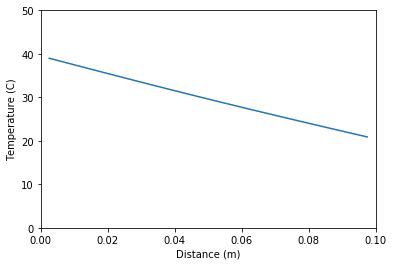

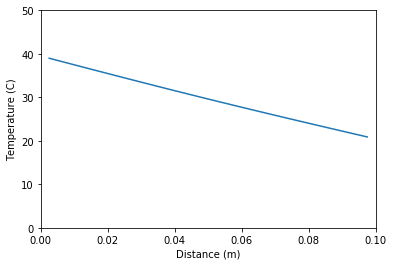

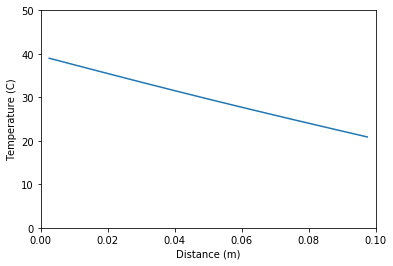

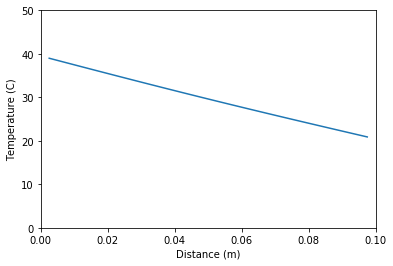

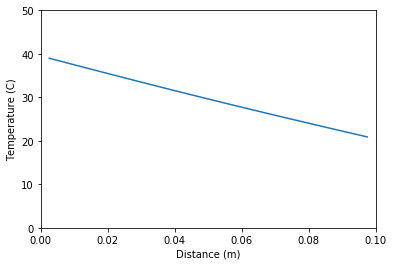

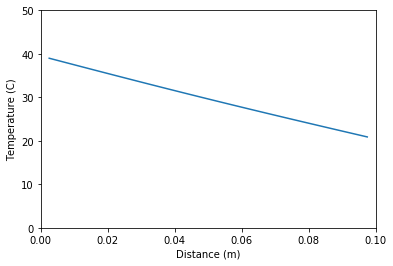

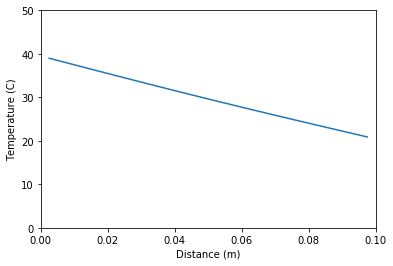

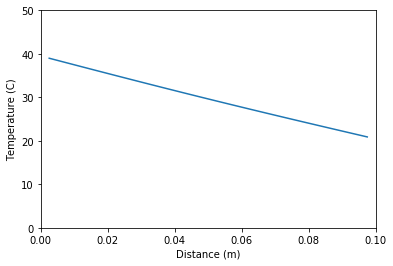

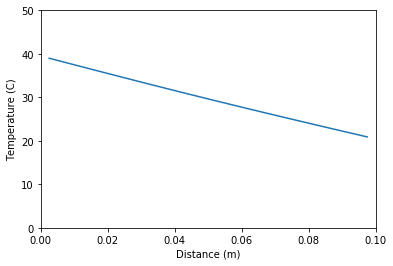

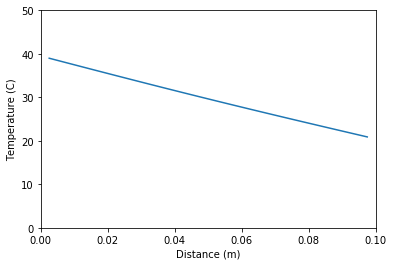

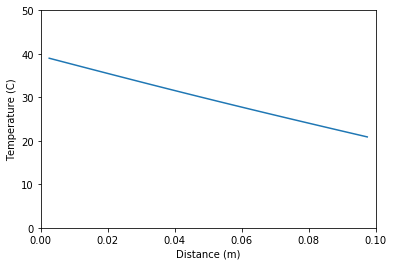

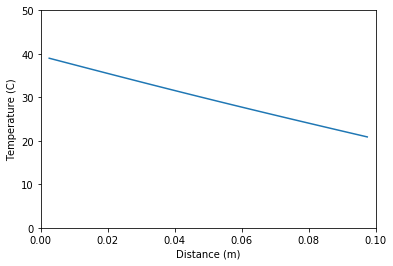

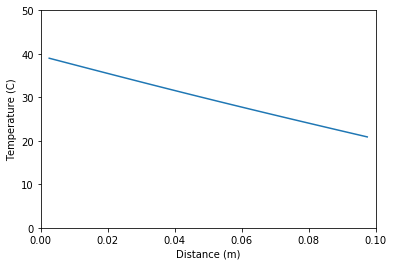

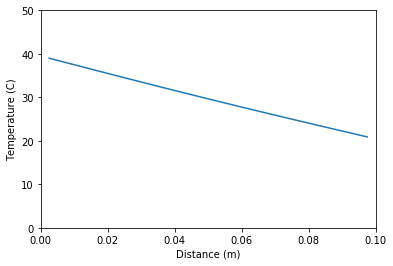

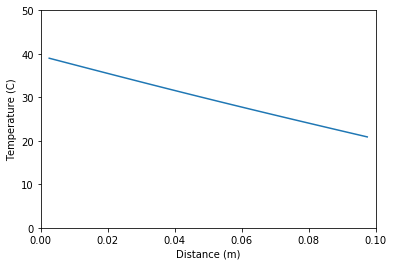

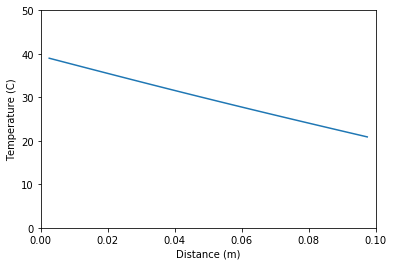

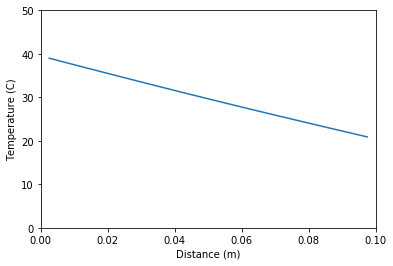

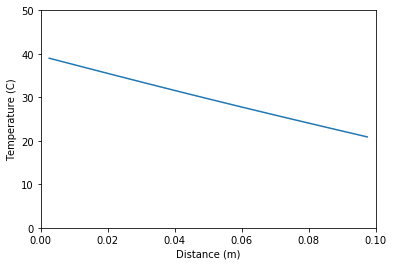

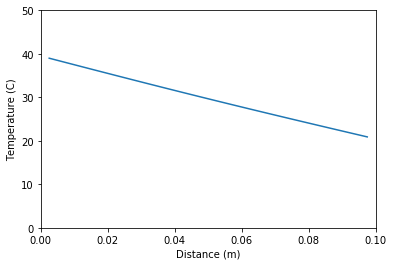

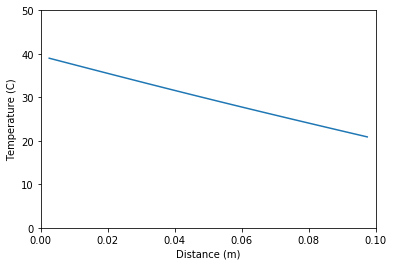

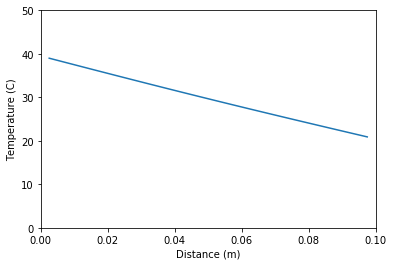

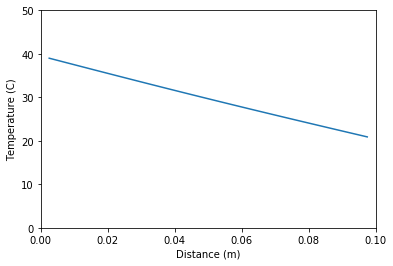

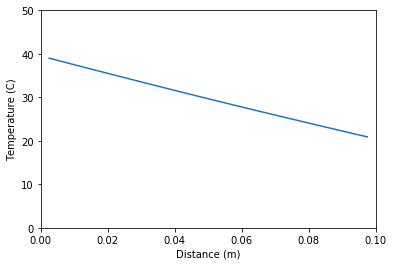

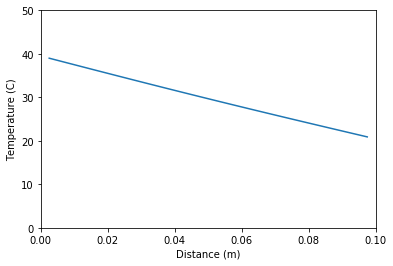

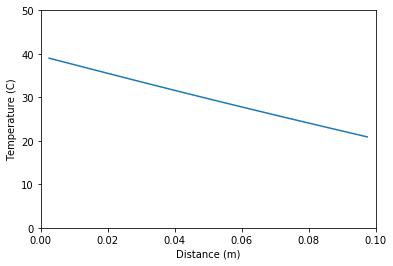

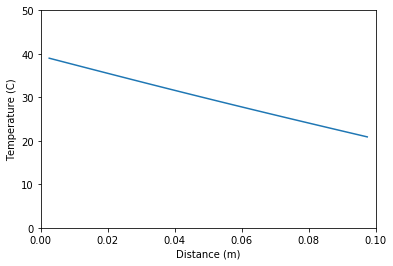

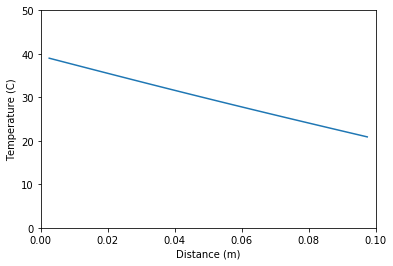

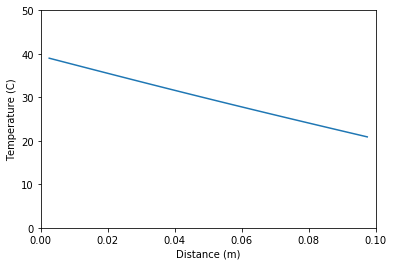

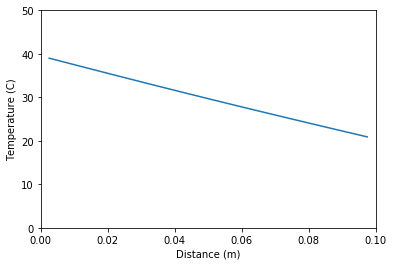

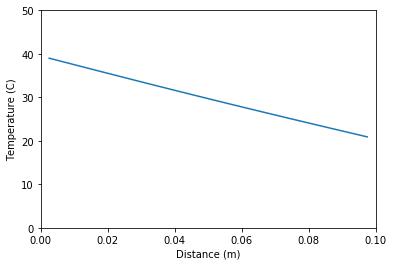

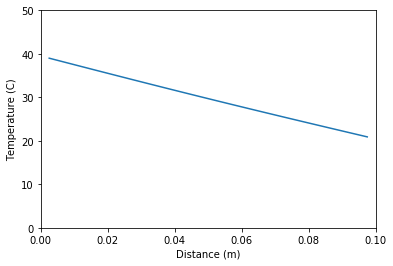

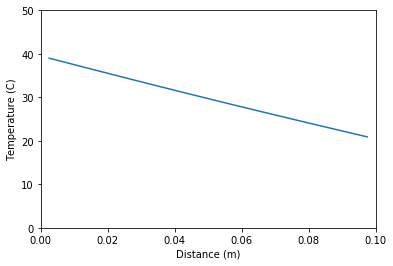

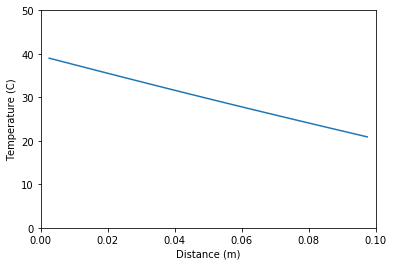

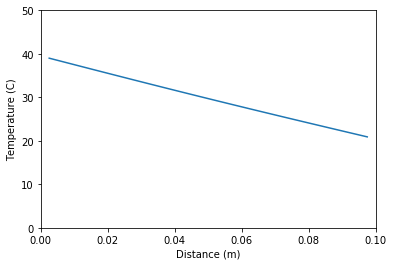

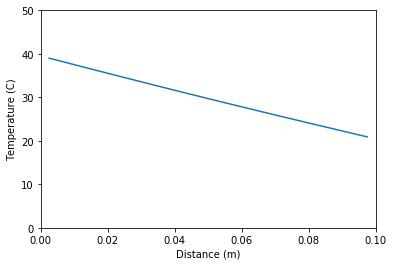

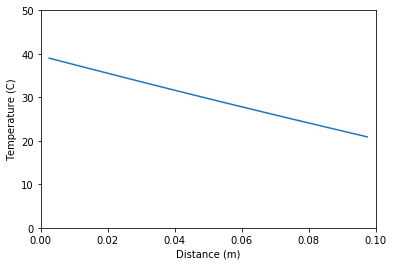

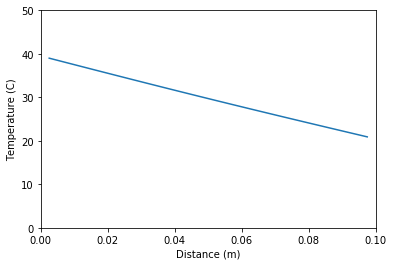

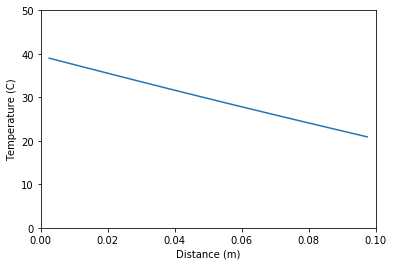

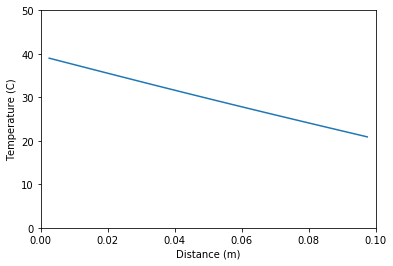

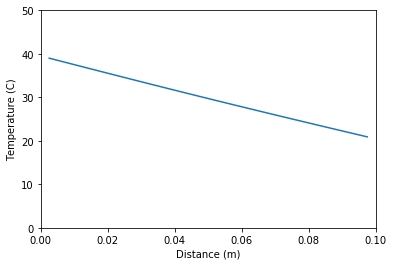

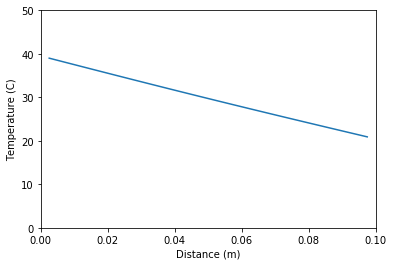

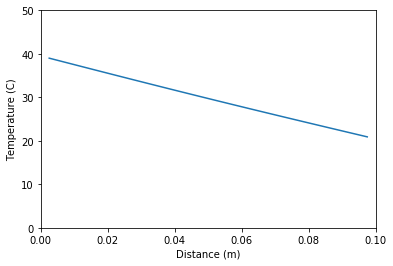

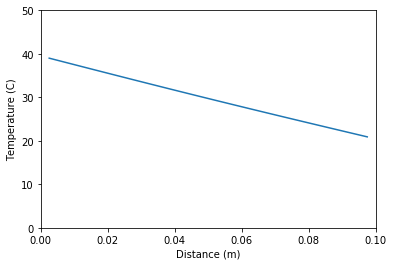

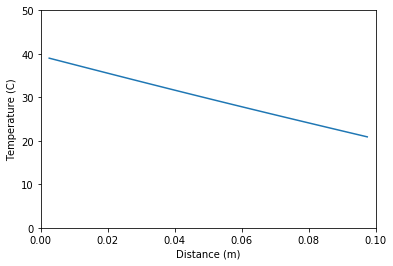

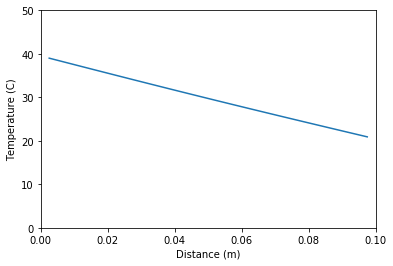

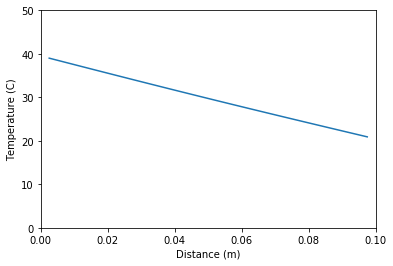

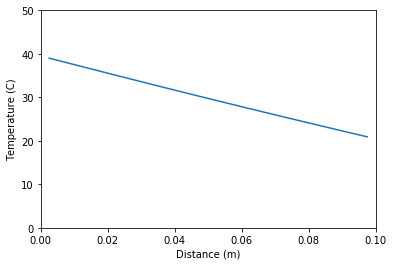

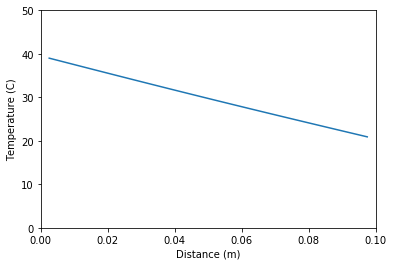

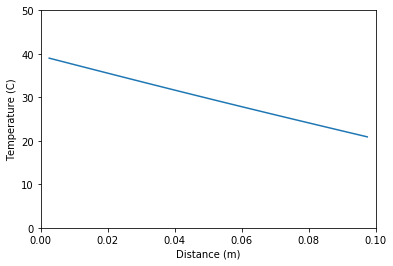

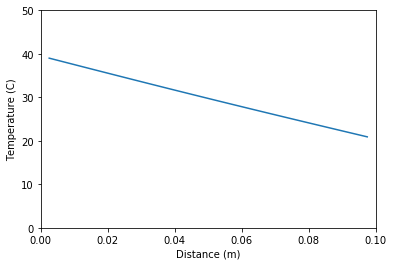

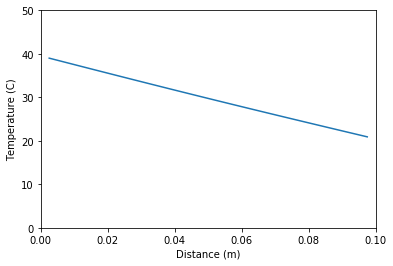

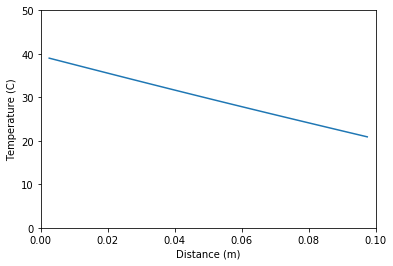

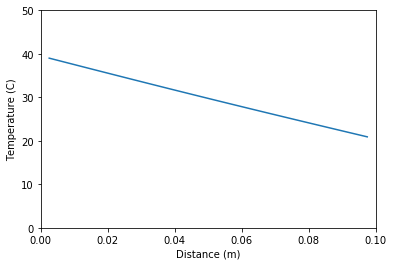

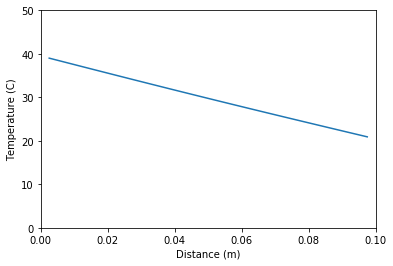

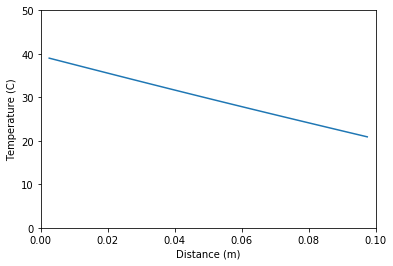

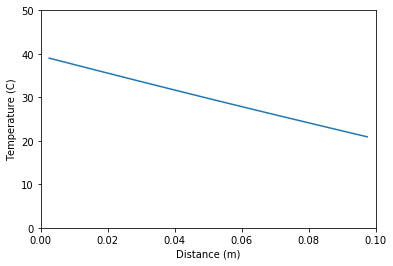

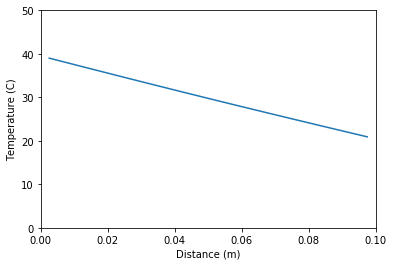

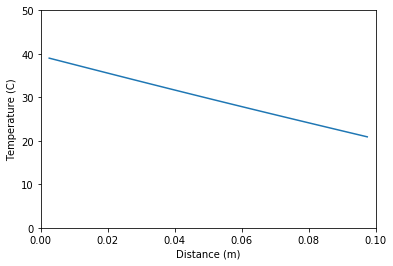

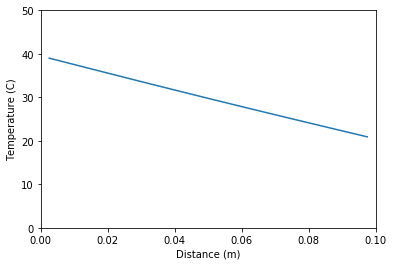

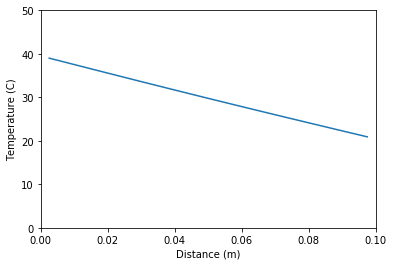

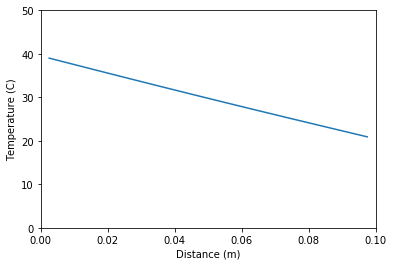

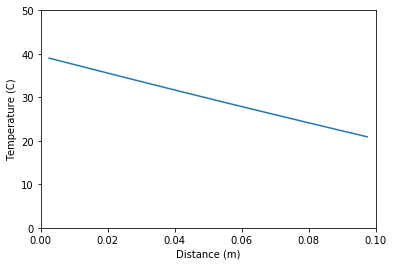

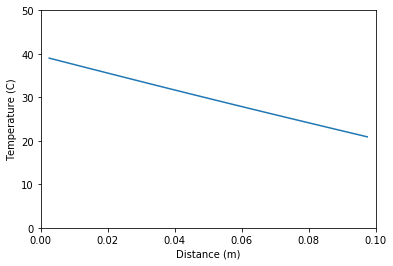

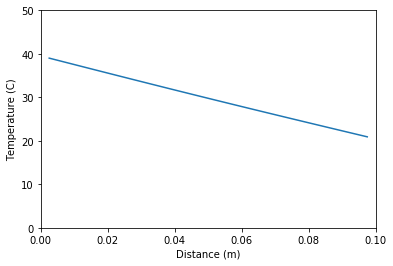

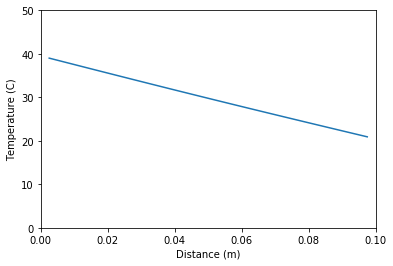

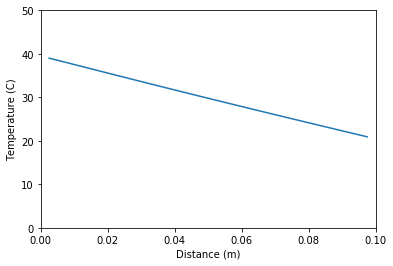

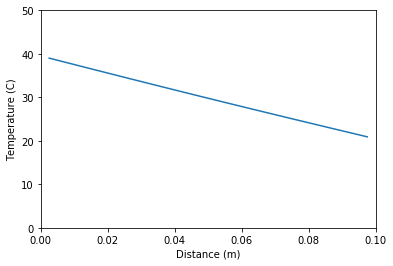

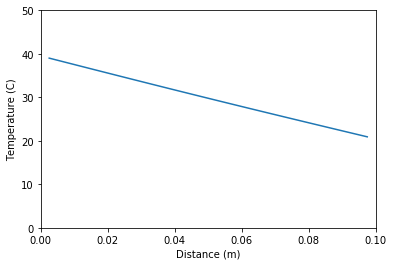

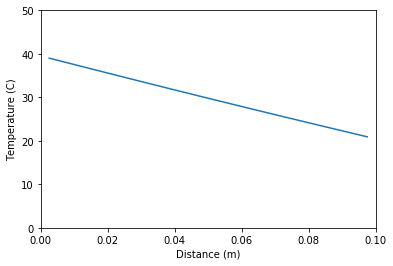

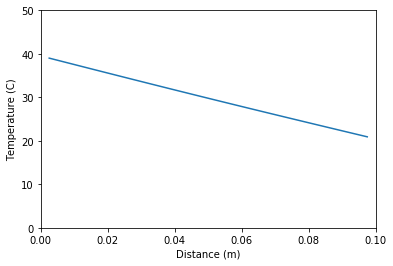

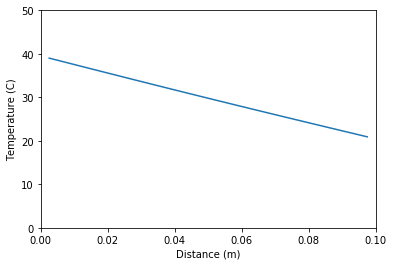

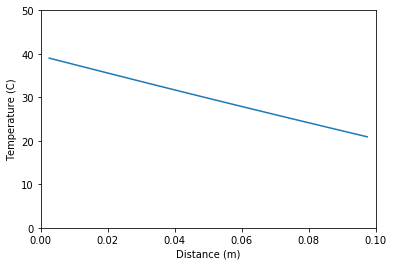

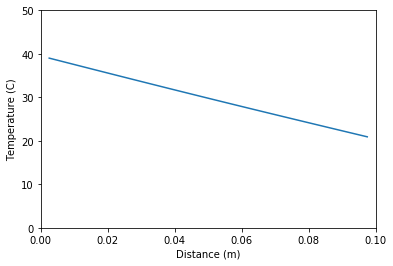

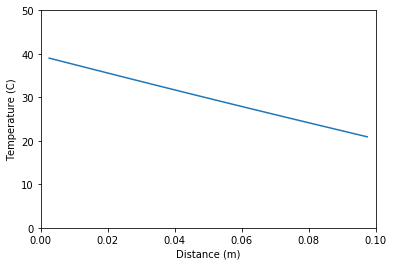

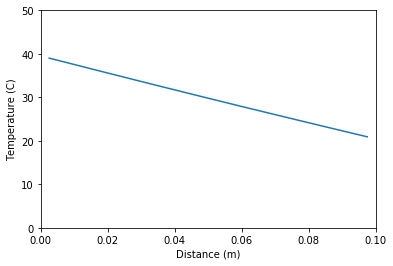

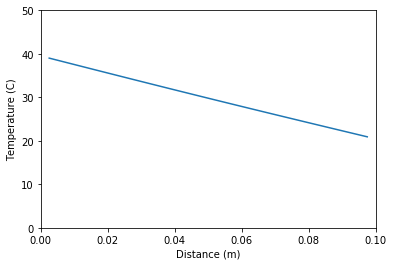

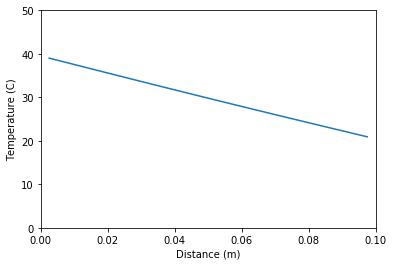

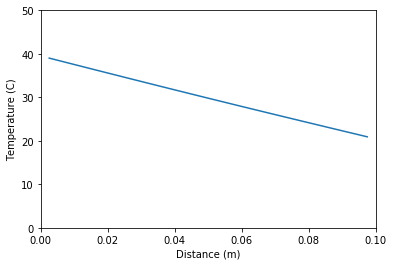

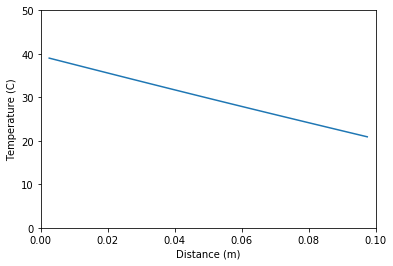

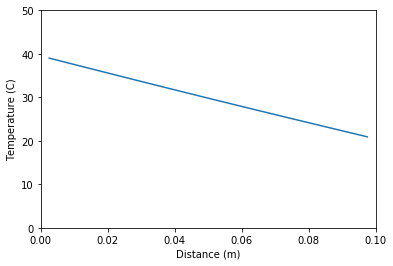

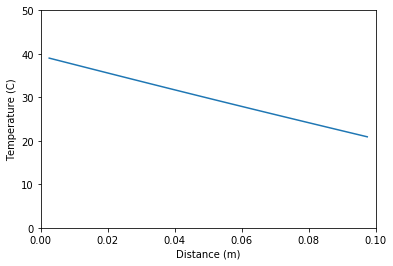

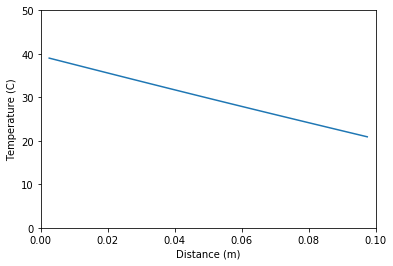

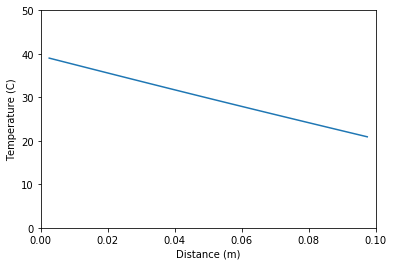

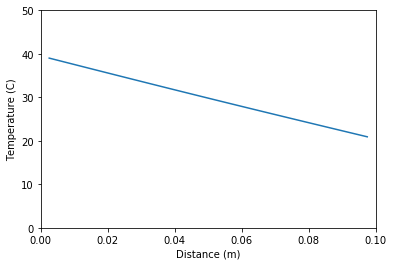

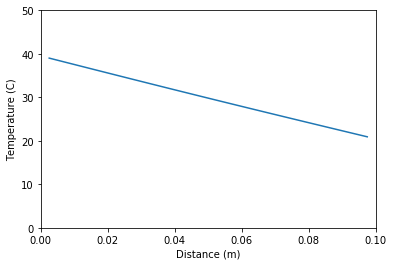

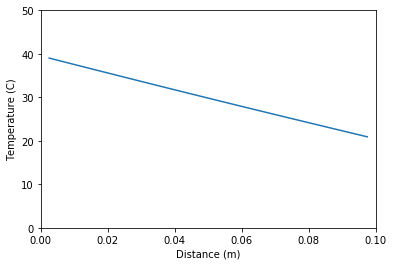

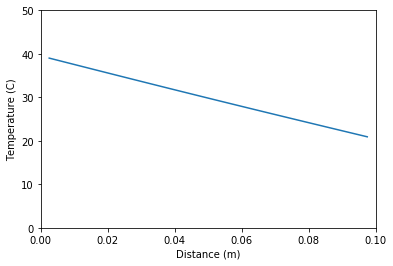

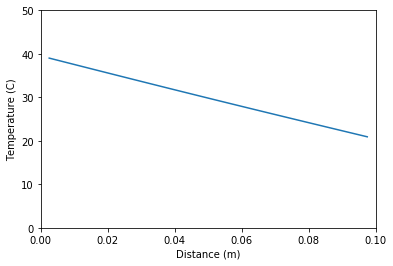

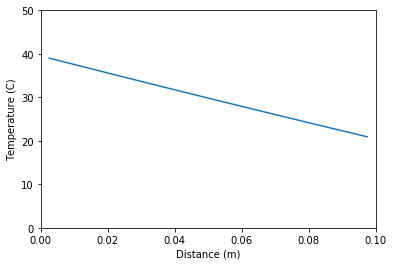

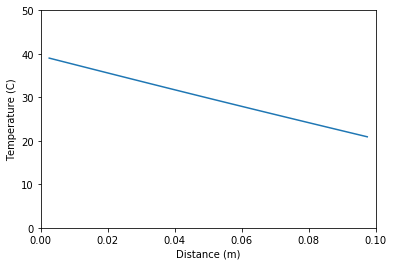

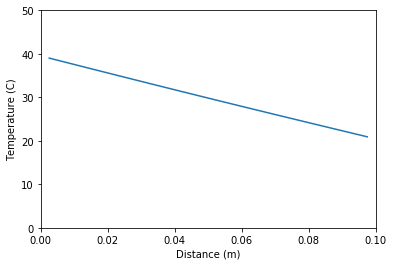

In [16]:
for j in range(1,len(t)):
    plt.clf()
    for i in range(1,n-1):
        dTdt[i] = alpha*( -(T[i]-T[i-1])/dx**2 + (T[i+1]-T[i])/dx**2 )
    dTdt[0] = alpha*( -(T[0]-T1s)/dx**2 + (T[1]-T[0])/dx**2 )
    dTdt[n-1] = alpha*( -(T[n-1]-T[n-2])/dx**2 + (T2s-T[n-1])/dx**2 )
    T = T + dTdt * dt
    Total_T.append(T)
#     plt.plot(x, T0, color='xkcd:black', label='Initial Temperature profile')
    #plt.plot(x, T, color='xkcd:salmon', label='Current Temperature profile')  # Contour plotting the values
    
    plt.plot(x,T)
    plt.xlabel('Length(m)', fontsize=10)  # X axis label
    plt.ylabel('Temperature in $^o C$', fontsize=10)  # Y axis label
    plt.title('Temperature Diffusion in a 1D rod')
    # string = " ".join(['Time $t$ = ', str(t[n]), ' s, $T_{max}$ = ', str(np.amax(Temp_old)), ' $^o C$, $T_{min}$ = ', str(np.amin(Temp_old)), '$^o C$'])
    string = 'Time $t$ = '+str(t[j])+' s, $T_{max}$ = '+str(np.amax(T))+' $^o C$, $T_{min}$ = '+str(np.amin(T))+'$^o C$'
    plt.suptitle(string)
    plt.legend()
    plt.grid(True)  
    plt.axis([0,L,0,50])
    plt.show()
    plt.pause(0.01)

-60


C:\Users\jndrp\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


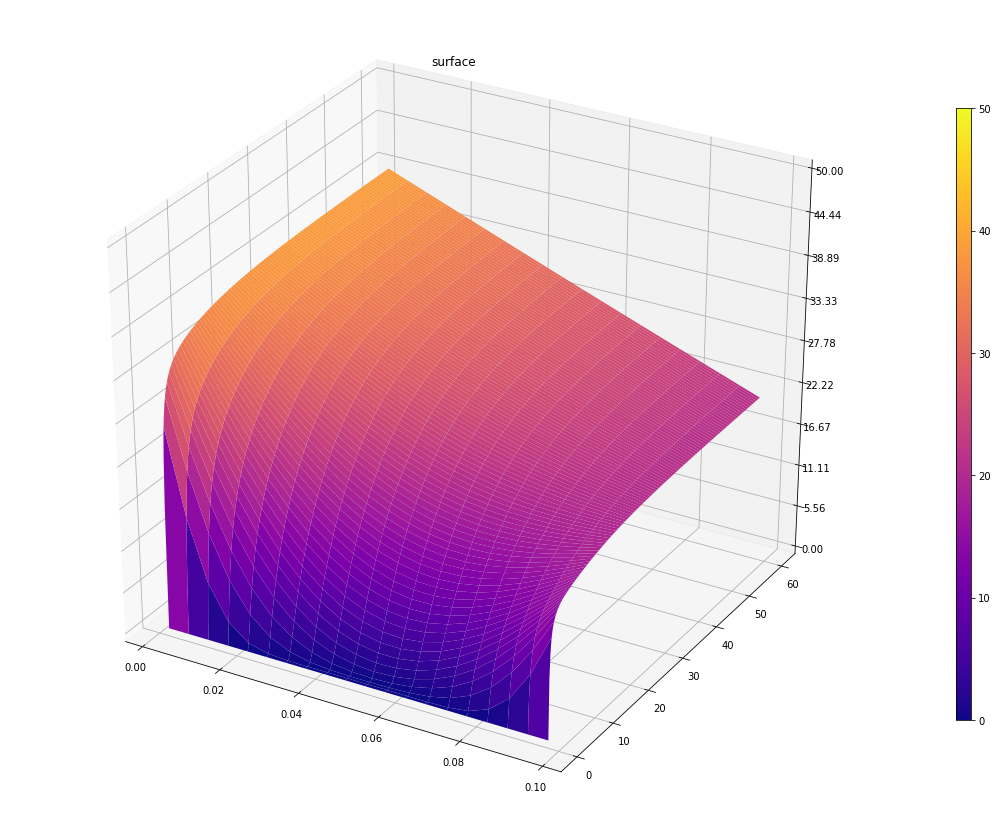

In [19]:
Total_T = np.array(Total_T)
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
np.set_printoptions(threshold=sys.maxsize)
X, Y = np.meshgrid(x, t)
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
# Z = np.array(Total_temp)

surf = ax.plot_surface(X,Y, Total_T, cmap='plasma', rcount=100, linewidth=1,ccount=500,  vmin= 0, vmax=50)
ax.set_title('surface')
ax.set_zlim(0,50)
fig.colorbar(surf ,shrink=0.75,  aspect=40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# clim(-30,30)
print(ax.azim)

# Set rotation angle to 30 degrees
# print(Z)
fig.show()